# FRM Level 1 Financial Markets & Products

## Imports

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Introduction to Derivatives

In [234]:
# Set up parameters
spot_prices = np.linspace(80, 120, 100)
strike_price = 100

Plot payoff diagrams.

Parameters:
- x: x-axis values
- y: y-axis values (payoff)
- title: plot title
- xlabel: label for the x-axis
- ylabel: label for the y-axis

In [235]:
# Function to plot payoff diagrams
def plot_payoff(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=title, linewidth=2)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


Calculate the payoff for a forward contract.

Parameters:
- spot_price: current spot price of the asset
- strike_price: agreed-upon price in the forward contract
- is_long: True for long position, False for short position

Returns:
- Payoff of the forward contract

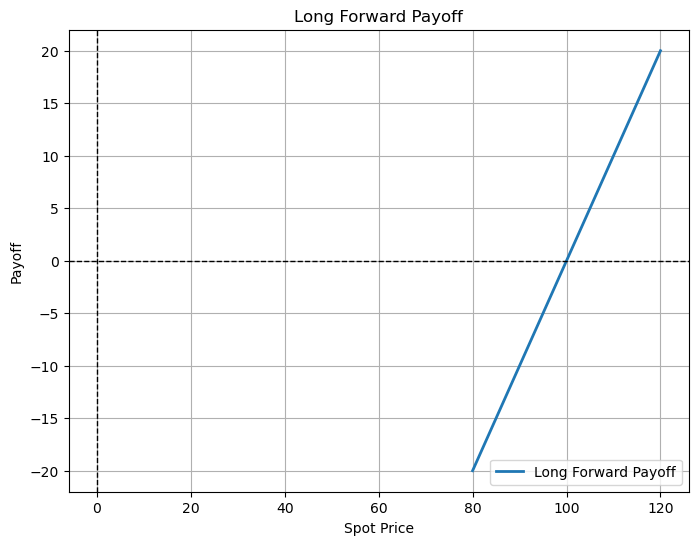

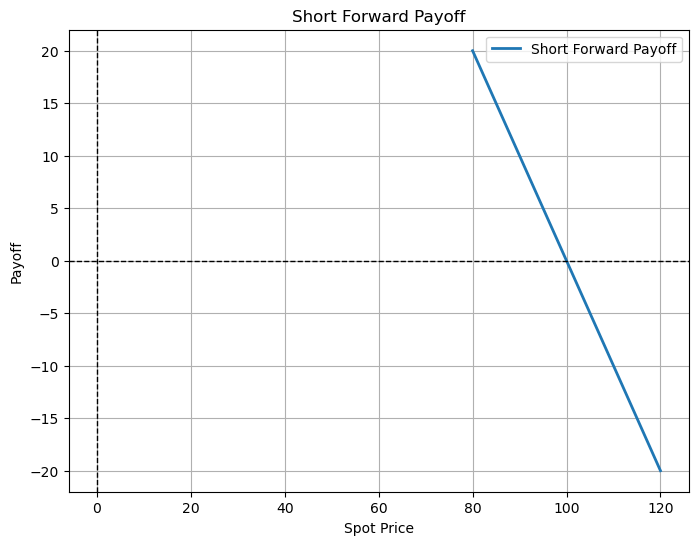

In [236]:
# Forward contract payoff function
def forward_payoff(spot_price, strike_price, is_long):
   return spot_price - strike_price if is_long else strike_price - spot_price

# Forward contract payoffs
forward_long_payoffs = [forward_payoff(spot, strike_price, True) for spot in spot_prices]
forward_short_payoffs = [forward_payoff(spot, strike_price, False) for spot in spot_prices]

# Plot payoffs with descriptive titles
plot_payoff(spot_prices, forward_long_payoffs, "Long Forward Payoff", "Spot Price", "Payoff")
plot_payoff(spot_prices, forward_short_payoffs, "Short Forward Payoff", "Spot Price", "Payoff")

Calculate the payoff for a futures contract.

Parameters:
- spot_price: current spot price of the asset
- futures_price: agreed-upon futures price
- is_long: True for long position, False for short position

Returns:
- Payoff of the futures contract

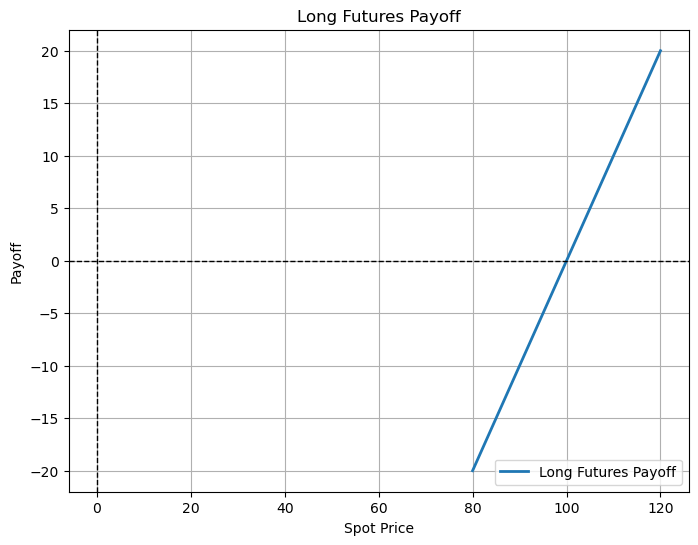

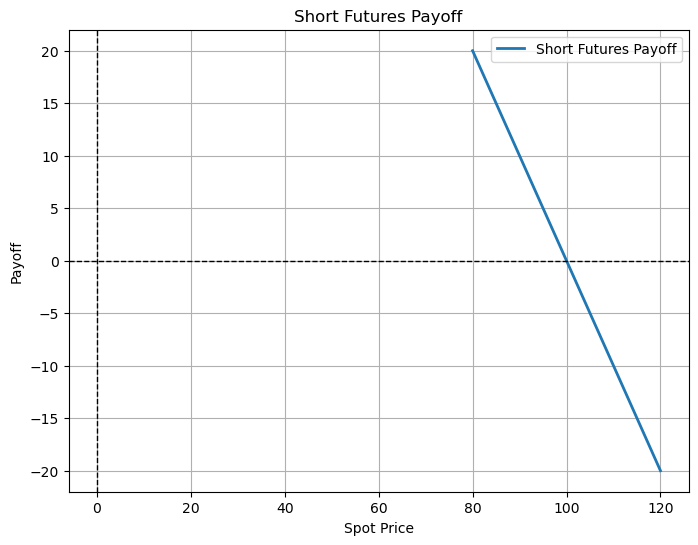

In [237]:
# Futures contract payoff function
def futures_payoff(spot_price, futures_price, is_long):
        return spot_price - futures_price if is_long else futures_price - spot_price

# Futures contract payoffs
futures_long_payoffs = [futures_payoff(spot, strike_price, True) for spot in spot_prices]
futures_short_payoffs = [futures_payoff(spot, strike_price, False) for spot in spot_prices]

# Plot payoffs with descriptive titles
plot_payoff(spot_prices, futures_long_payoffs, "Long Futures Payoff", "Spot Price", "Payoff")
plot_payoff(spot_prices, futures_short_payoffs, "Short Futures Payoff", "Spot Price", "Payoff")

Calculate the payoff for an option contract.

Parameters:
- spot_price: current spot price of the asset
- strike_price: strike price of the option
- is_call: True for call option, False for put option
- is_long: True for long position, False for short position

Returns:
- Payoff of the option contract

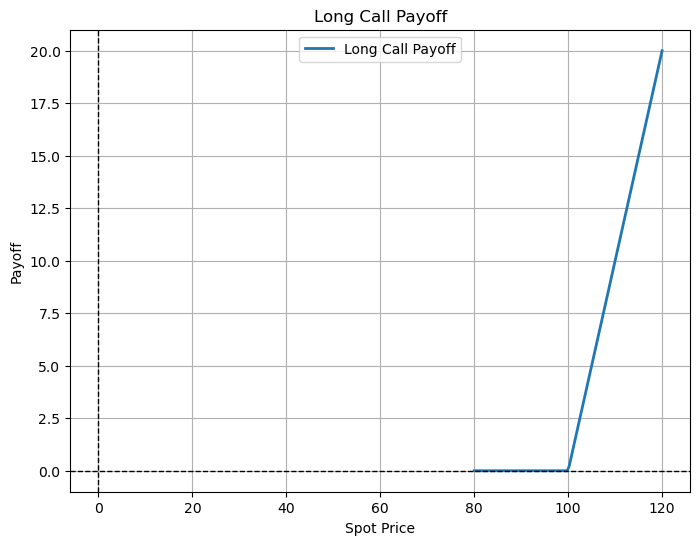

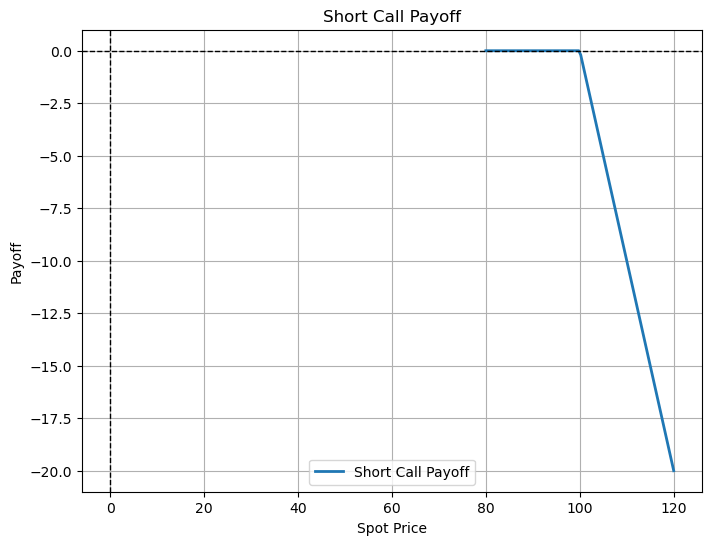

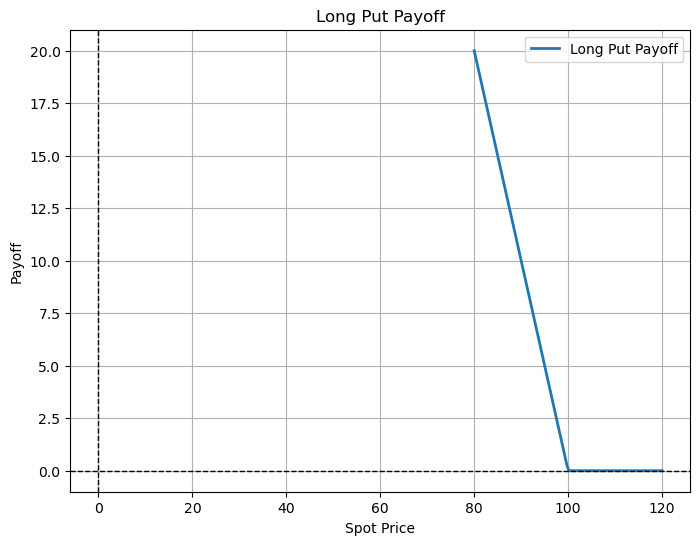

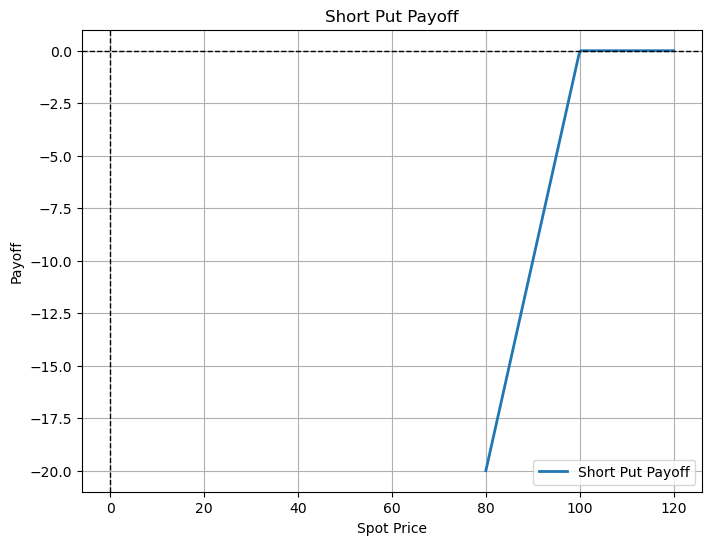

In [238]:
# Option contract payoff function
def option_payoff(spot_price, strike_price, is_call, is_long):
   intrinsic_value = max(0, (spot_price - strike_price) if is_call else (strike_price - spot_price))
   return intrinsic_value if is_long else -intrinsic_value


# Option contract payoffs
call_long_payoffs = [option_payoff(spot, strike_price, True, True) for spot in spot_prices]
call_short_payoffs = [option_payoff(spot, strike_price, True, False) for spot in spot_prices]
put_long_payoffs = [option_payoff(spot, strike_price, False, True) for spot in spot_prices]
put_short_payoffs = [option_payoff(spot, strike_price, False, False) for spot in spot_prices]

# Plot payoffs with descriptive titles
plot_payoff(spot_prices, call_long_payoffs, "Long Call Payoff", "Spot Price", "Payoff")
plot_payoff(spot_prices, call_short_payoffs, "Short Call Payoff", "Spot Price", "Payoff")
plot_payoff(spot_prices, put_long_payoffs, "Long Put Payoff", "Spot Price", "Payoff")
plot_payoff(spot_prices, put_short_payoffs, "Short Put Payoff", "Spot Price", "Payoff")

# Hedging Strategies Using Futures

In [239]:
# Set up sample data
np.random.seed(42)

# Define the number of periods
n_periods = 100

# Generate random data for USD swap market and treasury futures
swap_market_prices = np.random.normal(100, 5, n_periods)
treasury_futures_prices = np.random.normal(105, 3, n_periods)

# Calculate basis
basis = swap_market_prices - treasury_futures_prices


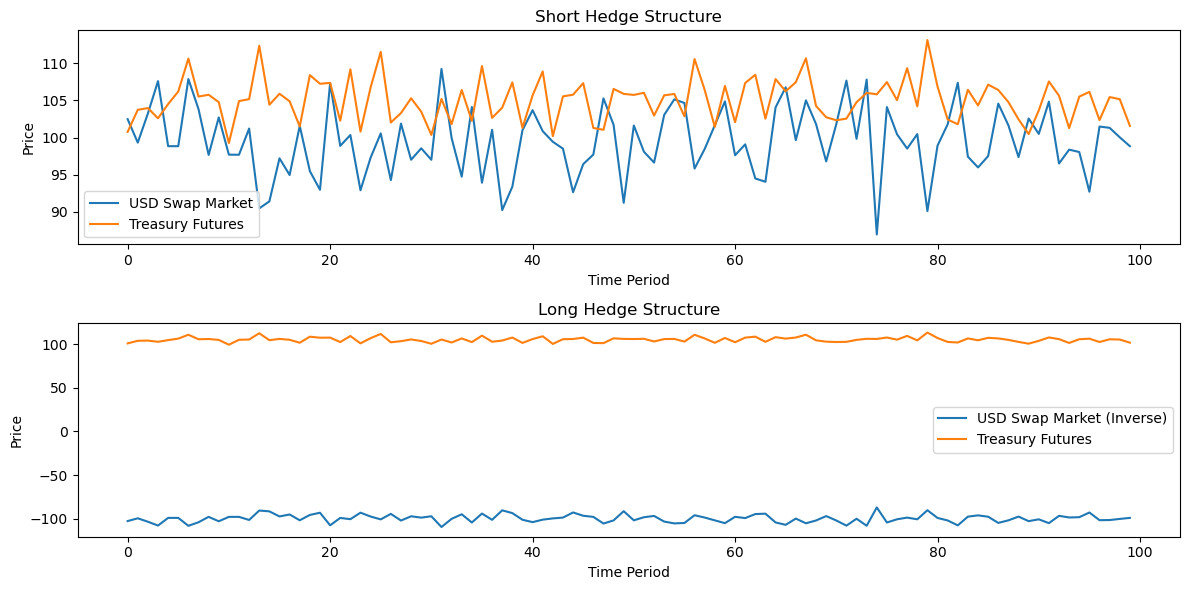

In [240]:
# Visualize short and long hedge structures
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(swap_market_prices, label='USD Swap Market')
plt.plot(treasury_futures_prices, label='Treasury Futures')
plt.title('Short Hedge Structure')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(-swap_market_prices, label='USD Swap Market (Inverse)')
plt.plot(treasury_futures_prices, label='Treasury Futures')
plt.title('Long Hedge Structure')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

### Basis Risk

Basis risk arises due to discrepancies between the asset to be hedged and the asset underlying the futures contract. 
The basis is calculated as the spot price of the asset to be hedged minus the futures price of the contract used: Basis = S1 - F1.

- If the basis is zero at the expiration of the futures contract, it means a perfect hedge.
- Prior to expiration, the basis may be positive or negative, indicating strengthening or weakening of the basis.
- Basis risk increases when the asset underlying the hedge differs from the asset underlying the futures contract.
"""

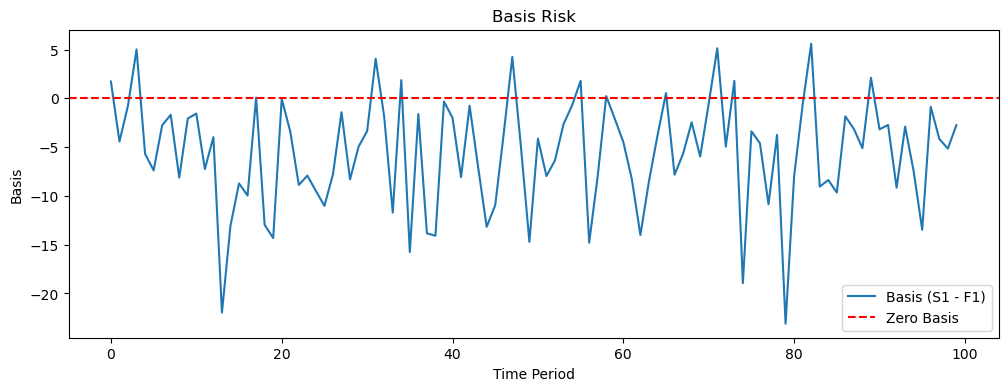

In [241]:

# Calculate and visualize basis risk
plt.figure(figsize=(12, 4))
plt.plot(basis, label='Basis (S1 - F1)')
plt.axhline(0, color='red', linestyle='--', label='Zero Basis')
plt.title('Basis Risk')
plt.xlabel('Time Period')
plt.ylabel('Basis')
plt.legend()
plt.show()

### Minimum Variance Hedge Ratio

The minimum variance hedge ratio is crucial for determining the size of the position taken in futures contracts 
to minimize the variance of the value of the hedged position.

It is calculated as the slope of the best-fit line between the standard deviation of spot prices and 
the standard deviation of futures prices during a period equal to the life of the hedge.

In [242]:
# Calculate and visualize minimum variance hedge ratio
spot_returns = np.diff(swap_market_prices) / swap_market_prices[:-1]
futures_returns = np.diff(treasury_futures_prices) / treasury_futures_prices[:-1]

min_var_hedge_ratio = np.cov(spot_returns, futures_returns)[0, 1] / np.var(futures_returns)

print(f"Minimum Variance Hedge Ratio: {min_var_hedge_ratio}")

Minimum Variance Hedge Ratio: -0.09924789950727128


### Optimal Number of Contracts

To calculate the optimal number of contracts, multiply the minimum variance hedge ratio 
by the size of the position being hedged and divide by the size of one futures contract.

This provides the optimal quantity of futures contracts needed to achieve an effective hedge.

In [243]:
# Calculate and visualize optimal number of contracts
position_size = 100000  # Example position size in USD
contract_size = 50000  # Example futures contract size in USD

optimal_num_contracts = min_var_hedge_ratio * position_size / contract_size

# Explanatory markdown for Optimal Number of Contracts

print(f"Optimal Number of Contracts: {optimal_num_contracts}")

Optimal Number of Contracts: -0.19849579901454256


# Interest Rates

### Interest Rates Overview

Here, we visualize different interest rates:

- **Treasury Rates:** Rates earned on treasury bills and bonds, considered risk-free.
- **LIBOR:** Unsecured short-term borrowing rates between banks, used as reference rates globally.
- **Overnight Rates:** Rates determined by the weighted average of brokered transactions, e.g., effective federal funds rate in the US.
- **Repo Rates:** Secured borrowing rates, commonly overnight or longer-term repos.
- **Swap Rates:** Continually refreshed rates based on periodically renewed loans, e.g., three-month LIBOR.
- **OIS (Overnight Index Swap):** A swap exchanging a fixed rate for the geometric average of overnight rates.


In [244]:
# Set up sample data
np.random.seed(42)
n_periods = 100
time_periods = np.arange(n_periods)

In [245]:
# Set up time series data for a 30-year period
np.random.seed(42)
years = np.arange(1, 31)
n_years = len(years)

# Generate random data for interest rates
treasury_rates = np.random.normal(2, 1, n_years)
libor_rates = np.random.normal(3, 1, n_years)
overnight_rates = np.random.normal(1.5, 0.5, n_years)
repo_rates = np.random.normal(1.8, 0.7, n_years)
swap_rates = np.random.normal(2.5, 0.8, n_years)
ois_rates = np.random.normal(2.2, 0.6, n_years)

# Create a DataFrame for time series data
data = {'Year': years, 'Treasury Rates': treasury_rates, 'LIBOR': libor_rates,
        'Overnight Rates': overnight_rates, 'Repo Rates': repo_rates,
        'Swap Rates': swap_rates, 'OIS': ois_rates}
df = pd.DataFrame(data)

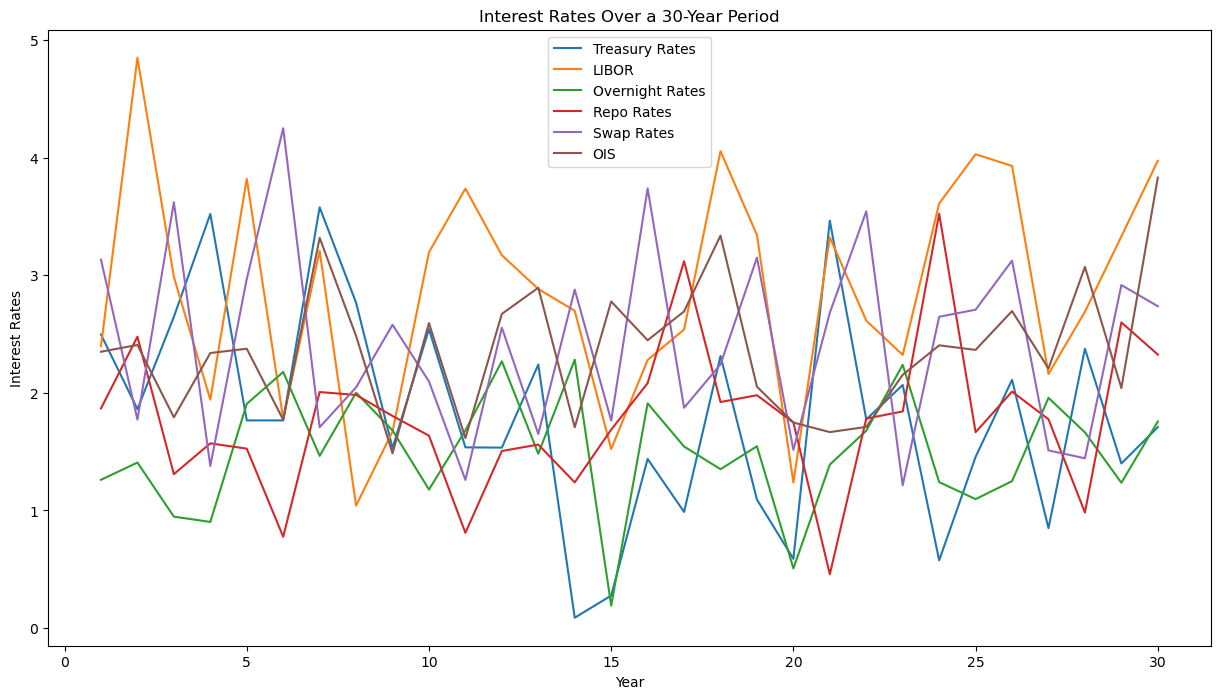

In [246]:
# Plot time series chart
plt.figure(figsize=(15, 8))
plt.plot(df['Year'], df['Treasury Rates'], label='Treasury Rates')
plt.plot(df['Year'], df['LIBOR'], label='LIBOR')
plt.plot(df['Year'], df['Overnight Rates'], label='Overnight Rates')
plt.plot(df['Year'], df['Repo Rates'], label='Repo Rates')
plt.plot(df['Year'], df['Swap Rates'], label='Swap Rates')
plt.plot(df['Year'], df['OIS'], label='OIS')

plt.title('Interest Rates Over a 30-Year Period')
plt.xlabel('Year')
plt.ylabel('Interest Rates')
plt.legend()
plt.show()

### Par Yield and Measuring Interest Rates

- **Par Yield:** The coupon rate that causes a bond to equal its par value.
- **Measuring Interest Rates:** Different compounding methods impact the stated rate of interest:
  - **Annual Compounding:** Stated rate earned on principal annually.
  - **Semiannual Compounding:** Stated rate halved and earned every 6 months.
  - **Continuous Compounding:** Equivalent to daily compounding.

In [247]:
# Set up sample bond data
face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate
years_to_maturity = 10  # Years to maturity
compounding_frequencies = [1, 2, 4]  # Annual, Semiannual, Quarterly compounding frequencies

# Calculate bond cash flows for different compounding methods
cash_flows = {}
for frequency in compounding_frequencies:
    periods = years_to_maturity * frequency
    cash_flows[frequency] = [coupon_rate * face_value / frequency] * (periods - 1) + [face_value + coupon_rate * face_value / frequency]

# Pad the cash flows with NaN to make them of the same length
max_length = max(len(flows) for flows in cash_flows.values())
for frequency, flows in cash_flows.items():
    cash_flows[frequency] += [np.nan] * (max_length - len(flows))

# Create a DataFrame for time series data
data = {'Year': np.arange(1, max_length + 1)}

for frequency, flows in cash_flows.items():
    data[f'Compounding {frequency}x'] = flows

df = pd.DataFrame(data)

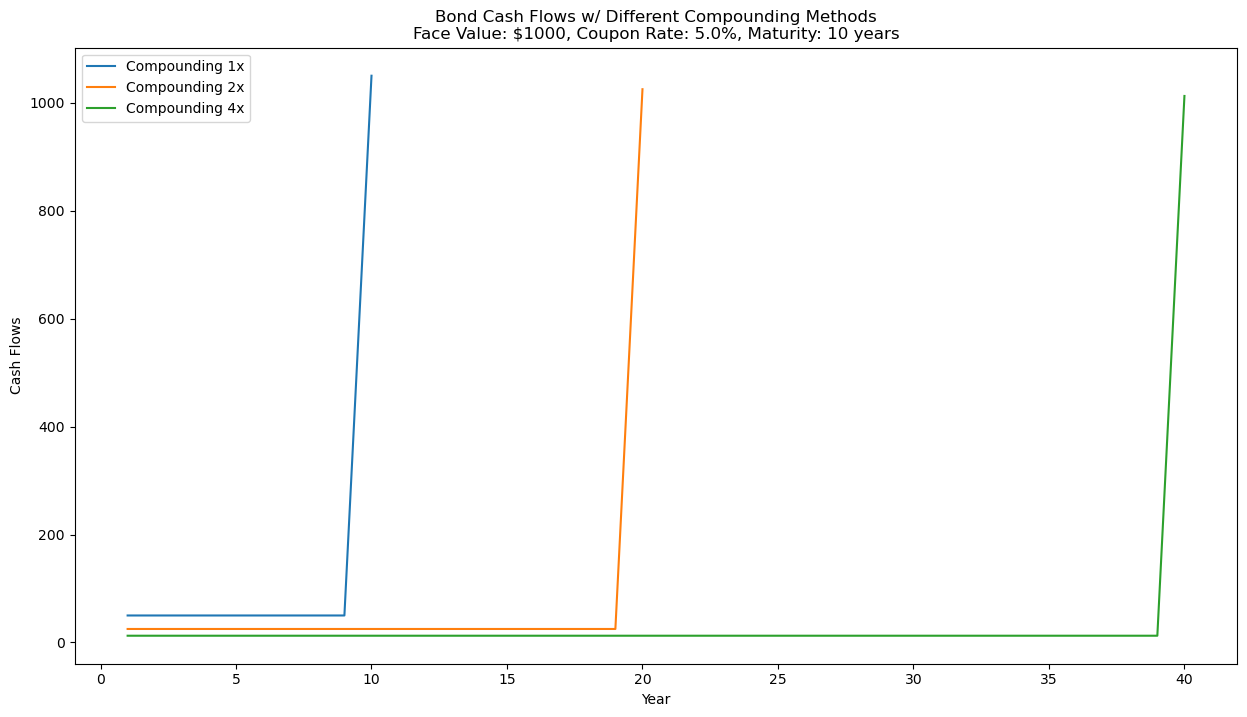

In [248]:
# Plot cash flows for different compounding methods
plt.figure(figsize=(15, 8))
for frequency in compounding_frequencies:
    plt.plot(df['Year'], df[f'Compounding {frequency}x'], label=f'Compounding {frequency}x')

# Add details of the bond to the plot
plt.title(f'Bond Cash Flows w/ Different Compounding Methods\nFace Value: ${face_value}, Coupon Rate: {coupon_rate * 100}%, Maturity: {years_to_maturity} years')
plt.xlabel('Year')
plt.ylabel('Cash Flows')
plt.legend()
plt.show()

### Zero Rates, Bond Pricing, Bond Yield

- **Zero Rates:** The n-year zero-coupon interest rate is the rate earned on an investment lasting n years.
- **Bond Pricing:** The theoretical price of a bond is the present value of all future cash flows.
- **Bond Yield:** The single discount rate that, when applied to all cash flows, gives a bond price equal to its market price.

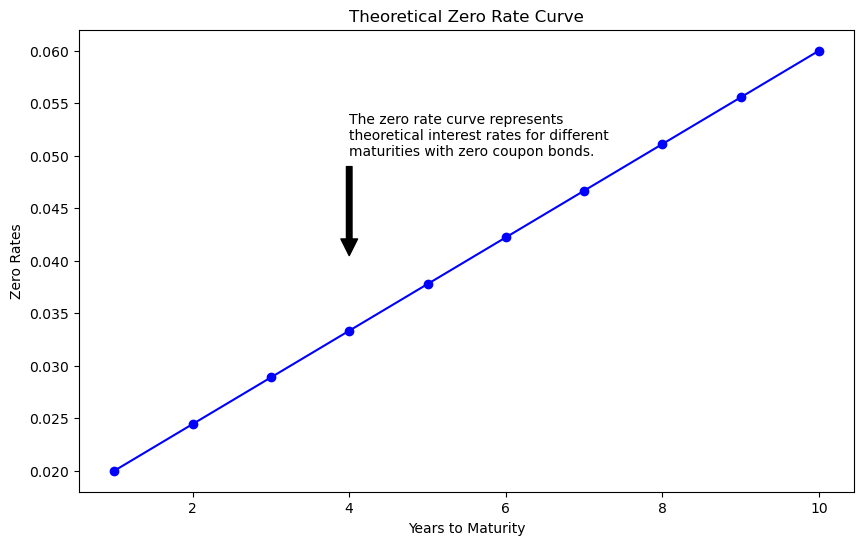

In [249]:
# Set up sample zero rate curve data
years_to_maturity = np.arange(1, 11)  # Maturities from 1 to 10 years
zero_rates = np.linspace(0.02, 0.06, len(years_to_maturity))  # Sample zero rates

# Plot the zero rate curve
plt.figure(figsize=(10, 6))
plt.plot(years_to_maturity, zero_rates, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Theoretical Zero Rate Curve')
plt.xlabel('Years to Maturity')
plt.ylabel('Zero Rates')

# Add a brief description
plt.annotate('The zero rate curve represents\ntheoretical interest rates for different\nmaturities with zero coupon bonds.',
             xy=(4, 0.04), xytext=(4, 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.show()

### Forward Rates, FRA Valuation, Duration, Modified Duration, Convexity

- **Forward Rates:** Future rates implied by current zero rates for future periods.
- **FRA (Forward Rate Agreement) Valuation:** Valuing FRAs involves calculating the payoff based on assumed forward rates and discounting it at the risk-free rate.
- **Duration:** Measure of how long a bond holder will wait before receiving the present value of cash payments.
- **Modified Duration:** Approximate relationship between bond price change and yield change.
- **Convexity:** Measures the curvature of a bond's sensitivity to rate changes.


In [250]:
# Set up sample bond data with more realistic values
face_values = [1000, 1200, 800, 1500]
coupon_rates = [0.02, 0.03, 0.01, 0.04]  # Lower coupon rates for a more realistic mix
years_to_maturity = 10
yield_change = 0.01
portfolio_weights = [0.25, 0.25, 0.25, 0.25]

# Initialize portfolio metrics
total_portfolio_duration = 0
total_portfolio_convexity = 0
nav = 0
pnl = 0
average_yield_to_maturity = 0

Total Portfolio Duration: 12818.42 years
Total Portfolio Convexity: 135782.36
Net Asset Value (NAV): $1409.36
Profit and Loss (P&L): $-25.38
Average Yield to Maturity: 3.1250%


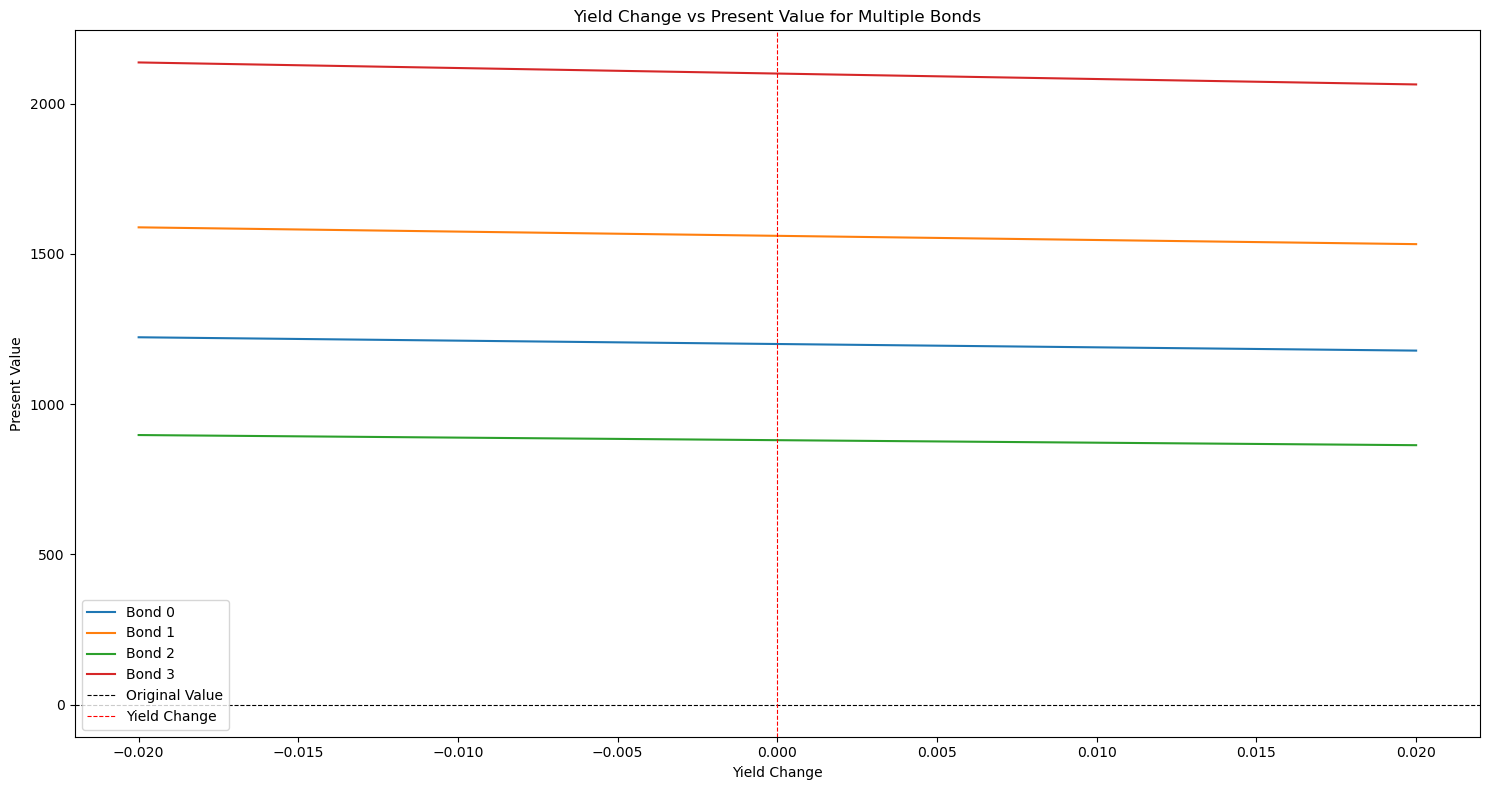

In [251]:
# Create plots
plt.figure(figsize=(15, 8))

# Plot yield change vs present value for multiple bonds and calculate portfolio metrics
for face_value, coupon_rate, weight in zip(face_values, coupon_rates, portfolio_weights):
    # Calculate bond cash flows
    cash_flows = [coupon_rate * face_value] * (years_to_maturity - 1) + [face_value + coupon_rate * face_value]

    # Calculate present value of cash flows for different yield changes
    yield_changes = np.linspace(-0.02, 0.02, 100)
    present_values = np.zeros_like(yield_changes)
    for i, y in enumerate(yield_changes):
        present_values[i] = np.sum([cf / (1 + y / years_to_maturity) ** t for t, cf in enumerate(cash_flows, 1)])

    # Plot yield change vs present value
    plt.plot(yield_changes, present_values, label=f'Bond {len(plt.gca().lines)}')

    # Calculate bond metrics
    duration = np.sum([(t * cf) / (1 + yield_change / years_to_maturity) ** t for t, cf in enumerate(cash_flows, 1)])
    modified_duration = duration / (1 + yield_change / years_to_maturity)
    convexity = np.sum([(t * (t + 1) * cf) / (1 + yield_change / years_to_maturity) ** (t + 2) for t, cf in enumerate(cash_flows, 1)])

    # Update portfolio metrics
    total_portfolio_duration += weight * modified_duration
    total_portfolio_convexity += weight * convexity
    nav += weight * present_values[-1]
    pnl += weight * (present_values[-1] - present_values[50])  # Assume initial yield change of 0% to 2%
    average_yield_to_maturity += weight * np.mean([cf / face_value for cf in cash_flows])

# Calculate average yield to maturity
average_yield_to_maturity /= len(portfolio_weights)


# Print portfolio metrics
print(f'Total Portfolio Duration: {total_portfolio_duration:.2f} years')
print(f'Total Portfolio Convexity: {total_portfolio_convexity:.2f}')
print(f'Net Asset Value (NAV): ${nav:.2f}')
print(f'Profit and Loss (P&L): ${pnl:.2f}')
print(f'Average Yield to Maturity: {average_yield_to_maturity * 100:.4f}%')

# Annotate chart
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Original Value')
plt.axvline(0, color='red', linestyle='--', linewidth=0.8, label='Yield Change')
plt.title('Yield Change vs Present Value for Multiple Bonds')
plt.xlabel('Yield Change')
plt.ylabel('Present Value')
plt.legend()

plt.tight_layout()
plt.show()

### Theories of the Term Structure of Interest Rates

- **Expectations Theory:** Long-term rates should reflect future short-term rates.
- **Market Segmentation Theory:** No relationship between term interest rates, each determined by supply and demand within its bond market.
- **Liquidity Preference Theory:** Investors prefer short-term investments, while borrowers prefer longer-term fixed rates, leading to forward rates being higher than expected future zero rates.

In [252]:
# Set up sample data for term structure of interest rates
maturities = np.arange(1, 11)  # Maturities from 1 to 10 years
yield_curve_flat = np.ones_like(maturities) * 0.03  # Flat yield curve
yield_curve_upward = np.linspace(0.02, 0.06, len(maturities))  # Upward-sloping yield curve
yield_curve_downward = np.linspace(0.06, 0.02, len(maturities))  # Downward-sloping yield curve

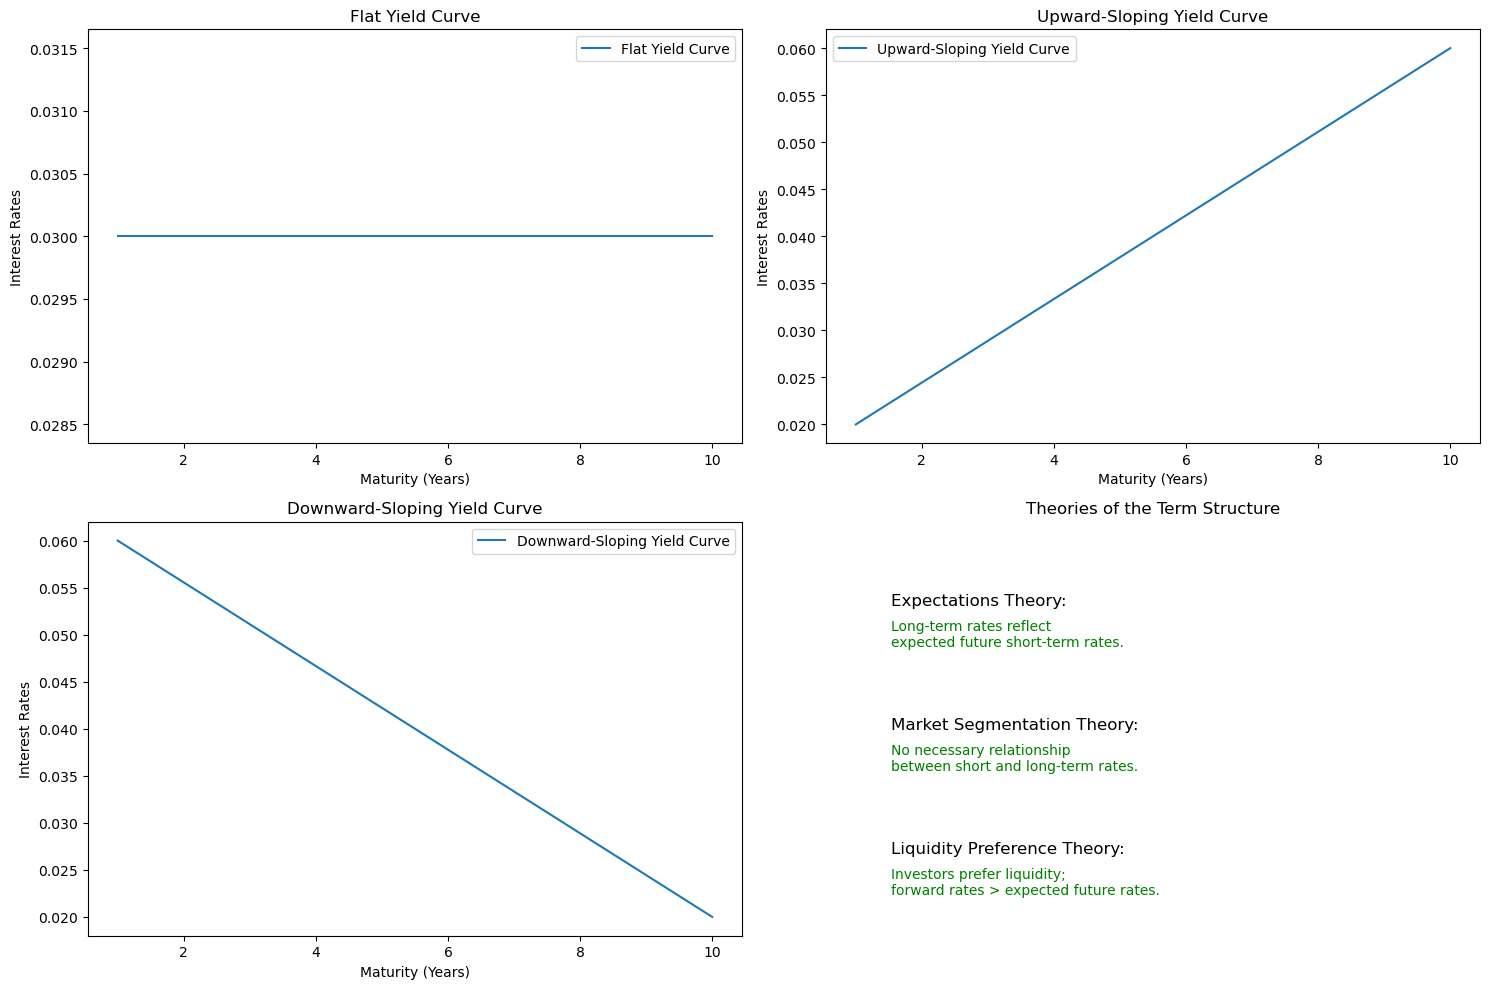

In [253]:
# Create plots
plt.figure(figsize=(15, 10))

# Flat Yield Curve
plt.subplot(2, 2, 1)
plt.plot(maturities, yield_curve_flat, label='Flat Yield Curve')
plt.title('Flat Yield Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Interest Rates')
plt.legend()

# Upward-Sloping Yield Curve
plt.subplot(2, 2, 2)
plt.plot(maturities, yield_curve_upward, label='Upward-Sloping Yield Curve')
plt.title('Upward-Sloping Yield Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Interest Rates')
plt.legend()

# Downward-Sloping Yield Curve
plt.subplot(2, 2, 3)
plt.plot(maturities, yield_curve_downward, label='Downward-Sloping Yield Curve')
plt.title('Downward-Sloping Yield Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Interest Rates')
plt.legend()

# Theories of the Term Structure of Interest Rates
plt.subplot(2, 2, 4)
plt.title('Theories of the Term Structure')
plt.text(0.1, 0.8, 'Expectations Theory:', fontsize=12, ha='left')
plt.text(0.1, 0.7, 'Long-term rates reflect\nexpected future short-term rates.', fontsize=10, ha='left', color='green')
plt.text(0.1, 0.5, 'Market Segmentation Theory:', fontsize=12, ha='left')
plt.text(0.1, 0.4, 'No necessary relationship\nbetween short and long-term rates.', fontsize=10, ha='left', color='green')
plt.text(0.1, 0.2, 'Liquidity Preference Theory:', fontsize=12, ha='left')
plt.text(0.1, 0.1, 'Investors prefer liquidity;\nforward rates > expected future rates.', fontsize=10, ha='left', color='green')
plt.axis('off')

plt.tight_layout()
plt.show()

# Determination of Forwards vs Futures Prices

### Forward Price for an Investment Asset

- Using risk-free rate and current asset price
- Forward price (Fo) = Asset price (So) * e^(rate * time)

Order of Operations:
1. Rate * Time to Maturity
2. Raised to the power of e
3. Multiplied by the Asset Price

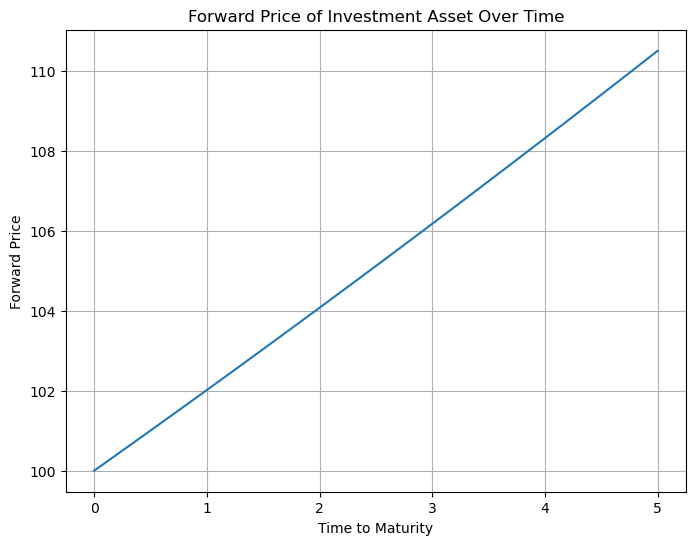

In [254]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate forward price
def calculate_forward_price(asset_price, risk_free_rate, time_to_maturity):
    return asset_price * np.exp(risk_free_rate * time_to_maturity)

# Function to plot forward price over time
def plot_forward_price(asset_price, risk_free_rate, time_values):
    forward_prices = calculate_forward_price(asset_price, risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, forward_prices)
    plt.title('Forward Price of Investment Asset Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Forward Price')
    plt.grid(True)
    plt.show()

# Interactive user input
asset_price = 100
risk_free_rate = 0.02
max_time = 5

# Generate time values for plotting
time_values = np.linspace(0, max_time, 100)

# Display the interactive plot
plot_forward_price(asset_price, risk_free_rate, time_values)


### Forward price for a known Income Asset
Adjusting the above theory for an investment asset paying a known income, 

1. Asset price, minus the value of known income during the life of the contract
2. Multiplied by e
3. To the power of the risk free rate, 
4. Multiplied by the time to maturity on the contract

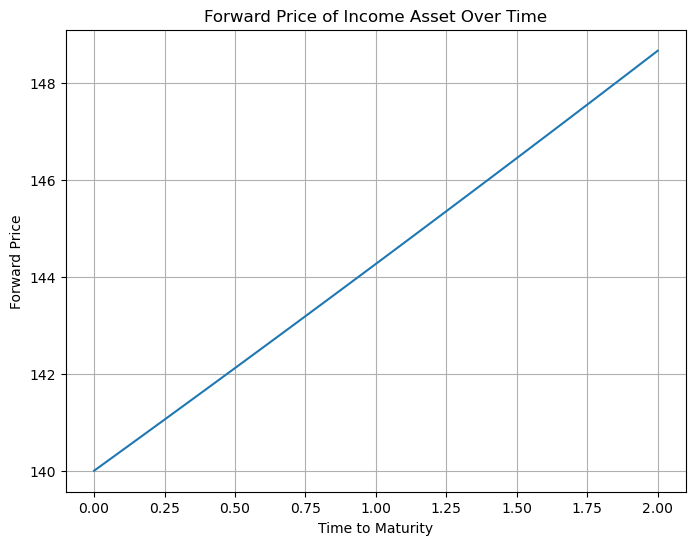

In [255]:
# Function to calculate forward price for an income asset
def calculate_forward_price_income_asset(asset_price, known_income, risk_free_rate, time_to_maturity):
    return (asset_price - known_income) * np.exp(risk_free_rate * time_to_maturity)

# Function to plot forward price over time for an income asset
def plot_forward_price_income_asset(asset_price, known_income, risk_free_rate, time_values):
    forward_prices = calculate_forward_price_income_asset(asset_price, known_income, risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, forward_prices)
    plt.title('Forward Price of Income Asset Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Forward Price')
    plt.grid(True)
    plt.show()

# Fixed values for the income asset
asset_price_income = 150  # Replace with actual asset price
known_income = 10  # Replace with actual known income
risk_free_rate_income = 0.03  # Replace with actual risk-free rate
max_time_income = 2  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_income = np.linspace(0, max_time_income, 100)

# Display the interactive plot for an income asset
plot_forward_price_income_asset(asset_price_income, known_income, risk_free_rate_income, time_values_income)


### Forward price for a known Yield Asset

Adjusting again the above theory for an investment asset paying a known yield, the forward price should equal the asset price, multiplied by e, to the power of the risk free rate, minus the average yield per annum on the asset, during the life of a forward contract with continuous compounding, multiplied by the time to maturity on the contract. 

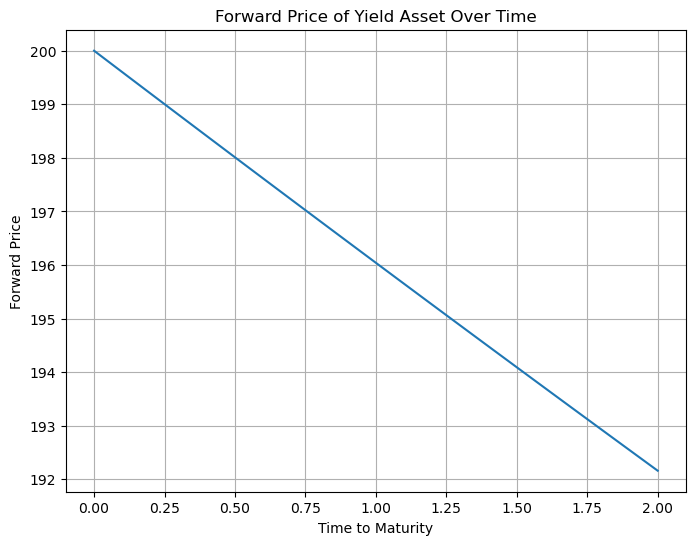

In [256]:
# Function to calculate forward price for a yield asset
def calculate_forward_price_yield_asset(asset_price, yield_rate, risk_free_rate, time_to_maturity):
    return asset_price * np.exp((risk_free_rate - yield_rate) * time_to_maturity)

# Function to plot forward price over time for a yield asset
def plot_forward_price_yield_asset(asset_price, yield_rate, risk_free_rate, time_values):
    forward_prices = calculate_forward_price_yield_asset(asset_price, yield_rate, risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, forward_prices)
    plt.title('Forward Price of Yield Asset Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Forward Price')
    plt.grid(True)
    plt.show()

# Fixed values for the yield asset
asset_price_yield = 200  # Replace with actual asset price
yield_rate = 0.05  # Replace with actual yield rate
risk_free_rate_yield = 0.03  # Replace with actual risk-free rate
max_time_yield = 2  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_yield = np.linspace(0, max_time_yield, 100)

# Display the interactive plot for a yield asset
plot_forward_price_yield_asset(asset_price_yield, yield_rate, risk_free_rate_yield, time_values_yield)

### Valuing Forward Contracts

Valuing Forward Contracts
The value of a forward contract at inception is close to zero, the following period between inception and maturity can be positive or negative day to day, hence why firms must mark to market. The value of the contract on any given day, can be expressed as the current forward price, minus the delivery price, multiplied by e, to the power of negative the risk free rate, multiplied by the time to maturity on the contract.


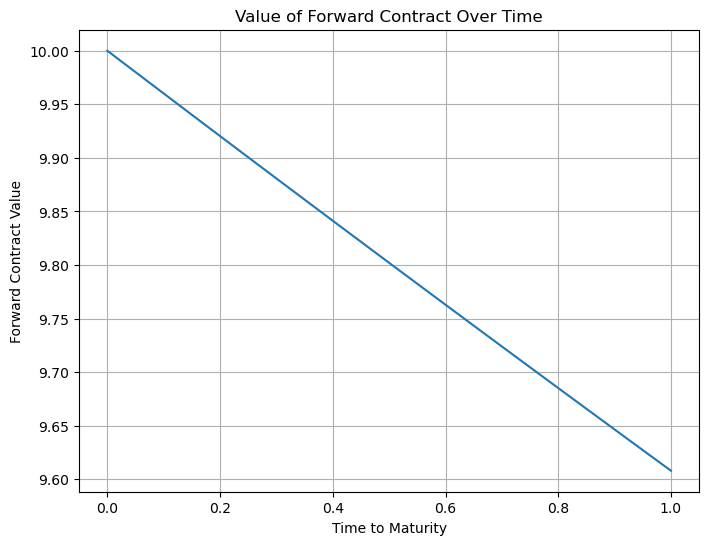

In [257]:
# Function to calculate the value of a forward contract
def calculate_forward_contract_value(forward_price, delivery_price, risk_free_rate, time_to_maturity):
    return (forward_price - delivery_price) * np.exp(-risk_free_rate * time_to_maturity)

# Function to plot forward contract value over time
def plot_forward_contract_value(forward_price, delivery_price, risk_free_rate, time_values):
    forward_contract_values = calculate_forward_contract_value(forward_price, delivery_price, risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, forward_contract_values)
    plt.title('Value of Forward Contract Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Forward Contract Value')
    plt.grid(True)
    plt.show()

# Fixed values for the forward contract
forward_price_contract = 180  # Replace with actual forward price
delivery_price_contract = 170  # Replace with actual delivery price
risk_free_rate_contract = 0.04  # Replace with actual risk-free rate
max_time_contract = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_contract = np.linspace(0, max_time_contract, 100)

# Display the interactive plot for a forward contract
plot_forward_contract_value(forward_price_contract, delivery_price_contract, risk_free_rate_contract, time_values_contract)


Using this in conjunction with the forward price for an investment asset paying no income, we can deduce that the value of the contract on any given day can be expressed as the asset price, minus the delivery price, multiplied by e, to the power of negative the rate, multiplied by the time to maturity on the contract. 

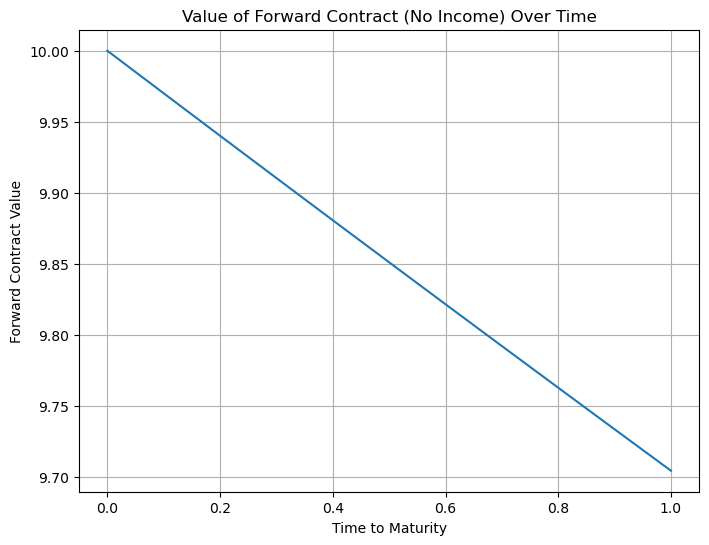

In [258]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the value of a forward contract for no income asset
def calculate_forward_contract_value_no_income(asset_price, delivery_price, risk_free_rate, time_to_maturity):
    return (asset_price - delivery_price) * np.exp(-risk_free_rate * time_to_maturity)

# Function to plot forward contract value over time for no income asset
def plot_forward_contract_value_no_income(asset_price, delivery_price, risk_free_rate, time_values):
    forward_contract_values = calculate_forward_contract_value_no_income(asset_price, delivery_price, risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, forward_contract_values)
    plt.title('Value of Forward Contract (No Income) Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Forward Contract Value')
    plt.grid(True)
    plt.show()

# Fixed values for the no income asset
asset_price_no_income = 120  # Replace with actual asset price
delivery_price_no_income = 110  # Replace with actual delivery price
risk_free_rate_no_income = 0.03  # Replace with actual risk-free rate
max_time_no_income = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_no_income = np.linspace(0, max_time_no_income, 100)

# Display the interactive plot for a no income asset
plot_forward_contract_value_no_income(asset_price_no_income, delivery_price_no_income, risk_free_rate_no_income, time_values_no_income)


Similarly, using this equation in conjunction with the forward price for a known income asset, we can deduce that the value of the contract on any given day, can be expressed as the asset price, minus the value of known income during the life of the contract, minus the delivery price, multiplied by e, to the power of negative the rate, multiplied by the time to maturity on the contract. 

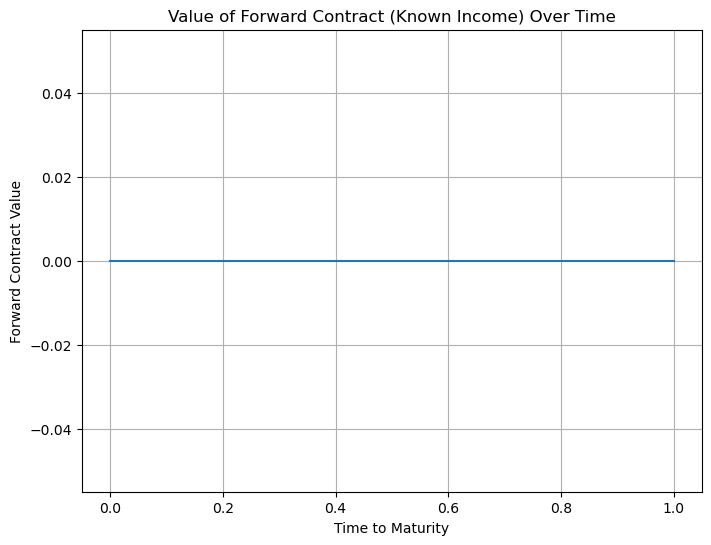

In [259]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the value of a forward contract for a known income asset
def calculate_forward_contract_value_known_income(asset_price, known_income, delivery_price, risk_free_rate, time_to_maturity):
    return (asset_price - known_income - delivery_price) * np.exp(-risk_free_rate * time_to_maturity)

# Function to plot forward contract value over time for a known income asset
def plot_forward_contract_value_known_income(asset_price, known_income, delivery_price, risk_free_rate, time_values):
    forward_contract_values = calculate_forward_contract_value_known_income(
        asset_price, known_income, delivery_price, risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, forward_contract_values)
    plt.title('Value of Forward Contract (Known Income) Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Forward Contract Value')
    plt.grid(True)
    plt.show()

# Fixed values for the known income asset
asset_price_known_income = 150  # Replace with actual asset price
known_income_known_income = 10  # Replace with actual known income
delivery_price_known_income = 140  # Replace with actual delivery price
risk_free_rate_known_income = 0.02  # Replace with actual risk-free rate
max_time_known_income = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_known_income = np.linspace(0, max_time_known_income, 100)

# Display the interactive plot for a known income asset
plot_forward_contract_value_known_income(
    asset_price_known_income, known_income_known_income, delivery_price_known_income, risk_free_rate_known_income, time_values_known_income)

Finally, using this equation in conjunction with the forward price for an asset paying a known yield, we can deduce that the value of the contract on any given day, can be expressed as the asset price, multiplied by e, to the power of negative the average yield per annum on the asset, during the life of a forward contract with continuous compounding, multiplied by the time to maturity on the contract, minus the delivery price, multiplied by e, to the power of negative the risk free rate, multiplied by the time to maturity on the contract.


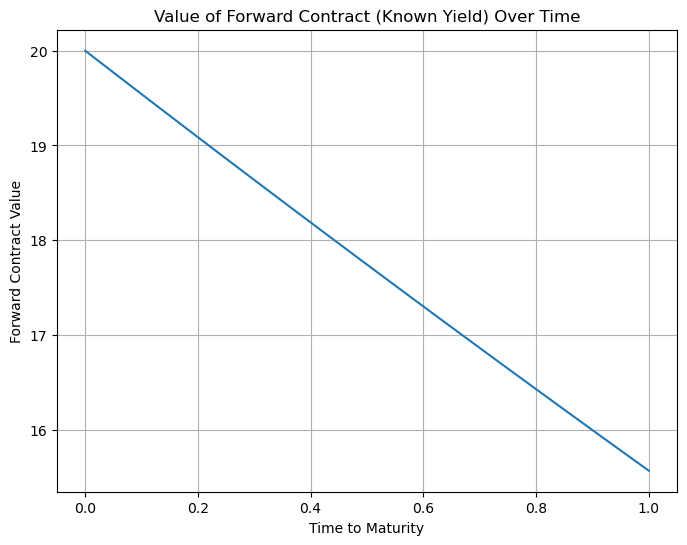

In [260]:
# Function to calculate the value of a forward contract for an asset with known yield
def calculate_forward_contract_value_known_yield(asset_price, yield_rate, delivery_price, risk_free_rate, time_to_maturity):
    return (asset_price * np.exp(-yield_rate * time_to_maturity) - 
            delivery_price * np.exp(-risk_free_rate * time_to_maturity))

# Function to plot forward contract value over time for an asset with known yield
def plot_forward_contract_value_known_yield(asset_price, yield_rate, delivery_price, risk_free_rate, time_values):
    forward_contract_values = calculate_forward_contract_value_known_yield(
        asset_price, yield_rate, delivery_price, risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, forward_contract_values)
    plt.title('Value of Forward Contract (Known Yield) Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Forward Contract Value')
    plt.grid(True)
    plt.show()

# Fixed values for the asset with known yield
asset_price_known_yield = 200  # Replace with actual asset price
yield_rate_known_yield = 0.05  # Replace with actual yield rate
delivery_price_known_yield = 180  # Replace with actual delivery price
risk_free_rate_known_yield = 0.03  # Replace with actual risk-free rate
max_time_known_yield = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_known_yield = np.linspace(0, max_time_known_yield, 100)

# Display the interactive plot for an asset with known yield
plot_forward_contract_value_known_yield(
    asset_price_known_yield, yield_rate_known_yield, delivery_price_known_yield, risk_free_rate_known_yield, time_values_known_yield)

### Futures Prices of Stock Indices 

- Futures price calculation involves asset price, a mathematical factor, interest rates, and dividend yields.
- Futures price increases at a rate determined by interest rates and dividend yields.

1. Subtract the dividend yield from the interest rate: (rate - dividend yield)
2. Multiply the result by the time to maturity: (rate - dividend yield) * time
3. Raise e (Euler's number) to the power of the above result: e^((rate - dividend yield) * time)
4. Multiply the obtained value by the asset price: asset price * e^((rate - dividend yield) * time)

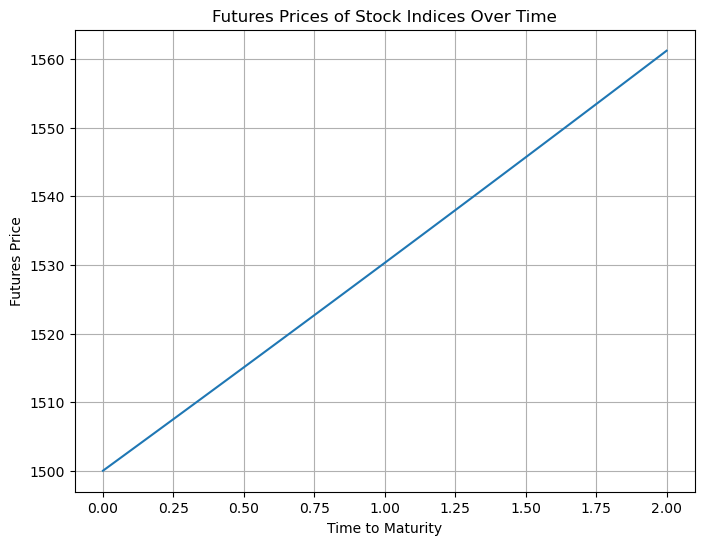

In [261]:
# Function to calculate futures price of stock indices
def calculate_futures_price_stock_indices(asset_price, risk_free_rate, dividend_yield_rate, time_to_maturity):
    return asset_price * np.exp((risk_free_rate - dividend_yield_rate) * time_to_maturity)

# Function to plot futures price of stock indices over time
def plot_futures_price_stock_indices(asset_price, risk_free_rate, dividend_yield_rate, time_values):
    futures_prices = calculate_futures_price_stock_indices(
        asset_price, risk_free_rate, dividend_yield_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, futures_prices)
    plt.title('Futures Prices of Stock Indices Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Fixed values for stock indices
asset_price_stock_indices = 1500  # Replace with actual asset price
risk_free_rate_stock_indices = 0.04  # Replace with actual risk-free rate
dividend_yield_rate_stock_indices = 0.02  # Replace with actual dividend yield rate
max_time_stock_indices = 2  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_stock_indices = np.linspace(0, max_time_stock_indices, 100)

# Display the interactive plot for stock indices
plot_futures_price_stock_indices(
    asset_price_stock_indices, risk_free_rate_stock_indices, dividend_yield_rate_stock_indices, time_values_stock_indices)

### Index Arbitrage

- If the futures contract price is higher than the calculated expected future spot price (\(F_o > S_0e^{(r-q)T}\)), short futures contracts and buy stocks at the current spot price.
- If the futures contract price is lower than the calculated expected future spot price (\(F_o < S_0e^{(r-q)T}\)), short the underlying stocks in the spot market and take a long position in futures contracts.
- These strategies are known as Index Arbitrage.

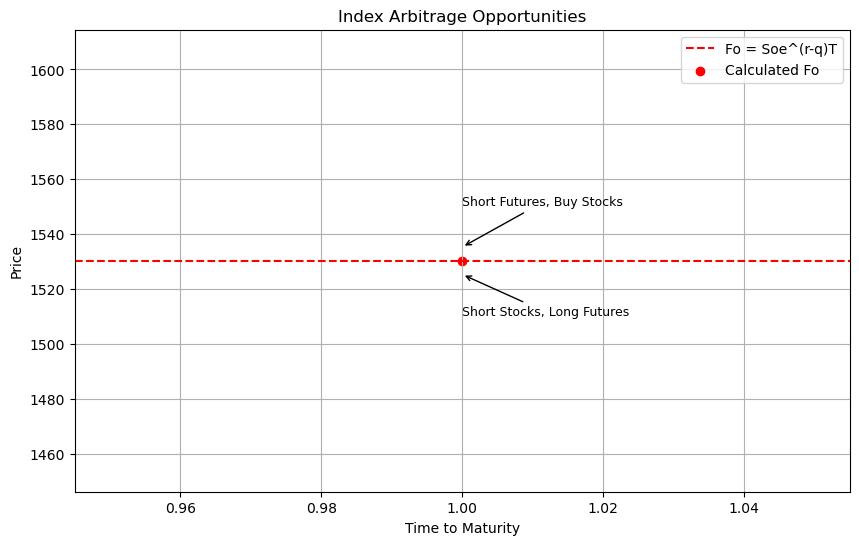

In [262]:
# Function to calculate futures price of stock indices
def calculate_futures_price_stock_indices(asset_price, risk_free_rate, dividend_yield_rate, time_to_maturity):
    return asset_price * np.exp((risk_free_rate - dividend_yield_rate) * time_to_maturity)

# Function to plot arbitrage opportunities
def plot_index_arbitrage_opportunities(asset_price, risk_free_rate, dividend_yield_rate, time_to_maturity):
    # Calculate futures price
    futures_price = calculate_futures_price_stock_indices(
        asset_price, risk_free_rate, dividend_yield_rate, time_to_maturity)

    # Create a plot
    plt.figure(figsize=(10, 6))

    # Plot the line representing Fo = Soe^(r-q)T
    plt.axhline(y=futures_price, color='r', linestyle='--', label='Fo = Soe^(r-q)T')

    # Plot the point for the calculated Fo
    plt.scatter(time_to_maturity, futures_price, color='red', marker='o', label='Calculated Fo')

    # Plotting the arbitrage opportunities
    plt.annotate('Short Futures, Buy Stocks', xy=(time_to_maturity, futures_price + 5), xytext=(time_to_maturity, futures_price + 20),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9)
    plt.annotate('Short Stocks, Long Futures', xy=(time_to_maturity, futures_price - 5), xytext=(time_to_maturity, futures_price - 20),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9)

    # Add labels and title
    plt.title('Index Arbitrage Opportunities')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Fixed values for stock indices arbitrage visualization
asset_price_arbitrage = 1500  # Replace with actual asset price
risk_free_rate_arbitrage = 0.04  # Replace with actual risk-free rate
dividend_yield_rate_arbitrage = 0.02  # Replace with actual dividend yield rate
time_to_maturity_arbitrage = 1  # Replace with actual time to maturity

# Display the interactive plot for Index Arbitrage opportunities
plot_index_arbitrage_opportunities(
    asset_price_arbitrage, risk_free_rate_arbitrage, dividend_yield_rate_arbitrage, time_to_maturity_arbitrage)

### Forward and Futures Contracts on Currencies 

The definition of the forward or futures price of one unit of foreign currency can be expressed as the spot price of one unit of the foreign currency, multiplied by e, to the power of the domestic risk free rate, minus the value of the foreign risk free rate, multiplied by the time to maturity on the contract.

A foreign currency can be regarded as an investment asset paying a known yield. The yield is the risk free rate of interest in the foreign currency. 

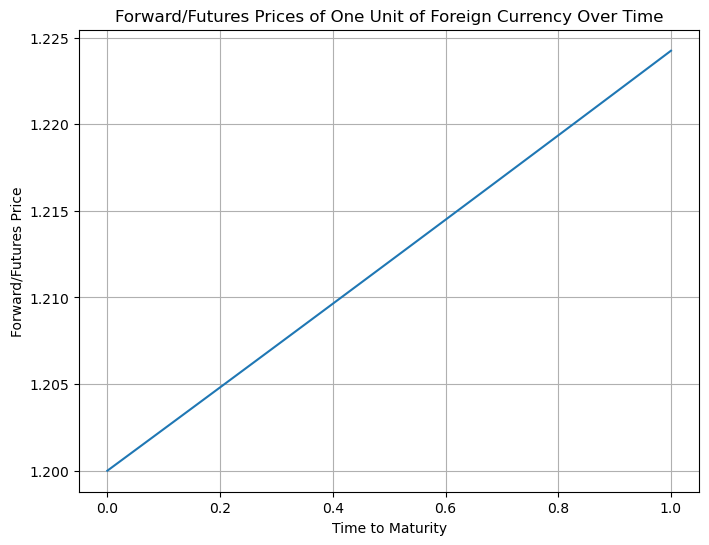

In [263]:
# Function to calculate forward/futures price of one unit of foreign currency
def calculate_forward_currency_price(spot_price, domestic_risk_free_rate, foreign_risk_free_rate, time_to_maturity):
    return spot_price * np.exp((domestic_risk_free_rate - foreign_risk_free_rate) * time_to_maturity)

# Function to plot forward/futures price of one unit of foreign currency over time
def plot_forward_currency_price(spot_price, domestic_risk_free_rate, foreign_risk_free_rate, time_values):
    forward_currency_prices = calculate_forward_currency_price(
        spot_price, domestic_risk_free_rate, foreign_risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, forward_currency_prices)
    plt.title('Forward/Futures Prices of One Unit of Foreign Currency Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Forward/Futures Price')
    plt.grid(True)
    plt.show()

# Fixed values for one unit of foreign currency
spot_price_currency = 1.2  # Replace with actual spot price
domestic_risk_free_rate_currency = 0.03  # Replace with actual domestic risk-free rate
foreign_risk_free_rate_currency = 0.01  # Replace with actual foreign risk-free rate
max_time_currency = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_currency = np.linspace(0, max_time_currency, 100)

# Display the interactive plot for one unit of foreign currency
plot_forward_currency_price(
    spot_price_currency, domestic_risk_free_rate_currency, foreign_risk_free_rate_currency, time_values_currency)

### Futures on Commodities 

Hedging strategies of gold producers lead to a requirement for investment banks to borrow gold, central banks charge interest on gold leases when they lend gold, the same is true of silver. Storage costs must also be treated as a negative income, so that the forward price of a commodity can be expressed as the asset price, plus the storage costs, multiplied by e, to the power of the risk free rate, multiplied by the time to maturity on the contract.

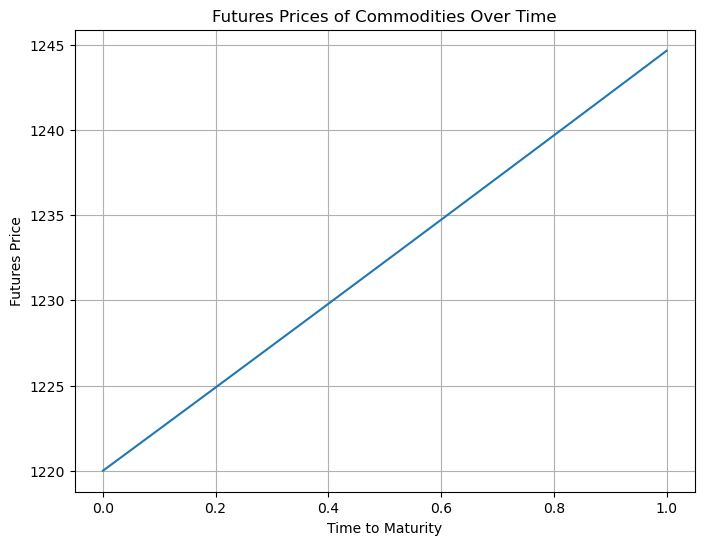

In [264]:
# Function to calculate futures price of commodities
def calculate_futures_price_commodities(asset_price, storage_costs, risk_free_rate, time_to_maturity):
    return (asset_price + storage_costs) * np.exp(risk_free_rate * time_to_maturity)

# Function to plot futures price of commodities over time
def plot_futures_price_commodities(asset_price, storage_costs, risk_free_rate, time_values):
    futures_prices = calculate_futures_price_commodities(
        asset_price, storage_costs, risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, futures_prices)
    plt.title('Futures Prices of Commodities Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Fixed values for commodities
asset_price_commodities = 1200  # Replace with actual asset price
storage_costs_commodities = 20  # Replace with actual storage costs
risk_free_rate_commodities = 0.02  # Replace with actual risk-free rate
max_time_commodities = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_commodities = np.linspace(0, max_time_commodities, 100)

# Display the interactive plot for commodities
plot_futures_price_commodities(
    asset_price_commodities, storage_costs_commodities, risk_free_rate_commodities, time_values_commodities)

### Consumption Commodities

The no arbitrage argument cannot be used for a consumption commodity as individuals and companies who hold the assets, usually plan to use them in some way. Therefore, there is nothing to stop mispricing from holding, the only equation we can assert for a consumption commodity is that the forward price is greater than or equal to the asset price, plus storage costs, multiplied by e, to the power of the risk free rate, multiplied by the time to maturity on the contract.

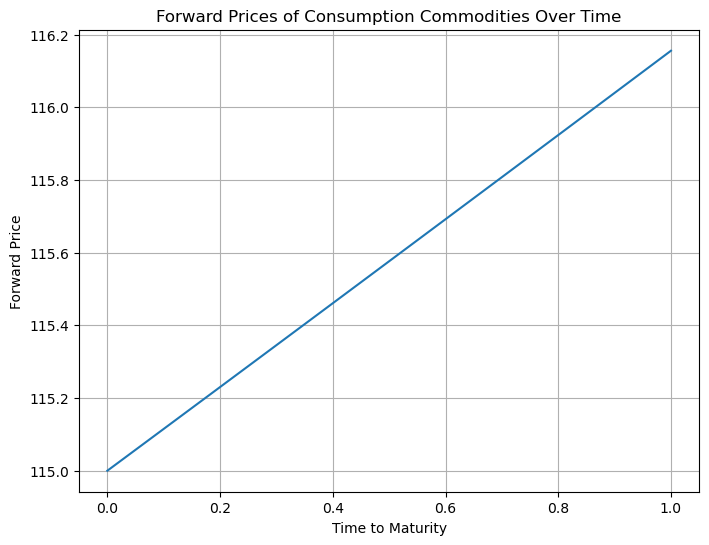

In [265]:
# Function to calculate forward price of consumption commodities
def calculate_forward_price_consumption_commodities(asset_price, storage_costs, risk_free_rate, time_to_maturity):
    return (asset_price + storage_costs) * np.exp(risk_free_rate * time_to_maturity)

# Function to plot forward price of consumption commodities over time
def plot_forward_price_consumption_commodities(asset_price, storage_costs, risk_free_rate, time_values):
    forward_prices = calculate_forward_price_consumption_commodities(
        asset_price, storage_costs, risk_free_rate, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, forward_prices)
    plt.title('Forward Prices of Consumption Commodities Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Forward Price')
    plt.grid(True)
    plt.show()

# Fixed values for consumption commodities
asset_price_consumption_commodities = 100  # Replace with actual asset price
storage_costs_consumption_commodities = 15  # Replace with actual storage costs
risk_free_rate_consumption_commodities = 0.01  # Replace with actual risk-free rate
max_time_consumption_commodities = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_consumption_commodities = np.linspace(0, max_time_consumption_commodities, 100)

# Display the interactive plot for consumption commodities
plot_forward_price_consumption_commodities(
    asset_price_consumption_commodities, storage_costs_consumption_commodities, risk_free_rate_consumption_commodities, time_values_consumption_commodities)

### Convenience Yields 

The benefits from holding the physical asset in commodities is referred to as the convenience yield. When taken into account for the futures contract price, this can be expressed as the asset price, multiplied by e, to the power of the risk free rate, plus the storage costs, minus the convenience yield, multiplied by the time to maturity on the contract. The convenience yield reflects the market’s expectations concerning the futures availability of the commodity. 

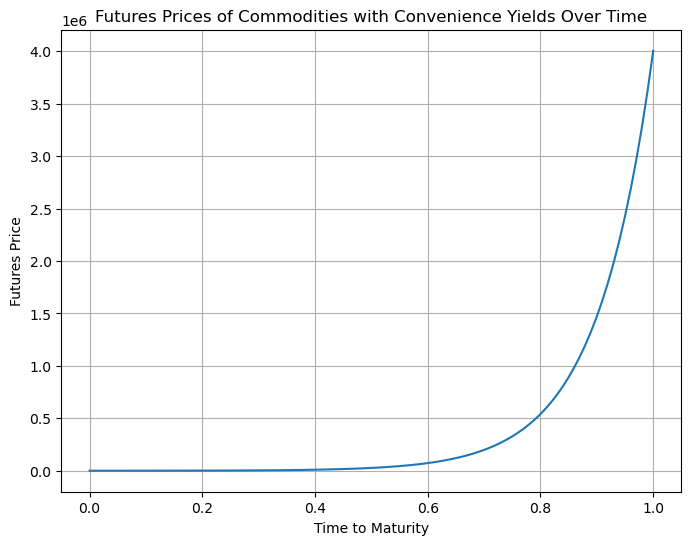

In [266]:
# Function to calculate futures price of commodities with convenience yields
def calculate_futures_price_convenience_yield(asset_price, risk_free_rate, storage_costs, convenience_yield, time_to_maturity):
    return asset_price * np.exp((risk_free_rate + storage_costs - convenience_yield) * time_to_maturity)

# Function to plot futures price of commodities with convenience yields over time
def plot_futures_price_convenience_yield(asset_price, risk_free_rate, storage_costs, convenience_yield, time_values):
    futures_prices = calculate_futures_price_convenience_yield(
        asset_price, risk_free_rate, storage_costs, convenience_yield, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, futures_prices)
    plt.title('Futures Prices of Commodities with Convenience Yields Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Fixed values for commodities with convenience yields
asset_price_convenience_yield = 180  # Replace with actual asset price
risk_free_rate_convenience_yield = 0.03  # Replace with actual risk-free rate
storage_costs_convenience_yield = 10  # Replace with actual storage costs
convenience_yield_value = 0.02  # Replace with actual convenience yield
max_time_convenience_yield = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_convenience_yield = np.linspace(0, max_time_convenience_yield, 100)

# Display the interactive plot for commodities with convenience yields
plot_futures_price_convenience_yield(
    asset_price_convenience_yield, risk_free_rate_convenience_yield, storage_costs_convenience_yield, convenience_yield_value, time_values_convenience_yield)

### The Cost of Carry

The relationship between futures and spot prices can be summarized in terms of the cost of carry. For a non-dividend paying stock, the cost of carry is the risk free rate, for a stock index, the cost of carry is the risk free rate minus the average yield per annum on the asset, during the life of a forward contract with continuous compounding. For a currency, the cost of carry is the risk free rate, minus the… for a commodity that provides income, the cost of carry is the risk free rate, minus the average yield per annum on the asset, during the life of a forward contract, plus storage costs. Defining the cost of carry as c, the futures prices for consumption/Investment assets can be deduced as below

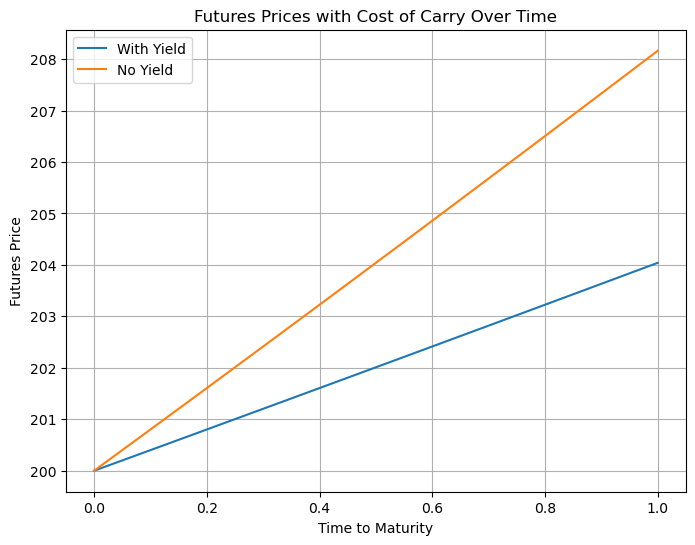

In [267]:
# Function to calculate futures price of assets with the cost of carry
def calculate_futures_price_cost_of_carry(asset_price, cost_of_carry, yield_rate, time_to_maturity):
    return asset_price * np.exp((cost_of_carry - yield_rate) * time_to_maturity)

# Function to calculate futures price of assets with the cost of carry and no yield
def calculate_futures_price_cost_of_carry_no_yield(asset_price, cost_of_carry, time_to_maturity):
    return asset_price * np.exp(cost_of_carry * time_to_maturity)

# Function to plot futures price of assets with the cost of carry over time
def plot_futures_price_cost_of_carry(asset_price, cost_of_carry, yield_rate, time_values):
    futures_prices_with_yield = calculate_futures_price_cost_of_carry(
        asset_price, cost_of_carry, yield_rate, time_values)
    
    futures_prices_no_yield = calculate_futures_price_cost_of_carry_no_yield(
        asset_price, cost_of_carry, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, futures_prices_with_yield, label='With Yield')
    plt.plot(time_values, futures_prices_no_yield, label='No Yield')
    plt.title('Futures Prices with Cost of Carry Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Futures Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fixed values for assets with the cost of carry
asset_price_cost_of_carry = 200  # Replace with actual asset price
cost_of_carry_cost_of_carry = 0.04  # Replace with actual cost of carry
yield_rate_cost_of_carry = 0.02  # Replace with actual yield rate
max_time_cost_of_carry = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_cost_of_carry = np.linspace(0, max_time_cost_of_carry, 100)

# Display the interactive plot for assets with the cost of carry
plot_futures_price_cost_of_carry(
    asset_price_cost_of_carry, cost_of_carry_cost_of_carry, yield_rate_cost_of_carry, time_values_cost_of_carry)

### Futures Prices and Expected Futures Spot Prices 
Futures prices generally converge to spot prices at maturity, if the expected spot price is low, the market expects the futures price to decline, if the expected spot price is high, then the reverse is true. 

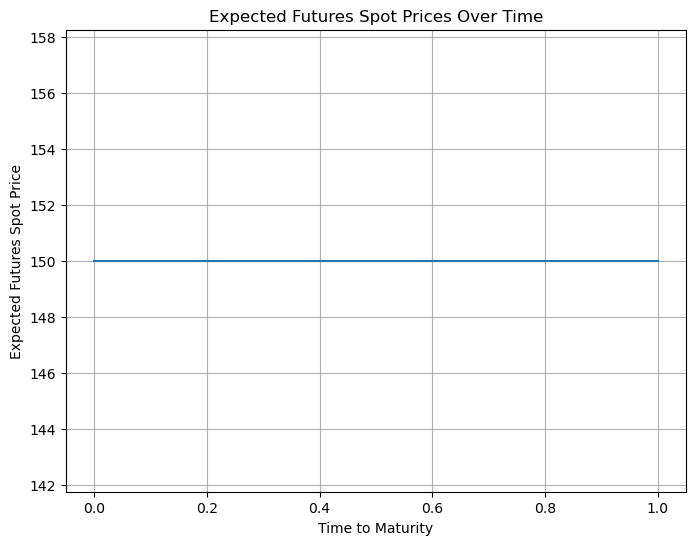

In [268]:
# Function to calculate expected futures spot prices
def calculate_expected_futures_spot_prices(expected_spot_prices, time_to_maturity):
    return expected_spot_prices * np.exp(0 * time_to_maturity)  # Assuming no cost of carry for simplicity

# Function to plot expected futures spot prices over time
def plot_expected_futures_spot_prices(expected_spot_prices, time_values):
    expected_futures_spot_prices = calculate_expected_futures_spot_prices(
        expected_spot_prices, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, expected_futures_spot_prices)
    plt.title('Expected Futures Spot Prices Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Expected Futures Spot Price')
    plt.grid(True)
    plt.show()

# Fixed values for expected spot prices
expected_spot_prices = 150  # Replace with actual expected spot prices
max_time_expected_spot_prices = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_expected_spot_prices = np.linspace(0, max_time_expected_spot_prices, 100)

# Display the interactive plot for expected futures spot prices
plot_expected_futures_spot_prices(expected_spot_prices, time_values_expected_spot_prices)

### Keynes and Hicks 

These economists summarize that if hedgers hold short positions whilst speculators hold long positions, the futures price of an asset will be below the expected spot price as speculators require compensation for the risks they take, whilst hedgers are prepared to lose money as their losses are reduced by futures contracts. If hedgers hold long positions while speculators hold short positions, the reverse argument is true. 

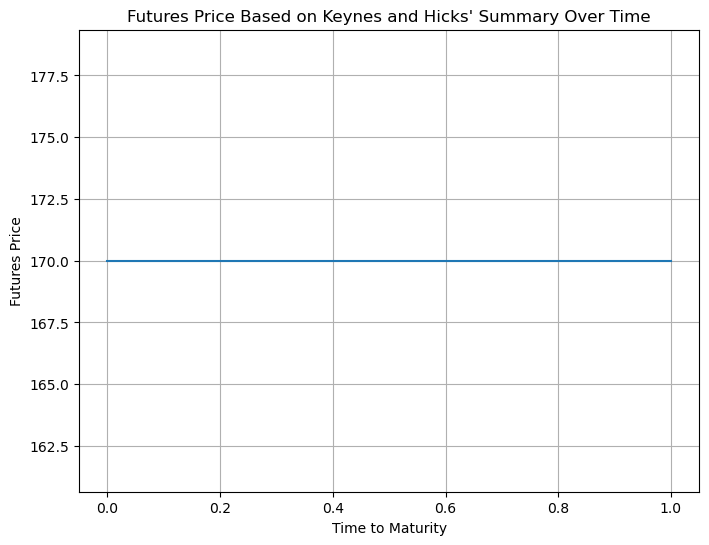

In [269]:
# Function to calculate futures price based on Keynes and Hicks' summary
def calculate_futures_price_keynes_hicks(expected_spot_price, speculator_risk_premium, time_to_maturity):
    return expected_spot_price - speculator_risk_premium * np.exp(0 * time_to_maturity)  # Assuming no cost of carry for simplicity

# Function to plot futures price based on Keynes and Hicks' summary over time
def plot_futures_price_keynes_hicks(expected_spot_price, speculator_risk_premium, time_values):
    futures_prices_keynes_hicks = calculate_futures_price_keynes_hicks(
        expected_spot_price, speculator_risk_premium, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, futures_prices_keynes_hicks)
    plt.title('Futures Price Based on Keynes and Hicks\' Summary Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Fixed values for Keynes and Hicks' summary
expected_spot_price_keynes_hicks = 180  # Replace with actual expected spot price
speculator_risk_premium_keynes_hicks = 10  # Replace with actual speculator risk premium
max_time_keynes_hicks = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_keynes_hicks = np.linspace(0, max_time_keynes_hicks, 100)

# Display the interactive plot for Keynes and Hicks' summary
plot_futures_price_keynes_hicks(
    expected_spot_price_keynes_hicks, speculator_risk_premium_keynes_hicks, time_values_keynes_hicks)

### The Risk in a Futures Position

To value a long futures position, the discount rate used, should equal an investors required return. Using k as the invstor’s required return, and E as expected value. we can assume that all investments in securities markets are priced to have an NPV of 0. We can deduce that the forward price is equal to the expected value, multiplied by the price of the asset at maturity, multiplied by e, to the power of the risk free rate, minus the investor’s required return, multiplied by the time to maturity on the contract.

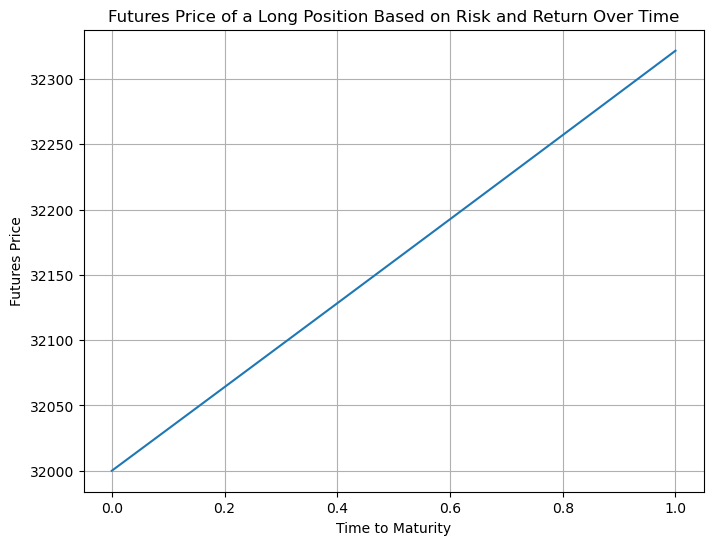

In [270]:
# Function to calculate futures price of a long position based on risk and return
def calculate_futures_price_long_position(expected_value, asset_price_at_maturity, risk_free_rate, investor_required_return, time_to_maturity):
    return expected_value * asset_price_at_maturity * np.exp((risk_free_rate - investor_required_return) * time_to_maturity)

# Function to plot futures price of a long position based on risk and return over time
def plot_futures_price_long_position(expected_value, asset_price_at_maturity, risk_free_rate, investor_required_return, time_values):
    futures_prices_long_position = calculate_futures_price_long_position(
        expected_value, asset_price_at_maturity, risk_free_rate, investor_required_return, time_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, futures_prices_long_position)
    plt.title('Futures Price of a Long Position Based on Risk and Return Over Time')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Fixed values for a long futures position based on risk and return
expected_value_long_position = 160  # Replace with actual expected value
asset_price_at_maturity_long_position = 200  # Replace with actual asset price at maturity
risk_free_rate_long_position = 0.03  # Replace with actual risk-free rate
investor_required_return_long_position = 0.02  # Replace with actual investor required return
max_time_long_position = 1  # Replace with actual maximum time to maturity

# Generate time values for plotting
time_values_long_position = np.linspace(0, max_time_long_position, 100)

# Display the interactive plot for a long futures position based on risk and return
plot_futures_price_long_position(
    expected_value_long_position, asset_price_at_maturity_long_position, risk_free_rate_long_position, investor_required_return_long_position, time_values_long_position)

If the returns from this investment are uncorrelated to the market, we would discount k at equal to the risk free rate, the above formula simplifies as:

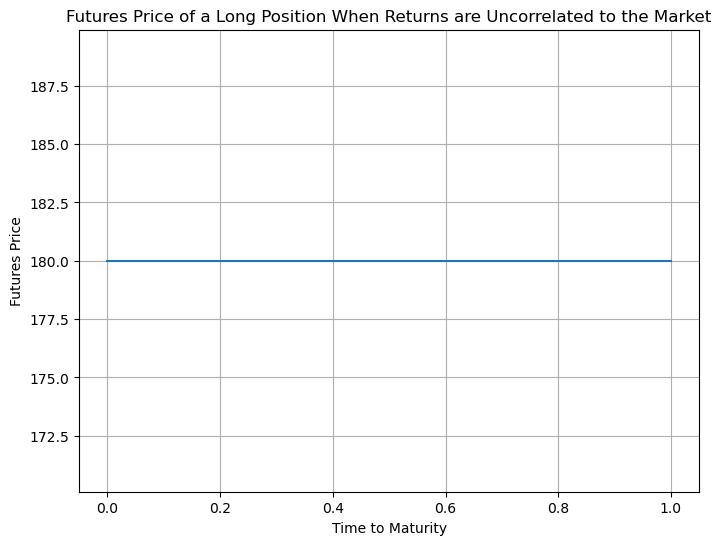

In [271]:
# Function to calculate futures price of a long position when returns are uncorrelated to the market
def calculate_futures_price_long_position_uncorrelated(expected_value_at_maturity):
    return expected_value_at_maturity

# Function to plot futures price of a long position when returns are uncorrelated to the market over time
def plot_futures_price_long_position_uncorrelated(expected_value_at_maturity, time_values):
    futures_prices_long_position_uncorrelated = calculate_futures_price_long_position_uncorrelated(
        expected_value_at_maturity)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, [futures_prices_long_position_uncorrelated] * len(time_values))
    plt.title('Futures Price of a Long Position When Returns are Uncorrelated to the Market')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Fixed values for a long futures position when returns are uncorrelated to the market
expected_value_at_maturity_uncorrelated = 180  # Replace with actual expected value at maturity

# Display the interactive plot for a long futures position when returns are uncorrelated to the market
plot_futures_price_long_position_uncorrelated(
    expected_value_at_maturity_uncorrelated, time_values_long_position)

If the return of the investment is positively correlated with the market, k > r, the above formula would be amended to show:

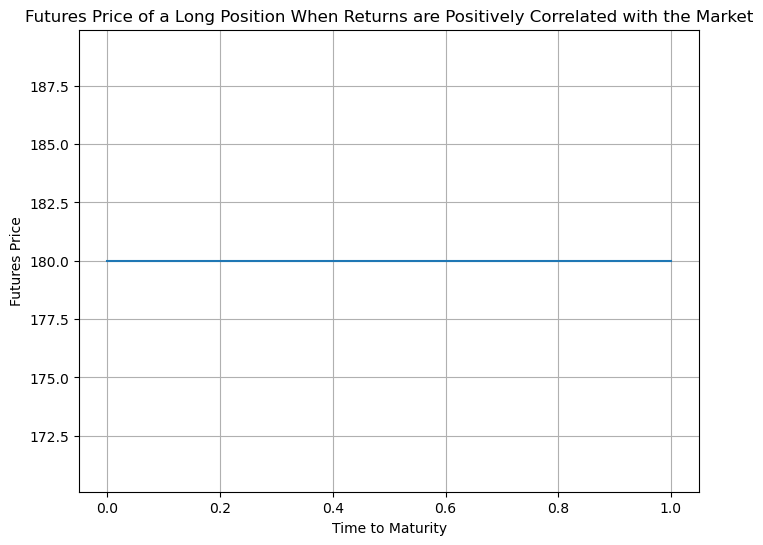

In [272]:
# Function to calculate futures price of a long position when returns are positively correlated with the market
def calculate_futures_price_long_position_positively_correlated(expected_value_at_maturity):
    return 0.9 * expected_value_at_maturity  # Adjusting for F0 < E(ST) with a fixed multiplier

# Function to plot futures price of a long position when returns are positively correlated with the market over time
def plot_futures_price_long_position_positively_correlated(expected_value_at_maturity, time_values):
    futures_prices_long_position_positively_correlated = calculate_futures_price_long_position_positively_correlated(
        expected_value_at_maturity)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, [futures_prices_long_position_positively_correlated] * len(time_values))
    plt.title('Futures Price of a Long Position When Returns are Positively Correlated with the Market')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Fixed values for a long futures position when returns are positively correlated with the market
expected_value_at_maturity_positively_correlated = 200  # Replace with actual expected value at maturity

# Display the interactive plot for a long futures position when returns are positively correlated with the market
plot_futures_price_long_position_positively_correlated(
    expected_value_at_maturity_positively_correlated, time_values_long_position)

If the return of the investment is negatively correlated with the market k < r, the above formula would be amended to show:

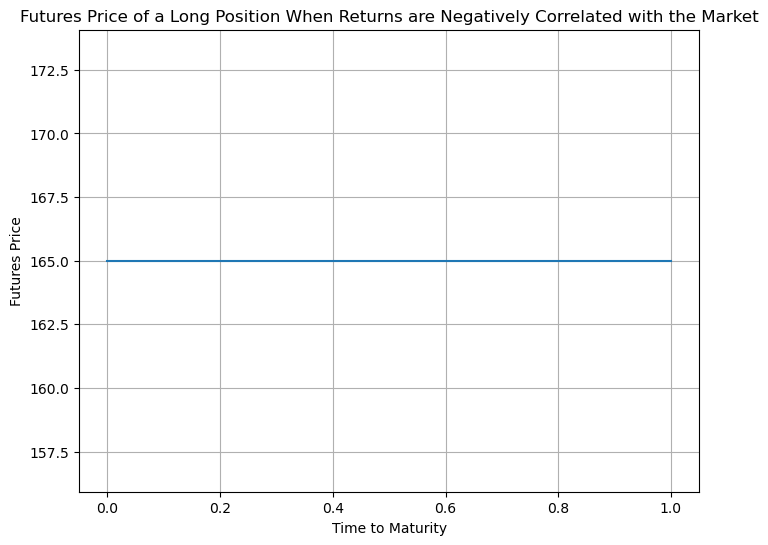

In [273]:
# Function to calculate futures price of a long position when returns are negatively correlated with the market
def calculate_futures_price_long_position_negatively_correlated(expected_value_at_maturity):
    return 1.1 * expected_value_at_maturity  # Adjusting for F0 > E(ST) with a fixed multiplier

# Function to plot futures price of a long position when returns are negatively correlated with the market over time
def plot_futures_price_long_position_negatively_correlated(expected_value_at_maturity, time_values):
    futures_prices_long_position_negatively_correlated = calculate_futures_price_long_position_negatively_correlated(
        expected_value_at_maturity)
    
    plt.figure(figsize=(8, 6))
    plt.plot(time_values, [futures_prices_long_position_negatively_correlated] * len(time_values))
    plt.title('Futures Price of a Long Position When Returns are Negatively Correlated with the Market')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Fixed values for a long futures position when returns are negatively correlated with the market
expected_value_at_maturity_negatively_correlated = 150  # Replace with actual expected value at maturity

# Display the interactive plot for a long futures position when returns are negatively correlated with the market
plot_futures_price_long_position_negatively_correlated(
    expected_value_at_maturity_negatively_correlated, time_values_long_position)


# Interest Rate Futures

### Day Counts

In the world of finance, interest rate futures play a crucial role. One important aspect to grasp is how interest is calculated over different periods, and this involves what we call "day counts."

Day counts determine the number of days over which interest is earned. There are several conventions, and here are three common ones:

### Actual/Actual

This method calculates the actual number of days between two dates and divides it by the actual number of days in the reference period. Let's visualize how interest earned changes with different reference periods.

### 30/360

In this convention, we consider each month as having 30 days and each year as having 360 days. This simplifies calculations and is commonly used in financial markets.

### Actual/360

Similar to Actual/Actual, but the denominator is fixed at 360 days per year. This method is also widely used.

Now, let's explore these day count conventions interactively!

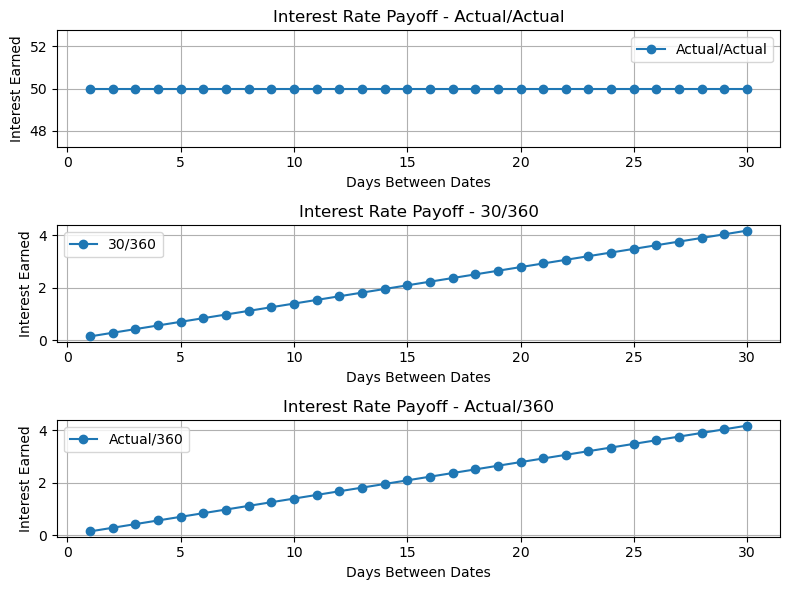

In [274]:
# Function to calculate interest earned based on day count conventions
def calculate_interest_earned(principal, interest_rate, days_between_dates, days_in_reference_period):
    return (days_between_dates / days_in_reference_period) * principal * interest_rate

# Function to visualize interest rate payoff based on day count conventions
def plot_interest_rate_payoff(day_counts, interest_rate, principal):
    # Calculate payoffs for different day count conventions
    actual_actual_payoffs = [calculate_interest_earned(principal, interest_rate, days, days) for days in day_counts]
    thirty360_payoffs = [calculate_interest_earned(principal, interest_rate, days, 360) for days in day_counts]
    actual360_payoffs = [calculate_interest_earned(principal, interest_rate, days, 360) for days in day_counts]

    # Plot the payoffs for each convention on separate charts
    plt.figure(figsize=(8, 6))

    plt.subplot(3, 1, 1)
    plt.plot(day_counts, actual_actual_payoffs, label='Actual/Actual', marker='o')
    plt.legend()
    plt.title('Interest Rate Payoff - Actual/Actual')
    plt.xlabel('Days Between Dates')
    plt.ylabel('Interest Earned')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(day_counts, thirty360_payoffs, label='30/360', marker='o')
    plt.legend()
    plt.title('Interest Rate Payoff - 30/360')
    plt.xlabel('Days Between Dates')
    plt.ylabel('Interest Earned')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(day_counts, actual360_payoffs, label='Actual/360', marker='o')
    plt.legend()
    plt.title('Interest Rate Payoff - Actual/360')
    plt.xlabel('Days Between Dates')
    plt.ylabel('Interest Earned')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Set fixed values for interest rate and principal
interest_rate = 0.05  # 5%
principal = 1000

# Generate day counts for plotting
day_counts = np.arange(1, 31, 1)

# Display the interactive plot for interest rate payoff based on day count conventions
plot_interest_rate_payoff(day_counts, interest_rate, principal)

### Tbill Quotes 

MM instruments are sometimes quoted using a discount rate. In general, the relationship between the cash price per $100 of face value and the quoted price of a Tbill in the US is 360 divided by the remaining life of the Tbill measured in calendar days, multiplied by the notional, minus the cash price. 

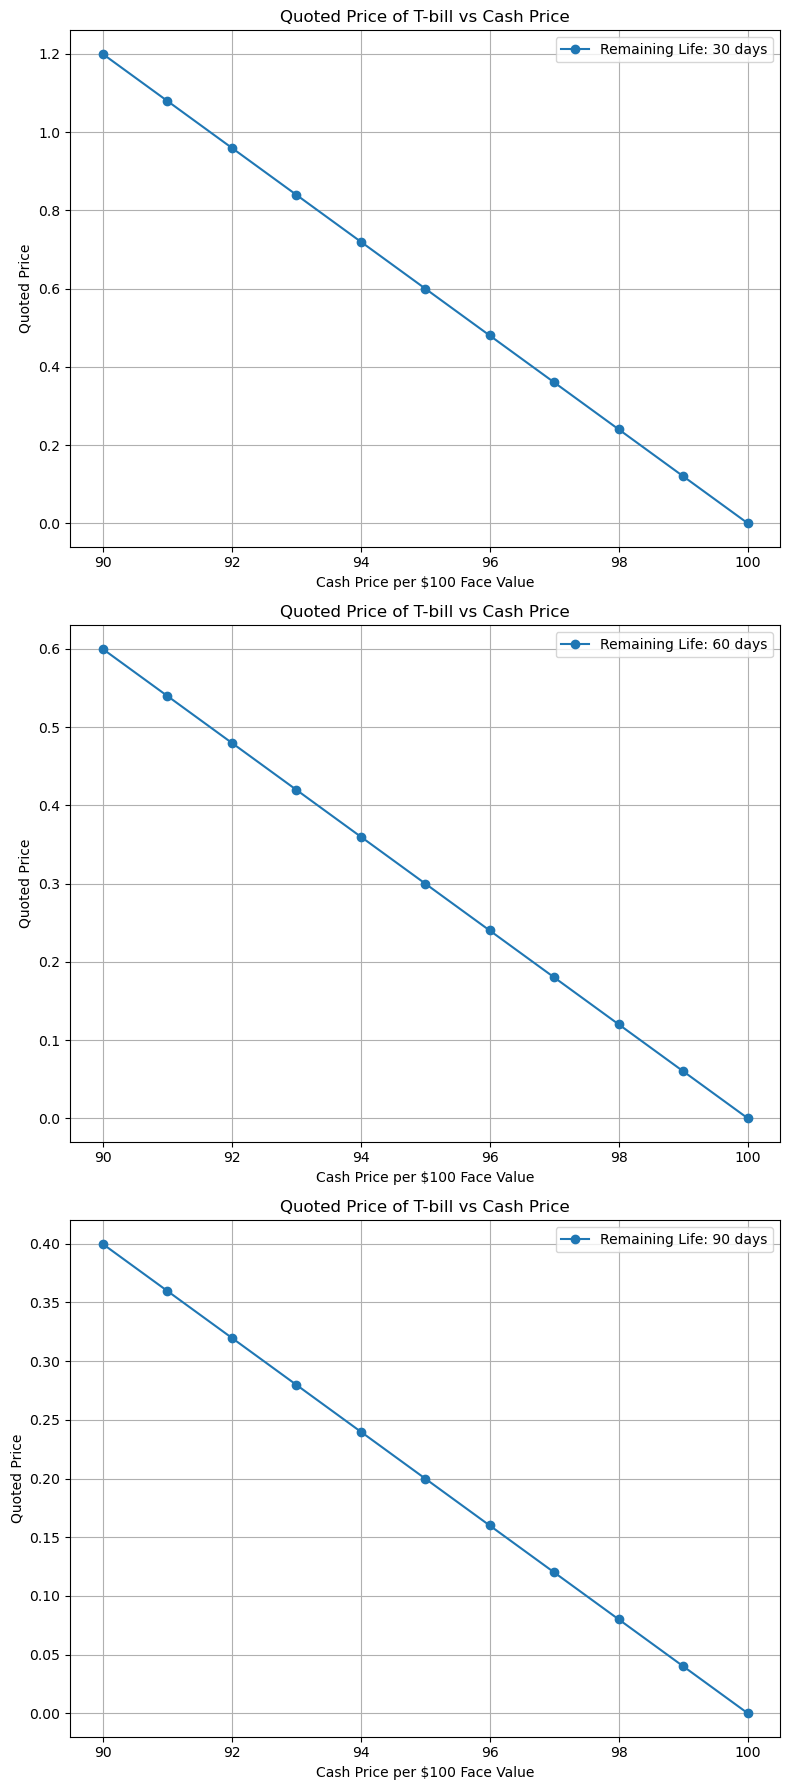

In [275]:
# Function to calculate the quoted price of a T-bill
def calculate_quoted_price(notional, cash_price, remaining_life):
    return 360 / (remaining_life * 100) * (notional - cash_price)

# Function to visualize the relationship between cash price and quoted price of a T-bill
def plot_tbill_quotes(notional, cash_price_range, remaining_life_values):
    # Create a grid of subplots
    fig, axes = plt.subplots(len(remaining_life_values), 1, figsize=(8, 6 * len(remaining_life_values)))

    # Iterate over remaining life values and plot the relationship
    for i, remaining_life in enumerate(remaining_life_values):
        quoted_prices = [calculate_quoted_price(notional, cash_price, remaining_life) for cash_price in cash_price_range]

        # Plot the relationship
        axes[i].plot(cash_price_range, quoted_prices, label=f'Remaining Life: {remaining_life} days', marker='o')
        axes[i].legend()
        axes[i].set_title('Quoted Price of T-bill vs Cash Price')
        axes[i].set_xlabel('Cash Price per $100 Face Value')
        axes[i].set_ylabel('Quoted Price')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

# Set fixed values for notional, cash price range, and remaining life values
notional = 100  # Face value of T-bill
cash_price_range = np.arange(90, 101, 1)  # Adjust the cash price range as needed
remaining_life_values = [30, 60, 90]  # Adjust the remaining life values as needed

# Display the interactive plot for T-bill quotes
plot_tbill_quotes(notional, cash_price_range, remaining_life_values)

### Treasury Bond Quotes 

In the US Treasury bonds are quoted in thirty-seconds of a dollar. To calculate this, the numerator will be the figure on the left of the quote, the denominator is always 32. 

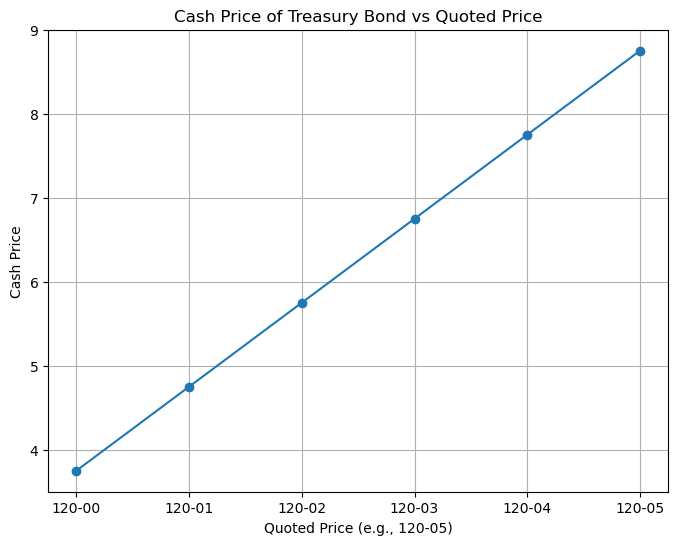

In [276]:
# Function to calculate the cash price of a Treasury bond
def calculate_cash_price(quote):
    numerator, denominator = map(int, quote.split('-'))
    return (numerator / 32) + denominator

# Function to visualize the relationship between quoted price and cash price of Treasury bonds
def plot_treasury_bond_quotes(quote_range):
    # Calculate cash prices for the given range of quotes
    cash_prices = [calculate_cash_price(quote) for quote in quote_range]

    # Plot the relationship
    plt.figure(figsize=(8, 6))
    plt.plot(quote_range, cash_prices, marker='o')
    plt.title('Cash Price of Treasury Bond vs Quoted Price')
    plt.xlabel('Quoted Price (e.g., 120-05)')
    plt.ylabel('Cash Price')
    plt.grid(True)
    plt.show()

# Generate a range of Treasury bond quotes for plotting
quote_range = ['120-00', '120-01', '120-02', '120-03', '120-04', '120-05']

# Display the interactive plot for Treasury bond quotes
plot_treasury_bond_quotes(quote_range)


### Treasury Bond Futures Quotes

Treasury bond and Treasury note futures contracts are quoted in dollars and thirty-seconds of a dollar. The settlement price of 10-year Treasury note futures contracts are quoted to the nearest half of a thirty-second, and 5-year and 2-year Treasury note Futures contracts are quoted to the nearest quarter of a thirty-second. 

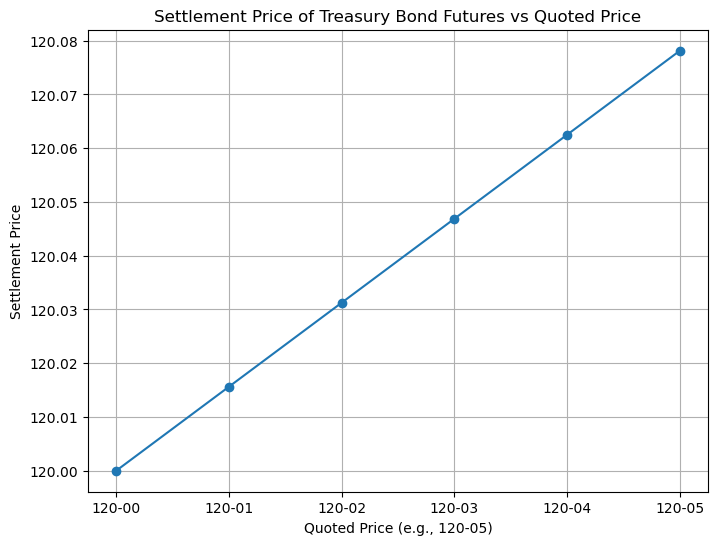

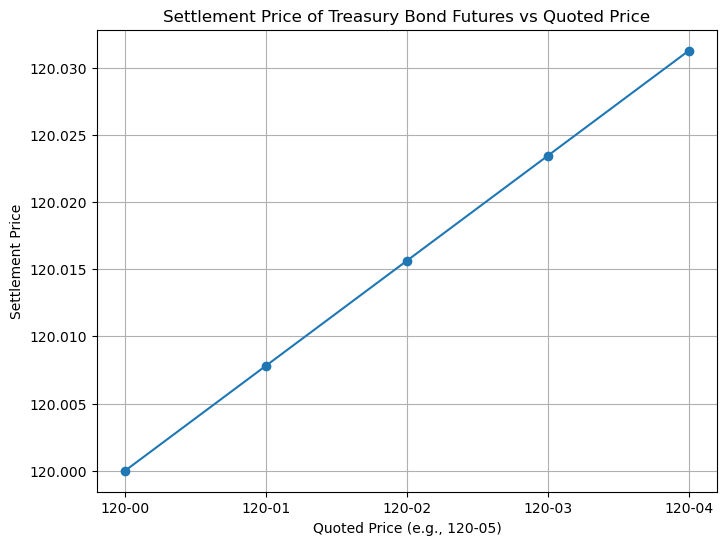

In [277]:
# Function to calculate the settlement price of Treasury bond futures
def calculate_settlement_price(quote, precision):
    numerator, denominator = map(int, quote.split('-'))
    return numerator + (denominator / (32 * precision))

# Function to visualize the relationship between quoted price and settlement price of Treasury bond futures
def plot_treasury_bond_futures_quotes(quote_range, precision):
    # Calculate settlement prices for the given range of quotes
    settlement_prices = [calculate_settlement_price(quote, precision) for quote in quote_range]

    # Plot the relationship
    plt.figure(figsize=(8, 6))
    plt.plot(quote_range, settlement_prices, marker='o')
    plt.title('Settlement Price of Treasury Bond Futures vs Quoted Price')
    plt.xlabel('Quoted Price (e.g., 120-05)')
    plt.ylabel('Settlement Price')
    plt.grid(True)
    plt.show()

# Generate a range of Treasury bond futures quotes for plotting
quote_range_10_year = ['120-00', '120-01', '120-02', '120-03', '120-04', '120-05']
quote_range_5_year_2_year = ['120-00', '120-01', '120-02', '120-03', '120-04']

# Set precision for 5-year and 2-year Treasury note futures
precision_5_year_2_year = 4

# Display the interactive plot for Treasury bond futures quotes
plot_treasury_bond_futures_quotes(quote_range_10_year, 2)
plot_treasury_bond_futures_quotes(quote_range_5_year_2_year, precision_5_year_2_year)

### Conversion Factors

Treasury Bond futures contracts allow the short party to choose to deliver any bond with a maturity within 15 to 25 years, when a particular bond is delivered, a parameter known as its conversion factor defines the price received for the bond by the party with the short position. This can be defined as the most recent settlement price, multiplied by the conversion factor, plus accrued interest. The conversion factor for a bond is set equal to the quoted price the bond would have per dollar of principal on the first day of the delivery month, assuming the rate for all maturities equals 6% per annum (semiannual).  

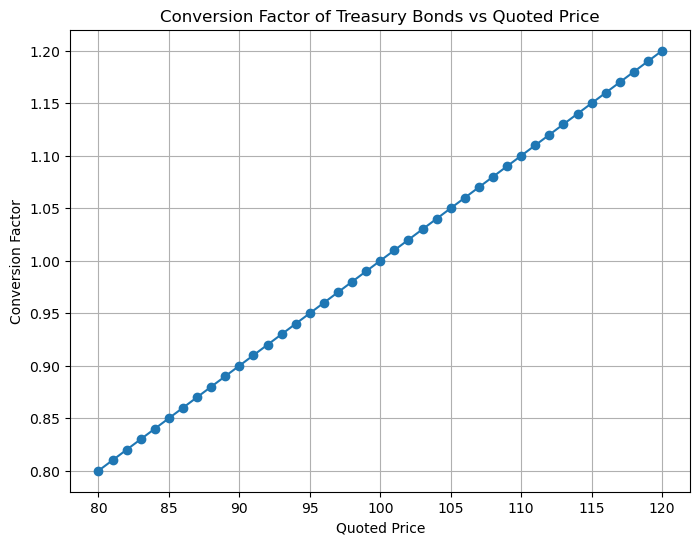

In [278]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the conversion factor of a Treasury bond
def calculate_conversion_factor(quoted_price):
    return quoted_price / 100

# Function to visualize the relationship between quoted price and conversion factor of Treasury bonds
def plot_conversion_factors(quoted_price_range):
    # Calculate conversion factors for the given range of quoted prices
    conversion_factors = [calculate_conversion_factor(quoted_price) for quoted_price in quoted_price_range]

    # Plot the relationship
    plt.figure(figsize=(8, 6))
    plt.plot(quoted_price_range, conversion_factors, marker='o')
    plt.title('Conversion Factor of Treasury Bonds vs Quoted Price')
    plt.xlabel('Quoted Price')
    plt.ylabel('Conversion Factor')
    plt.grid(True)
    plt.show()

# Generate a range of quoted prices for plotting
quoted_price_range = np.arange(80, 121, 1)

# Display the interactive plot for conversion factors
plot_conversion_factors(quoted_price_range)

### Cheapest to Deliver Bond

The cheapest to deliver bond is the one for which, the quoted bond price, minus the most recent settlement multiplied by the conversion factor, is the least. A number of factors determine the cheapest to deliver bond, when bond yields above or below 6%, maturity, the current slope of the yield curve. 

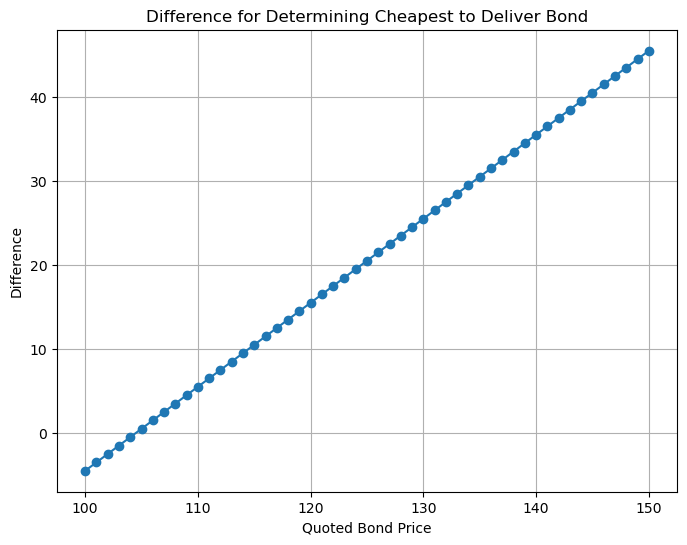

In [279]:
# Function to calculate the difference for determining the cheapest to deliver bond
def calculate_difference(quoted_price, most_recent_settlement, conversion_factor):
    return quoted_price - (most_recent_settlement * conversion_factor)

# Function to visualize the relationship between quoted bond price and difference for determining the cheapest to deliver bond
def plot_cheapest_to_deliver(quoted_price_range, most_recent_settlement, conversion_factor):
    # Calculate differences for the given range of quoted bond prices
    differences = [calculate_difference(quoted_price, most_recent_settlement, conversion_factor) for quoted_price in quoted_price_range]

    # Plot the relationship
    plt.figure(figsize=(8, 6))
    plt.plot(quoted_price_range, differences, marker='o')
    plt.title('Difference for Determining Cheapest to Deliver Bond')
    plt.xlabel('Quoted Bond Price')
    plt.ylabel('Difference')
    plt.grid(True)
    plt.show()

# Set fixed values for most recent settlement and conversion factor
most_recent_settlement = 110
conversion_factor = 0.95  # Adjust the conversion factor as needed

# Generate a range of quoted bond prices for plotting
quoted_price_range = np.arange(100, 151, 1)

# Display the interactive plot for determining the cheapest to deliver bond
plot_cheapest_to_deliver(quoted_price_range, most_recent_settlement, conversion_factor)

### Determining the Interest Rate Futures Price 

Assuming the cheapest to deliver bond and delivery date are known, the Treasury bond futures contract is a futures contract on a traded security providing known income. we can then assume that the futures price is equal to the asset price, minus the PV of coupons during the life of the contract, multiplied by e, to the power of the risk free rate, multiplied by the time to maturity on the contract.

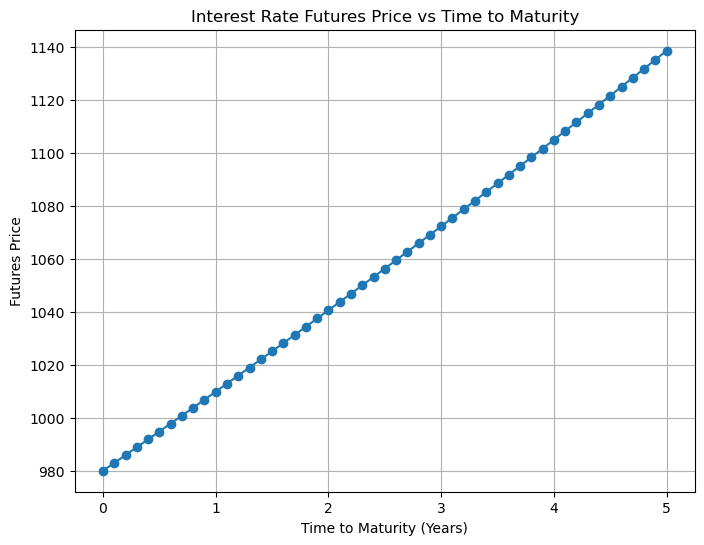

In [280]:
# Function to calculate the interest rate futures price
def calculate_futures_price(asset_price, known_income, risk_free_rate, time_to_maturity):
    return (asset_price - known_income) * np.exp(risk_free_rate * time_to_maturity)

# Function to visualize the relationship between interest rate futures price and time to maturity
def plot_interest_rate_futures_price(asset_price, known_income, risk_free_rate, time_to_maturity_range):
    # Calculate futures prices for the given range of time to maturity
    futures_prices = [calculate_futures_price(asset_price, known_income, risk_free_rate, ttm) for ttm in time_to_maturity_range]

    # Plot the relationship
    plt.figure(figsize=(8, 6))
    plt.plot(time_to_maturity_range, futures_prices, marker='o')
    plt.title('Interest Rate Futures Price vs Time to Maturity')
    plt.xlabel('Time to Maturity (Years)')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Set fixed values for asset price, known income, risk-free rate, and time to maturity range
asset_price = 1000
known_income = 20
risk_free_rate = 0.03
time_to_maturity_range = np.arange(0, 5.1, 0.1)

# Display the interactive plot for interest rate futures price
plot_interest_rate_futures_price(asset_price, known_income, risk_free_rate, time_to_maturity_range)

### Eurodollar Futures

A Eurodollar is a dollar deposited in a US or foreign bank outside the US. The Eurodollar interest rate is the rate of interest earned on Eurodollars deposited by the bank with another bank. Eurodollar futures allow traders to speculate $1m on the interest rate for a 3-month period or hedge an exposure to that same rate/period. Eurodollar futures have a fixed DV01 of $25, positions are marked to market. Other similar products include Euribor contracts and Euroswiss futures. 

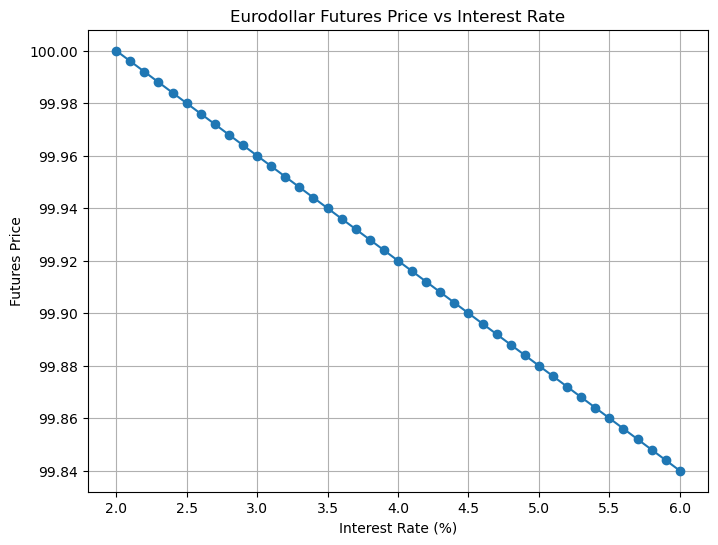

In [281]:
# Function to calculate Eurodollar futures price
def calculate_eurodollar_futures_price(interest_rate, notional, dv01):
    return 100 - ((interest_rate - 2) / dv01) * (notional / 1_000_000)

# Function to visualize the relationship between Eurodollar futures price and interest rate
def plot_eurodollar_futures_price(interest_rate_range, notional, dv01):
    # Calculate Eurodollar futures prices for the given range of interest rates
    futures_prices = [calculate_eurodollar_futures_price(rate, notional, dv01) for rate in interest_rate_range]

    # Plot the relationship
    plt.figure(figsize=(8, 6))
    plt.plot(interest_rate_range, futures_prices, marker='o')
    plt.title('Eurodollar Futures Price vs Interest Rate')
    plt.xlabel('Interest Rate (%)')
    plt.ylabel('Futures Price')
    plt.grid(True)
    plt.show()

# Set fixed values for notional and DV01
notional = 1_000_000
dv01 = 25

# Generate a range of interest rates for plotting
interest_rate_range = np.arange(2, 6.1, 0.1)

# Display the interactive plot for Eurodollar futures price
plot_eurodollar_futures_price(interest_rate_range, notional, dv01)

### Forward vs Furfures Interest Rates 

For short maturities, the Eurodollar futures interest rate can be assumed to be the same as the corresponding forward rate. For longer dated contracts, in futures, daily settlement reflects the realized interest rate for the period between dates.  The two differences between a Eurodollar futures contract and a FRA can be summarized as below:
FRAs are not settled daily, this is a hypothetical forward contract where the payoff equal to the difference between the forward interest rate and the realized interest rate is paid at time T1.
The difference between the hypothetical forward contract where there is settlement at time T1 and a true forward contract where there is settlement at time T2 equal to the difference between the forward interest rate and the realized interest rate. 

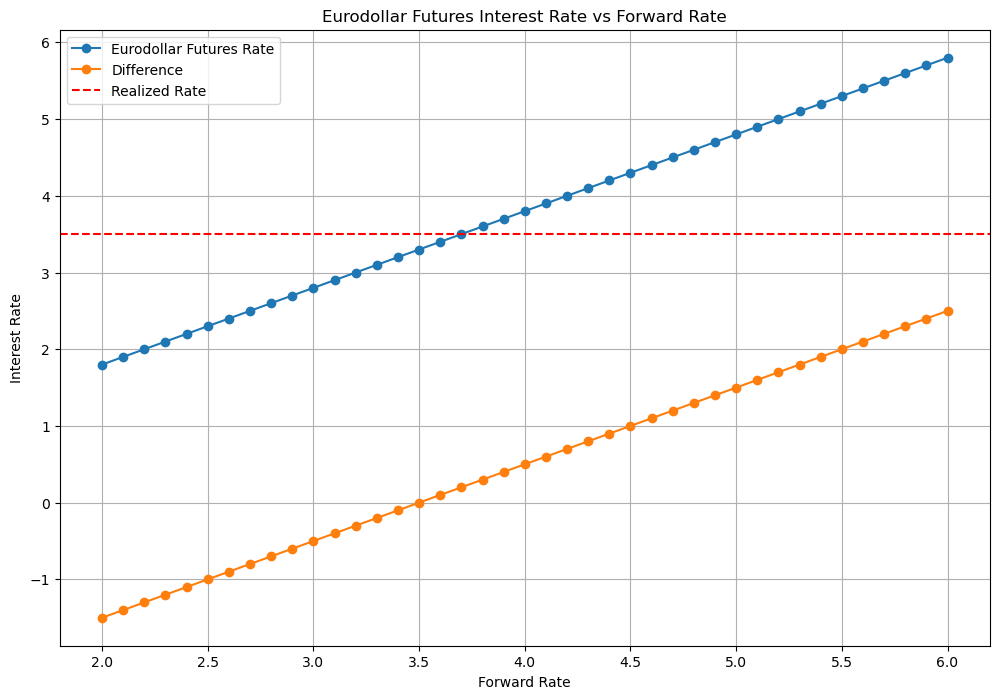

In [282]:
# Function to calculate Eurodollar futures interest rate
def calculate_eurodollar_futures_interest_rate(forward_rate, difference):
    return forward_rate - difference

# Function to calculate the difference between hypothetical forward and true forward contracts
def calculate_difference(forward_rate, realized_rate):
    return forward_rate - realized_rate

# Function to visualize the relationship between Eurodollar futures interest rate, forward rate, and differences
def plot_interest_rates(forward_rate_range, realized_rate, difference):
    # Calculate Eurodollar futures interest rates for the given range of forward rates
    eurodollar_futures_rates = [calculate_eurodollar_futures_interest_rate(rate, difference) for rate in forward_rate_range]

    # Calculate differences between hypothetical forward and true forward contracts
    differences = [calculate_difference(rate, realized_rate) for rate in forward_rate_range]

    # Plot the relationships
    plt.figure(figsize=(12, 8))
    plt.plot(forward_rate_range, eurodollar_futures_rates, label='Eurodollar Futures Rate', marker='o')
    plt.plot(forward_rate_range, differences, label='Difference', marker='o')
    plt.axhline(y=realized_rate, color='r', linestyle='--', label='Realized Rate')
    plt.title('Eurodollar Futures Interest Rate vs Forward Rate')
    plt.xlabel('Forward Rate')
    plt.ylabel('Interest Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for realized rate and difference
realized_rate = 3.5
difference = 0.2

# Generate a range of forward rates for plotting
forward_rate_range = np.arange(2, 6.1, 0.1)

# Display the interactive plot for Eurodollar futures interest rate, forward rate, and differences
plot_interest_rates(forward_rate_range, realized_rate, difference)

### Convexity Adjustment

To account for the total difference between the two rates, a convexity adjustment is used, this can be summarized as the forward rate is equal to the futures rate, one half the standard deviation of the change in the short term interest rate in 1 year, to the power of 2; multiplied by the time to maturity of the futures contract; multiplied by the time to maturity of the rate underlying the futures contract. 

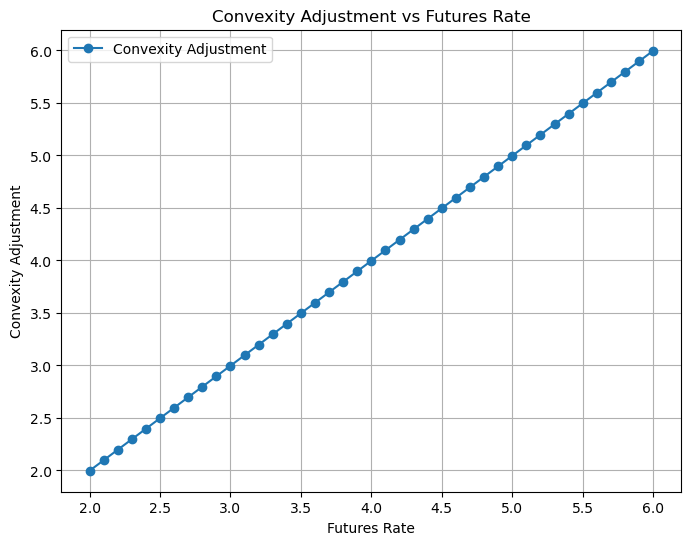

In [283]:
# Function to calculate convexity adjustment
def calculate_convexity_adjustment(futures_rate, standard_deviation, time_to_maturity_futures, time_to_maturity_rate):
    return futures_rate - 0.5 * (standard_deviation ** 2) * time_to_maturity_futures * time_to_maturity_rate

# Function to visualize the relationship between forward rate, futures rate, and convexity adjustment
def plot_convexity_adjustment(futures_rate_range, standard_deviation, time_to_maturity_futures, time_to_maturity_rate):
    # Calculate convexity adjustments for the given range of futures rates
    convexity_adjustments = [
        calculate_convexity_adjustment(rate, standard_deviation, time_to_maturity_futures, time_to_maturity_rate)
        for rate in futures_rate_range
    ]

    # Plot the relationship
    plt.figure(figsize=(8, 6))
    plt.plot(futures_rate_range, convexity_adjustments, label='Convexity Adjustment', marker='o')
    plt.title('Convexity Adjustment vs Futures Rate')
    plt.xlabel('Futures Rate')
    plt.ylabel('Convexity Adjustment')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for standard deviation and time to maturity
standard_deviation = 0.1
time_to_maturity_futures = 0.5
time_to_maturity_rate = 1.0

# Generate a range of futures rates for plotting
futures_rate_range = np.arange(2, 6.1, 0.1)

# Display the interactive plot for convexity adjustment
plot_convexity_adjustment(futures_rate_range, standard_deviation, time_to_maturity_futures, time_to_maturity_rate)


### Using Eurodollar Futures to Extend the Libor Zero Curve 

The Libor Zero curve out to 1 year is determined by the 1 month, 3 month, 6 month and 12 month LIBOR rates. Once the convexity adjustment has been made, Eurodollar futures are often used to extent the zero curve. This enables a bootstrap procedure to be used to determine zero rates. 

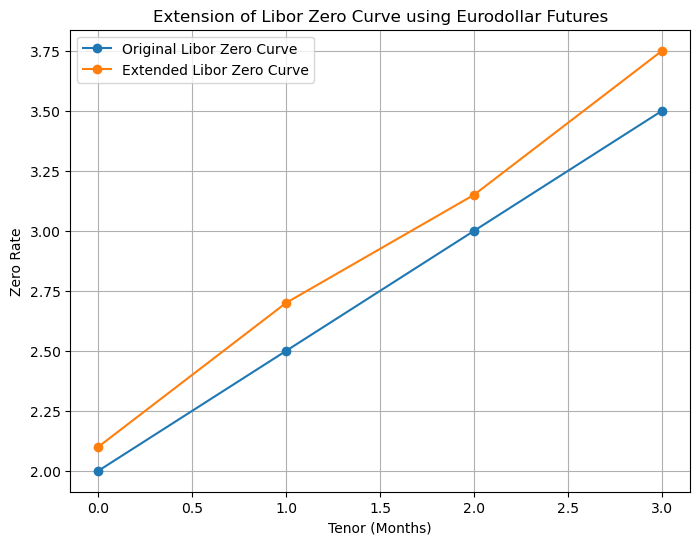

In [284]:
# Function to calculate extended Libor Zero Curve using Eurodollar Futures
def calculate_extended_libor_zero_curve(libor_rates, convexity_adjustments):
    return [libor_rate + convexity_adjustment for libor_rate, convexity_adjustment in zip(libor_rates, convexity_adjustments)]

# Function to visualize the extension of the Libor Zero Curve
def plot_libor_zero_curve(libor_rates, convexity_adjustments):
    # Calculate extended Libor Zero Curve
    extended_zero_curve = calculate_extended_libor_zero_curve(libor_rates, convexity_adjustments)

    # Plot the curves
    plt.figure(figsize=(8, 6))
    plt.plot(libor_rates, label='Original Libor Zero Curve', marker='o')
    plt.plot(extended_zero_curve, label='Extended Libor Zero Curve', marker='o')
    plt.title('Extension of Libor Zero Curve using Eurodollar Futures')
    plt.xlabel('Tenor (Months)')
    plt.ylabel('Zero Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for Libor rates and convexity adjustments
libor_rates = [2.0, 2.5, 3.0, 3.5]  # 1 month, 3 month, 6 month, 12 month
convexity_adjustments = [0.1, 0.2, 0.15, 0.25]

# Display the interactive plot for the extension of the Libor Zero Curve
plot_libor_zero_curve(libor_rates, convexity_adjustments)

### Duration Based Futures Hedging Strategies 

Interest rate futures can be used to hedge the yield on a bond portfolio at a future time. Assuming the change in forward yield is the same for all maturities, the number of contracts required to hedge against an uncertain change in the forward yield equals the forward value of the portfolio being hedged at the maturity of the hedge, multiplied by the duration of the portfolio at the maturity of the hedge, divided by the contract price for one interest rate futures contract, multiplied by the duration of the asset underlying the futures contract. This is the duration based hedge ratio, or price sensitivity hedge ratio. Interest rates and interest rate futures prices are inversely correlated; the hedger should choose the futures contract so that the duration of the underlying asset is as close as possible to the duration of the asset being hedged. The practice of matching the duration of assets and liabilities on a portfolio is known as duration matching or portfolio immunization, however this only accounts for small parallel shifts in the zero curve.

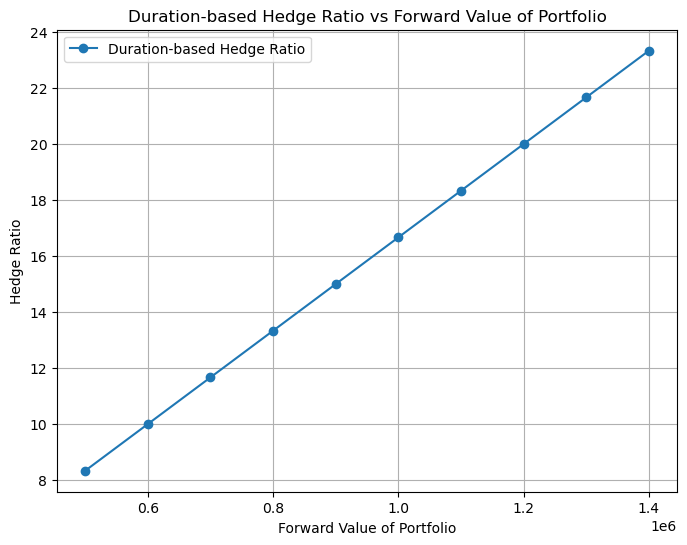

In [285]:
# Function to calculate duration-based hedge ratio
def calculate_duration_based_hedge_ratio(forward_value_portfolio, duration_portfolio, contract_price, duration_asset):
    return (forward_value_portfolio * duration_portfolio) / (contract_price * duration_asset)

# Function to visualize the duration-based hedge ratio
def plot_duration_based_hedge_ratio(forward_value_portfolio_range, duration_portfolio, contract_price, duration_asset):
    # Calculate duration-based hedge ratios for the given range of forward values
    hedge_ratios = [
        calculate_duration_based_hedge_ratio(value, duration_portfolio, contract_price, duration_asset)
        for value in forward_value_portfolio_range
    ]

    # Plot the relationship
    plt.figure(figsize=(8, 6))
    plt.plot(forward_value_portfolio_range, hedge_ratios, label='Duration-based Hedge Ratio', marker='o')
    plt.title('Duration-based Hedge Ratio vs Forward Value of Portfolio')
    plt.xlabel('Forward Value of Portfolio')
    plt.ylabel('Hedge Ratio')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for duration, contract price, and duration of the asset
duration_portfolio = 5
contract_price = 100000
duration_asset = 3

# Generate a range of forward values of the portfolio for plotting
forward_value_portfolio_range = np.arange(500000, 1500000, 100000)

# Display the interactive plot for duration-based hedge ratio
plot_duration_based_hedge_ratio(forward_value_portfolio_range, duration_portfolio, contract_price, duration_asset)

# Swaps

### Day Count Issues 

In general, a LIBOR based floating rate cash flow on a swap payment is calculated as principal, multiplied by the relevant LIBOR rate, multiplied by the number of days in the accrual period/360. The fixed rate paid is similarly quoted with a particular day count basis being specified. Usually quoted as actual/365 or 30/360. 

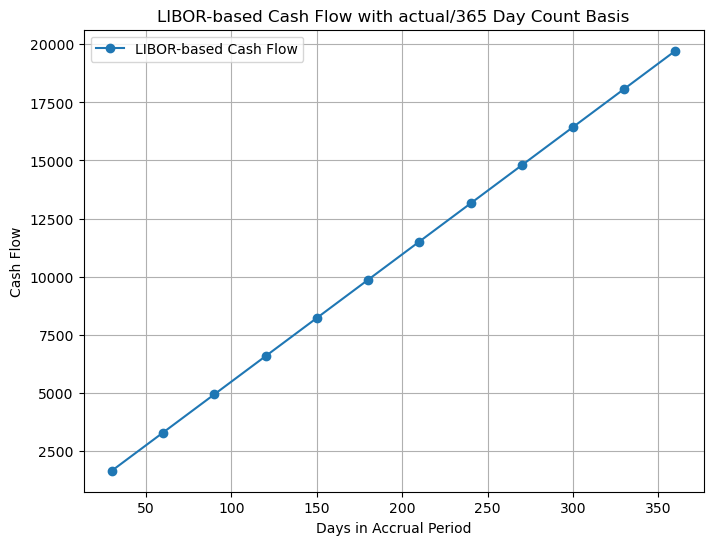

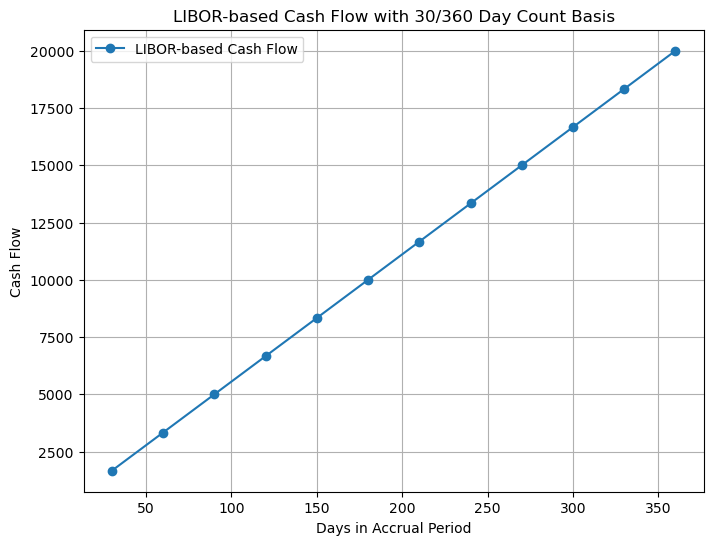

In [286]:
# Function to calculate LIBOR-based floating rate cash flow
def calculate_libor_cash_flow(principal, libor_rate, days_in_accrual_period, day_count_basis):
    if day_count_basis == 'actual/365':
        return principal * libor_rate * (days_in_accrual_period / 365)
    elif day_count_basis == '30/360':
        return principal * libor_rate * (days_in_accrual_period / 360)
    else:
        raise ValueError("Invalid day count basis")

# Function to visualize the LIBOR-based floating rate cash flow with different day count conventions
def plot_libor_cash_flow(principal, libor_rate, days_in_accrual_period_range, day_count_basis):
    # Calculate LIBOR-based cash flows for the given range of days in accrual period
    cash_flows = [
        calculate_libor_cash_flow(principal, libor_rate, days, day_count_basis)
        for days in days_in_accrual_period_range
    ]

    # Plot the cash flows
    plt.figure(figsize=(8, 6))
    plt.plot(days_in_accrual_period_range, cash_flows, label='LIBOR-based Cash Flow', marker='o')
    plt.title(f'LIBOR-based Cash Flow with {day_count_basis} Day Count Basis')
    plt.xlabel('Days in Accrual Period')
    plt.ylabel('Cash Flow')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for principal, LIBOR rate, and day count basis
principal = 1000000
libor_rate = 0.02
day_count_basis_actual_365 = 'actual/365'
day_count_basis_30_360 = '30/360'

# Generate a range of days in accrual period for plotting
days_in_accrual_period_range = np.arange(30, 361, 30)

# Display the interactive plot for LIBOR-based cash flow with actual/365 day count basis
plot_libor_cash_flow(principal, libor_rate, days_in_accrual_period_range, day_count_basis_actual_365)

# Display the interactive plot for LIBOR-based cash flow with 30/360 day count basis
plot_libor_cash_flow(principal, libor_rate, days_in_accrual_period_range, day_count_basis_30_360)

### Valuation of Interest Rate Swaps

An interest rate swap is essentially equal to a portfolio of FRAs at differing maturities, these can be valued by assuming that forward rates are realized. The procedure would work as follows;
Calculate forward rates for each of the LIBOR rates that will determine swap cash flows
Calculate the swap cash flows on the assumption that LIBOR rates will equal forward rates 
Discount the swap cash flows at the risk free rate 

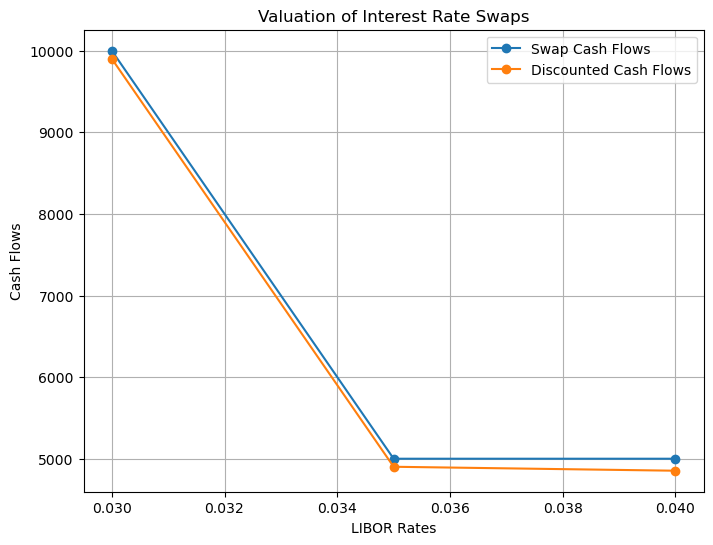

In [287]:
# Function to calculate forward rates
def calculate_forward_rates(libor_rates):
    return np.diff(libor_rates)

# Function to calculate swap cash flows
def calculate_swap_cash_flows(principal, forward_rates):
    return [principal * rate for rate in forward_rates]

# Function to discount swap cash flows at the risk-free rate
def discount_cash_flows(cash_flows, risk_free_rate):
    return [cash_flow / (1 + risk_free_rate) ** (i + 1) for i, cash_flow in enumerate(cash_flows)]

# Function to visualize the valuation of interest rate swaps
def plot_interest_rate_swap_valuation(libor_rates, principal, risk_free_rate):
    # Calculate forward rates
    forward_rates = calculate_forward_rates(libor_rates)

    # Calculate swap cash flows assuming LIBOR rates equal forward rates
    swap_cash_flows = calculate_swap_cash_flows(principal, forward_rates)

    # Discount swap cash flows at the risk-free rate
    discounted_cash_flows = discount_cash_flows(swap_cash_flows, risk_free_rate)

    # Plot the cash flows
    plt.figure(figsize=(8, 6))
    plt.plot(libor_rates[1:], swap_cash_flows, label='Swap Cash Flows', marker='o')
    plt.plot(libor_rates[1:], discounted_cash_flows, label='Discounted Cash Flows', marker='o')
    plt.title('Valuation of Interest Rate Swaps')
    plt.xlabel('LIBOR Rates')
    plt.ylabel('Cash Flows')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for LIBOR rates, principal, and risk-free rate
libor_rates = [0.02, 0.03, 0.035, 0.04]
principal = 1000000
risk_free_rate = 0.01

# Display the interactive plot for the valuation of interest rate swaps
plot_interest_rate_swap_valuation(libor_rates, principal, risk_free_rate)

### How Value Changes Through Time 

If the term structure of interest rates is upward sloping at swap inception, this means that the forward rates increase as the maturity of the FRA increases. If the term structure of interest rates is downward sloping, then the reverse is true. 

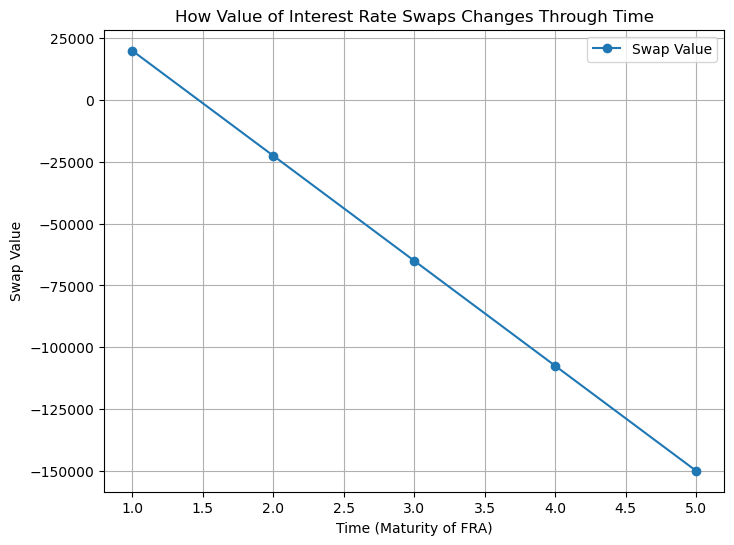

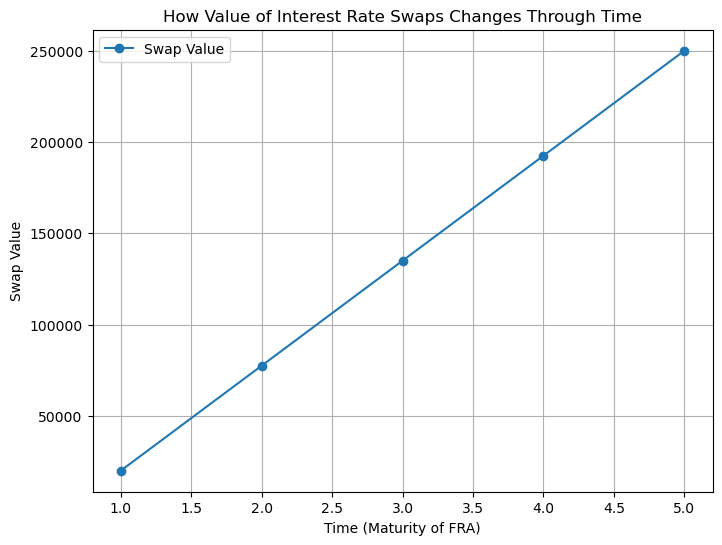

In [288]:
# Function to calculate the value of interest rate swaps through time
def calculate_swap_value(principal, forward_rates, term_structure_slope):
    return [principal * rate - term_structure_slope * i for i, rate in enumerate(forward_rates)]

# Function to visualize how the value of interest rate swaps changes through time
def plot_swap_value_through_time(principal, term_structure_slope):
    # Generate a range of forward rates
    forward_rates = np.linspace(0.02, 0.05, 5)

    # Calculate the value of interest rate swaps through time
    swap_values = calculate_swap_value(principal, forward_rates, term_structure_slope)

    # Plot the swap values
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(forward_rates) + 1), swap_values, label='Swap Value', marker='o')
    plt.title('How Value of Interest Rate Swaps Changes Through Time')
    plt.xlabel('Time (Maturity of FRA)')
    plt.ylabel('Swap Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for principal and term structure slope
principal = 1000000
term_structure_slope_upward = 50000
term_structure_slope_downward = -50000

# Display the interactive plot for the value of interest rate swaps with upward-sloping term structure
plot_swap_value_through_time(principal, term_structure_slope_upward)

# Display the interactive plot for the value of interest rate swaps with downward-sloping term structure
plot_swap_value_through_time(principal, term_structure_slope_downward)

### Fixed for Fixed CCY Swaps 

This involves exchanging principal and interest rate in one currency for principal and interest payments at a fixed rate in another currency. This requires the notional to be specified in each currency, these should match given the exchange rate at the swaps inception. Principal notional amounts are exchanged at the beginning and end of the swap with the profit or loss made on the interest gained on each currency.

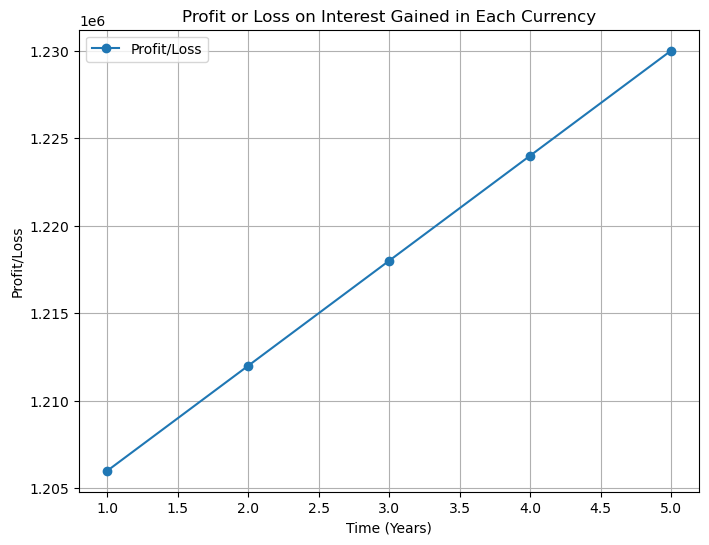

In [289]:
# Function to calculate the profit or loss on interest gained in each currency
def calculate_profit_loss(principal_notional, fixed_rate, exchange_rate, term):
    interest_gained = principal_notional * fixed_rate * term
    foreign_currency_value_at_inception = principal_notional * exchange_rate
    return (
        foreign_currency_value_at_inception * (1 + fixed_rate * term)
        - interest_gained
    )

# Function to visualize the profit or loss on interest gained in each currency
def plot_profit_loss(principal_notional, fixed_rate, exchange_rate, terms):
    profit_losses = [calculate_profit_loss(principal_notional, fixed_rate, exchange_rate, term) for term in terms]

    # Plot the profit or loss
    plt.figure(figsize=(8, 6))
    plt.plot(terms, profit_losses, label='Profit/Loss', marker='o')
    plt.title('Profit or Loss on Interest Gained in Each Currency')
    plt.xlabel('Time (Years)')
    plt.ylabel('Profit/Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for principal notional, fixed rate, exchange rate, and terms
principal_notional = 1000000
fixed_rate = 0.03
exchange_rate = 1.2
terms = np.arange(1, 6)  # Terms in years

# Display the interactive plot for the profit or loss on interest gained in each currency
plot_profit_loss(principal_notional, fixed_rate, exchange_rate, terms)

### Using CCY Swaps to Transform Assets and Liabilities

A company will choose to borrow in the market for which it has a comparative advantage on the interest paid, and swap for the desired currency at a more preferable rate of interest. This can be used to transform assets and liabilities to a company. 

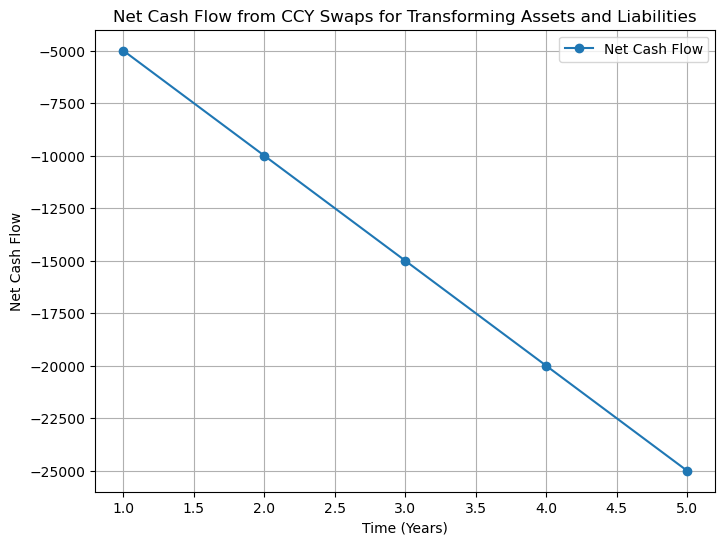

In [290]:
# Function to calculate the net cash flow from CCY swaps for transforming assets and liabilities
def calculate_net_cash_flow(principal_notional, interest_rate_source, interest_rate_target, exchange_rate, term):
    interest_paid_source = principal_notional * interest_rate_source * term
    interest_received_target = principal_notional * exchange_rate * interest_rate_target * term
    return interest_paid_source - interest_received_target

# Function to visualize the net cash flow from CCY swaps for transforming assets and liabilities
def plot_net_cash_flow(principal_notional, interest_rate_source, interest_rate_target, exchange_rate, terms):
    net_cash_flows = [calculate_net_cash_flow(principal_notional, interest_rate_source, interest_rate_target, exchange_rate, term) for term in terms]

    # Plot the net cash flow
    plt.figure(figsize=(8, 6))
    plt.plot(terms, net_cash_flows, label='Net Cash Flow', marker='o')
    plt.title('Net Cash Flow from CCY Swaps for Transforming Assets and Liabilities')
    plt.xlabel('Time (Years)')
    plt.ylabel('Net Cash Flow')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for principal notional, interest rates, exchange rate, and terms
principal_notional = 1000000
interest_rate_source = 0.04
interest_rate_target = 0.03
exchange_rate = 1.5
terms = np.arange(1, 6)  # Terms in years

# Display the interactive plot for the net cash flow from CCY swaps
plot_net_cash_flow(principal_notional, interest_rate_source, interest_rate_target, exchange_rate, terms)

### Valuation of Fixed for Fixed CCY swaps

Forward foreign exchange contracts can be valued by assuming that forward exchange rates are realized, a fixed for fixed currency swap can therefore be valued assuming that forward rates are realized. At inception, the value of the swap should be zero, if the two principal notional amounts are worth the same amount in their relative currencies, the first exchange should also net a zero value. For the individual forward contracts underlying the swap, the payer of the high interest rate currency will have negative cash flows in the early exchanges and the payer of the low interest rate currency will have positive cash flows in the early exchanges.

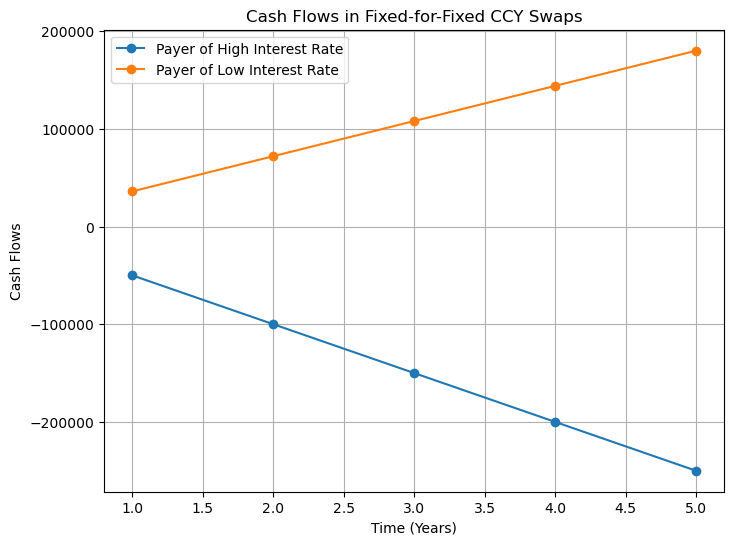

In [291]:
# Function to calculate the cash flows for payer of high and low-interest rate currencies in CCY swaps
def calculate_cash_flows(principal_notional, high_interest_rate, low_interest_rate, exchange_rate, terms):
    cash_flows_high_interest = [-principal_notional * high_interest_rate * term for term in terms]
    cash_flows_low_interest = [principal_notional * exchange_rate * low_interest_rate * term for term in terms]
    return cash_flows_high_interest, cash_flows_low_interest

# Function to visualize the cash flows for payer of high and low-interest rate currencies in CCY swaps
def plot_cash_flows(principal_notional, high_interest_rate, low_interest_rate, exchange_rate, terms):
    cash_flows_high_interest, cash_flows_low_interest = calculate_cash_flows(principal_notional, high_interest_rate, low_interest_rate, exchange_rate, terms)

    # Plot the cash flows
    plt.figure(figsize=(8, 6))
    plt.plot(terms, cash_flows_high_interest, label='Payer of High Interest Rate', marker='o')
    plt.plot(terms, cash_flows_low_interest, label='Payer of Low Interest Rate', marker='o')
    plt.title('Cash Flows in Fixed-for-Fixed CCY Swaps')
    plt.xlabel('Time (Years)')
    plt.ylabel('Cash Flows')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for principal notional, interest rates, exchange rate, and terms
principal_notional = 1000000
high_interest_rate = 0.05
low_interest_rate = 0.03
exchange_rate = 1.2
terms = np.arange(1, 6)  # Terms in years

# Display the interactive plot for cash flows in Fixed-for-Fixed CCY swaps
plot_cash_flows(principal_notional, high_interest_rate, low_interest_rate, exchange_rate, terms)

### Valuation in Terms of Bond Prices 

In terms of bond prices, the value of a swap can be defined as the value of the bond defined byy the domestic cash flows on the swap, minus the spot exchange rate multiplied by the value measured in the foreign currency of the bond defined by the foreign cash flows on the swap.

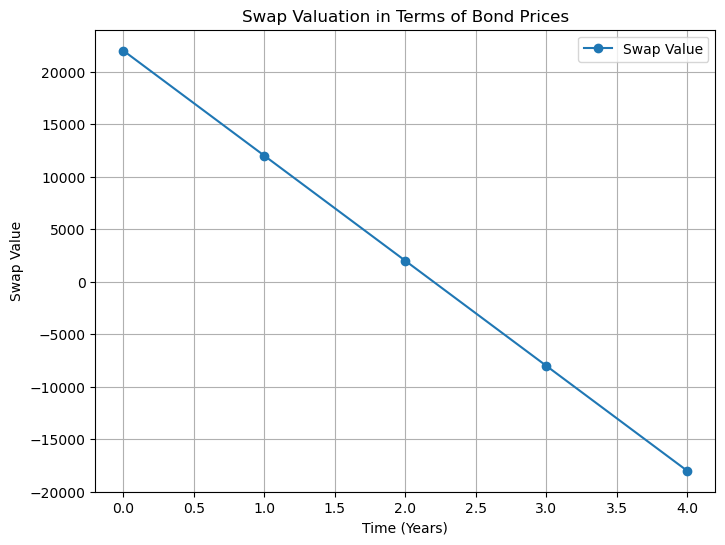

In [292]:
# Function to calculate the value of a swap in terms of bond prices
def calculate_swap_value(bond_domestic_cash_flows, spot_exchange_rate, bond_foreign_cash_flows):
    bond_domestic_price = np.cumsum(bond_domestic_cash_flows)
    bond_foreign_price = np.cumsum(bond_foreign_cash_flows)
    return bond_domestic_price - spot_exchange_rate * bond_foreign_price

# Function to visualize the value of a swap in terms of bond prices
def plot_swap_value(bond_domestic_cash_flows, spot_exchange_rate, bond_foreign_cash_flows):
    swap_value = calculate_swap_value(bond_domestic_cash_flows, spot_exchange_rate, bond_foreign_cash_flows)

    # Plot the swap value
    plt.figure(figsize=(8, 6))
    plt.plot(swap_value, label='Swap Value', marker='o')
    plt.title('Swap Valuation in Terms of Bond Prices')
    plt.xlabel('Time (Years)')
    plt.ylabel('Swap Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for bond cash flows, spot exchange rate, and terms
bond_domestic_cash_flows = np.array([-50000, 20000, 20000, 20000, 20000])
spot_exchange_rate = 1.2
bond_foreign_cash_flows = np.array([-60000, 25000, 25000, 25000, 25000])

# Display the interactive plot for swap valuation in terms of bond prices
plot_swap_value(bond_domestic_cash_flows, spot_exchange_rate, bond_foreign_cash_flows)

### Other Currency Swaps 

Two other popular currency swaps are:
Fixed for floating where a floating interest rate in one currency is exchanged for a fixed floating rate in another currency the value of the swap is the difference between the values of the two sets of payments using current exchange rates.
Floating for Floating where a floating interest rate in one currency is exchange for a floating interest rate in another currency, this can be valued by assuming that forward interest rates in each currency will be realized and discounting the cash flows at risk free rates. 

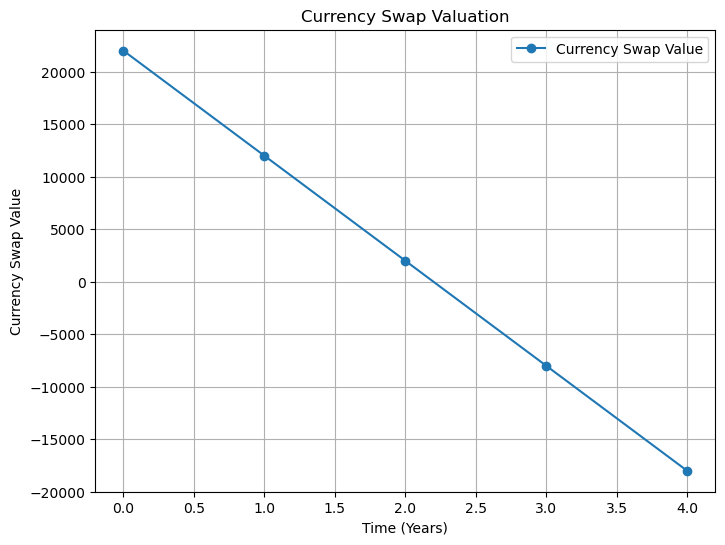

In [293]:
# Function to calculate the value of a currency swap
def calculate_currency_swap_value(fixed_cash_flows, floating_cash_flows, current_exchange_rate):
    fixed_value = np.cumsum(fixed_cash_flows)
    floating_value = np.cumsum(floating_cash_flows)
    return fixed_value - current_exchange_rate * floating_value

# Function to visualize the value of a currency swap
def plot_currency_swap_value(fixed_cash_flows, floating_cash_flows, current_exchange_rate):
    swap_value = calculate_currency_swap_value(fixed_cash_flows, floating_cash_flows, current_exchange_rate)

    # Plot the swap value
    plt.figure(figsize=(8, 6))
    plt.plot(swap_value, label='Currency Swap Value', marker='o')
    plt.title('Currency Swap Valuation')
    plt.xlabel('Time (Years)')
    plt.ylabel('Currency Swap Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for cash flows and current exchange rate
fixed_cash_flows = np.array([-50000, 20000, 20000, 20000, 20000])
floating_cash_flows = np.array([-60000, 25000, 25000, 25000, 25000])
current_exchange_rate = 1.2

# Display the interactive plot for currency swap valuation
plot_currency_swap_value(fixed_cash_flows, floating_cash_flows, current_exchange_rate)

### Quantos

When a rate observed in one currency is applied to a principal amount in another currency, this is referred to as a quanto. 

### Options 

An extendable swap is a form of swaption where one party has the option to extend the life of the swap beyond the specified period. A puttable swap is where one party has the option to terminate the swap early. 

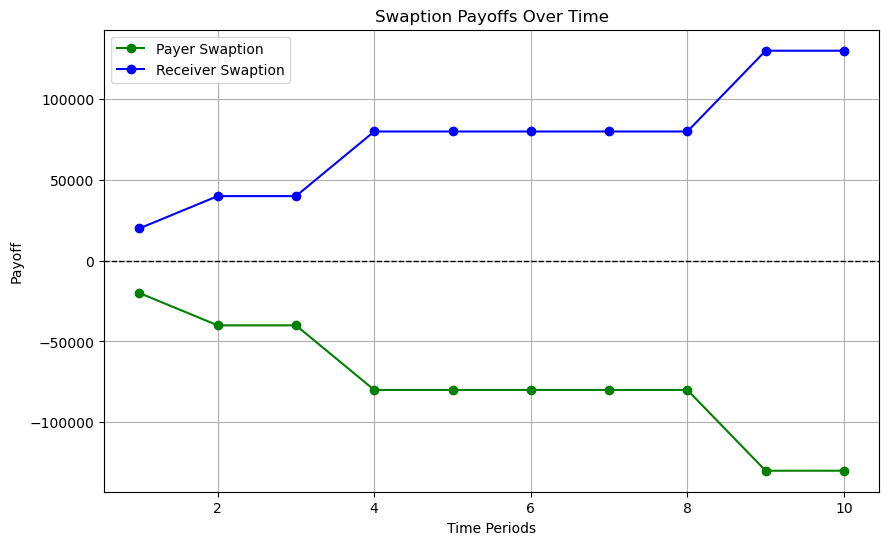

In [294]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the payoff for a payer swaption
def calculate_swaption_payoff(notional_amount, fixed_rate, floating_rate, option_values, premium, payer=True):
    swaption_payoffs = []
    total_payoff = -premium if payer else premium  # Include the premium paid at inception

    for option_value in option_values:
        swap_payoff = notional_amount * fixed_rate if option_value > 0 else 0
        total_payoff += swap_payoff - option_value
        swaption_payoffs.append(total_payoff)

    return swaption_payoffs

# Function to visualize the payoff for both payer and receiver swaptions
def plot_swaption_payoff(notional_amount, fixed_rate, floating_rate, option_values, premium):
    time_periods = np.arange(1, len(option_values) + 1)  # Start from time period 1

    payer_swaption_payoffs = calculate_swaption_payoff(notional_amount, fixed_rate, floating_rate, option_values, premium, payer=True)
    receiver_swaption_payoffs = [-payoff for payoff in payer_swaption_payoffs]  # Receiver payoff is the mirror opposite

    # Plot the payoff for both payer and receiver swaptions
    plt.figure(figsize=(10, 6))
    plt.plot(time_periods, payer_swaption_payoffs, label='Payer Swaption', marker='o', color='green')
    plt.plot(time_periods, receiver_swaption_payoffs, label='Receiver Swaption', marker='o', color='blue')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    plt.title('Swaption Payoffs Over Time')
    plt.xlabel('Time Periods')
    plt.ylabel('Payoff')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set fixed values for notional amount, fixed rate, floating rate, option values, and premium
notional_amount = 1000000
fixed_rate = 0.03
floating_rate = 0.025
option_values = [0, 50000, 0, 70000, 0, 30000, 0, 0, 80000, 0]  # Example option values over 10 time periods
premium = 20000  # Example premium paid at inception

# Display the interactive plot for both payer and receiver swaptions
plot_swaption_payoff(notional_amount, fixed_rate, floating_rate, option_values, premium)

### Volatility Swaps
In a volatility swap, there are a series of time periods, at the end of each period, one side pays a previously agreed volatility while the other side pays the historical volatility realized during the period, both are multiplied by the same notional principal. 

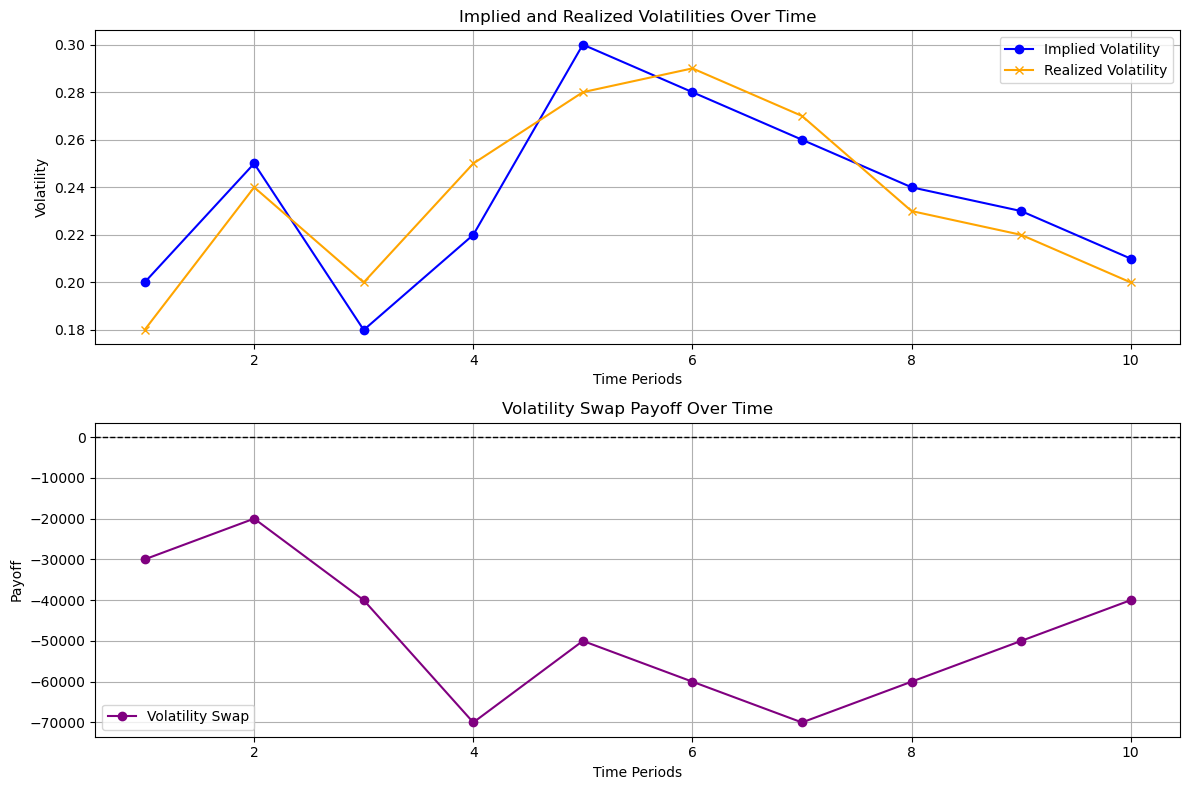

In [295]:
# Function to calculate the payoff for a volatility swap
def calculate_volatility_swap_payoff(notional_amount, implied_volatility, realized_volatility, premium):
    swap_payoffs = []
    total_payoff = -premium  # Include the premium paid at inception

    for i in range(len(implied_volatility)):
        implied_vol = implied_volatility[i]
        realized_vol = realized_volatility[i]

        # The payoff includes the difference between implied and realized volatility
        swap_payoff = notional_amount * (implied_vol - realized_vol)
        total_payoff += swap_payoff
        swap_payoffs.append(total_payoff)

    return swap_payoffs

# Function to visualize the payoff for a volatility swap and the time series of implied and realized volatilities
def plot_volatility_swap_and_series(notional_amount, implied_volatility, realized_volatility, premium):
    time_periods = np.arange(1, len(implied_volatility) + 1)  # Start from time period 1

    swap_payoffs = calculate_volatility_swap_payoff(notional_amount, implied_volatility, realized_volatility, premium)

    # Plot the time series of implied and realized volatilities
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(time_periods, implied_volatility, label='Implied Volatility', marker='o', color='blue')
    plt.plot(time_periods, realized_volatility, label='Realized Volatility', marker='x', color='orange')
    _extracted_from_plot_volatility_swap_and_series_11(
        'Implied and Realized Volatilities Over Time', 'Volatility'
    )
    # Plot the payoff for the volatility swap
    plt.subplot(2, 1, 2)
    plt.plot(time_periods, swap_payoffs, label='Volatility Swap', marker='o', color='purple')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    _extracted_from_plot_volatility_swap_and_series_11(
        'Volatility Swap Payoff Over Time', 'Payoff'
    )
    plt.tight_layout()
    plt.show()


# TODO Rename this here and in `plot_volatility_swap_and_series`
def _extracted_from_plot_volatility_swap_and_series_11(arg0, arg1):
    plt.title(arg0)
    plt.xlabel('Time Periods')
    plt.ylabel(arg1)
    plt.legend()
    plt.grid(True)

# Set fixed values for notional amount, implied and realized volatilities, and premium
notional_amount = 1000000
implied_volatility = [0.2, 0.25, 0.18, 0.22, 0.3, 0.28, 0.26, 0.24, 0.23, 0.21]  # Example implied volatilities
realized_volatility = [0.18, 0.24, 0.2, 0.25, 0.28, 0.29, 0.27, 0.23, 0.22, 0.20]  # Example realized volatilities
premium = 50000  # Example premium paid at inception

# Display the interactive plot for the volatility swap and series
plot_volatility_swap_and_series(notional_amount, implied_volatility, realized_volatility, premium)

# Options

### Writing Naked Options 

The amount of margin required, depends on the trader’s position. Margin required by the CBOE for naked call options is the greater of the two calculations below:
A total of 100% of the proceeds of the sale plus 20% of the underlying share price less the amount by which the option is out of the money.
A total of 100% of the option proceeds plus 10% of the underlying share price.
For writing a naked put position, it is the greater of the two below:
A total of 100% of the proceeds of the sale plus 20% of the underlying share price less the amount by which the option is out of the money.
A total of 100% of the option proceeds plus 10% of the exercise price. 
 A calculation similar to the initial margin calculation is repeated every day, funds can be withdrawn from the margin account when the margin deposited exceeds margin required. In the reverse situation, a margin call will be made.

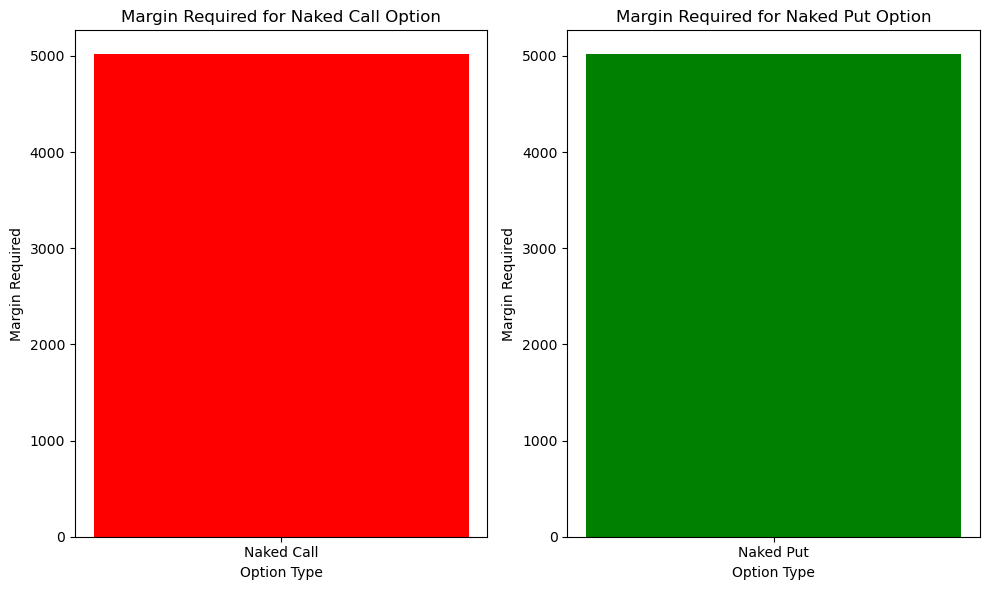

In [296]:
# Function to calculate the margin required for writing naked call options
def calculate_naked_call_margin(sale_proceeds, underlying_price, option_out_of_money):
    margin_1 = 1.0 * sale_proceeds + 0.2 * underlying_price - option_out_of_money
    margin_2 = 1.0 * sale_proceeds + 0.1 * underlying_price
    return max(margin_1, margin_2)

# Function to calculate the margin required for writing naked put options
def calculate_naked_put_margin(sale_proceeds, underlying_price, option_out_of_money, exercise_price):
    margin_1 = 1.0 * sale_proceeds + 0.2 * underlying_price - option_out_of_money
    margin_2 = 1.0 * sale_proceeds + 0.1 * exercise_price
    return max(margin_1, margin_2)

# Function to visualize the margin required for writing naked call and put options
def plot_naked_options_margin(sale_proceeds, underlying_price, option_out_of_money, exercise_price):
    margin_call = calculate_naked_call_margin(sale_proceeds, underlying_price, option_out_of_money)
    margin_put = calculate_naked_put_margin(sale_proceeds, underlying_price, option_out_of_money, exercise_price)

    # Plot the margin required for naked call and put options
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.bar(['Naked Call'], [margin_call], color='red')
    plt.title('Margin Required for Naked Call Option')
    plt.xlabel('Option Type')
    plt.ylabel('Margin Required')

    plt.subplot(1, 2, 2)
    plt.bar(['Naked Put'], [margin_put], color='green')
    plt.title('Margin Required for Naked Put Option')
    plt.xlabel('Option Type')
    plt.ylabel('Margin Required')

    plt.tight_layout()
    plt.show()

# Set fixed values for sale proceeds, underlying price, option out-of-the-money, and exercise price
sale_proceeds = 5000
underlying_price = 100
option_out_of_money = 5
exercise_price = 95

# Display the bar chart for naked call and put options margin
plot_naked_options_margin(sale_proceeds, underlying_price, option_out_of_money, exercise_price)

### Factors Affecting Option Prices 

### Upper Bounds

A call is the right to buy one share of a stock for a certain price, no matter what happens, the option can never be worth more than the stock, hence the stock price is the upper bound for a call:

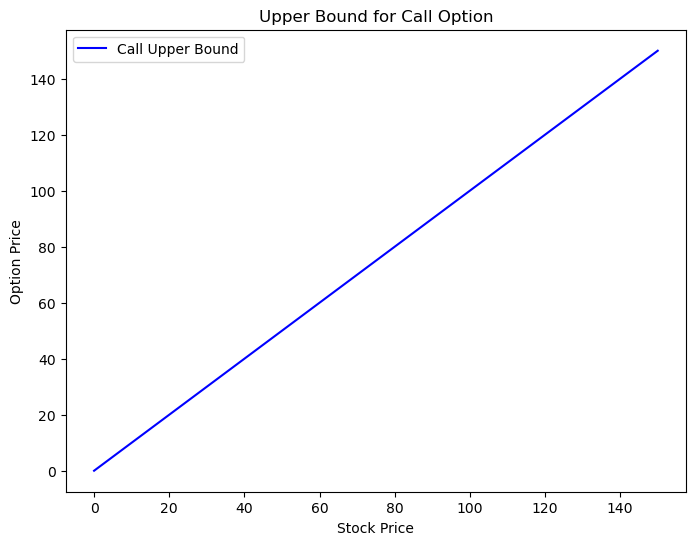

In [297]:
# Function to visualize the upper bounds for a call option
def plot_call_option_upper_bound(stock_price):
    call_upper_bound = np.minimum(stock_price, stock_price)  # Upper bound for a call option

    # Plot the upper bounds for a call option
    plt.figure(figsize=(8, 6))
    plt.plot(stock_price, call_upper_bound, label='Call Upper Bound', color='blue')
    plt.title('Upper Bound for Call Option')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Price')
    plt.legend()
    plt.show()

# Generate a range of stock prices for visualization
stock_prices = np.linspace(0, 150, 100)

# Display the plot for the upper bound of a call option
plot_call_option_upper_bound(stock_prices)

An American put gives the holder the right to sell one share of a stock for K, no matter how low the stock price is, the option can never be worth more than K:
Formula: P ≤ K

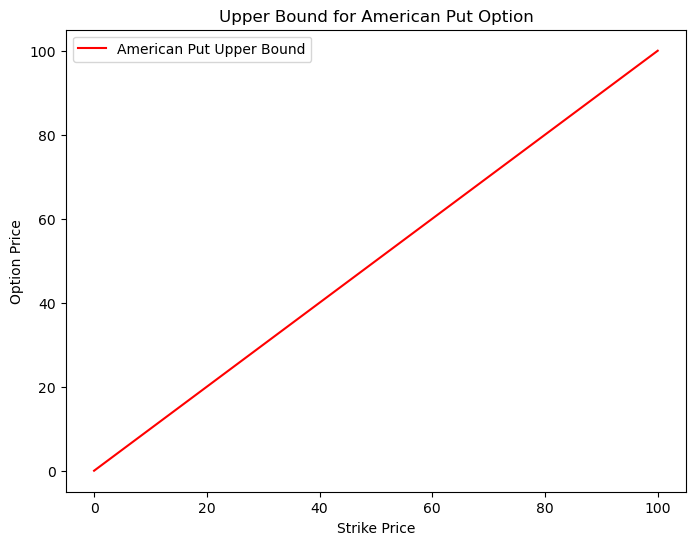

In [298]:
# Function to visualize the upper bounds for an American put option
def plot_american_put_option_upper_bound(strike_price):
    put_upper_bound = np.maximum(strike_price, strike_price)  # Upper bound for an American put option

    # Plot the upper bounds for an American put option
    plt.figure(figsize=(8, 6))
    plt.plot(strike_price, put_upper_bound, label='American Put Upper Bound', color='red')
    plt.title('Upper Bound for American Put Option')
    plt.xlabel('Strike Price')
    plt.ylabel('Option Price')
    plt.legend()
    plt.show()

# Generate a range of strike prices for visualization
strike_prices = np.linspace(0, 100, 100)

# Display the plot for the upper bound of an American put option
plot_american_put_option_upper_bound(strike_prices)

For European Options, we know that at maturity, the option cannot be worth more than K, it follows that it cannot be worth more than the present value of K today:
Formula: P ≤ Ke-rT

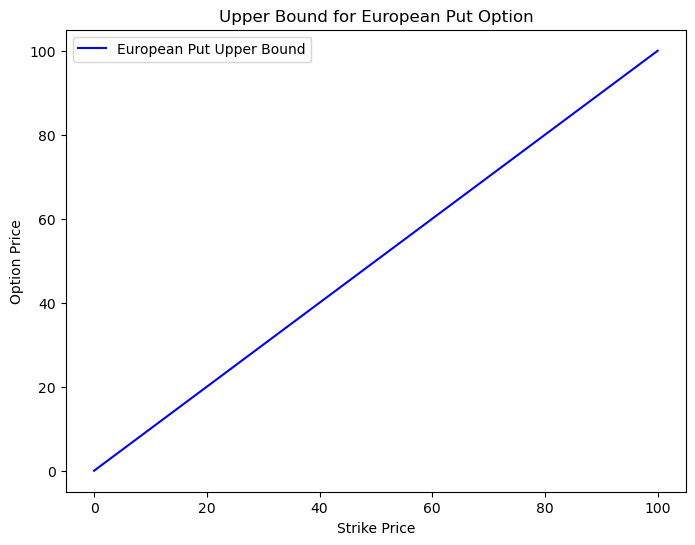

In [299]:
# Function to visualize the upper bounds for a European put option
def plot_european_put_option_upper_bound(strike_price, risk_free_rate, time_to_maturity):
    put_upper_bound = np.maximum(strike_price * np.exp(-risk_free_rate * time_to_maturity), strike_price)  # Upper bound for a European put option

    # Plot the upper bounds for a European put option
    plt.figure(figsize=(8, 6))
    plt.plot(strike_price, put_upper_bound, label='European Put Upper Bound', color='blue')
    plt.title('Upper Bound for European Put Option')
    plt.xlabel('Strike Price')
    plt.ylabel('Option Price')
    plt.legend()
    plt.show()

# Generate a range of strike prices for visualization
strike_prices = np.linspace(0, 100, 100)
risk_free_rate = 0.05  # Example risk-free rate
time_to_maturity = 1  # Example time to maturity

# Display the plot for the upper bound of a European put option
plot_european_put_option_upper_bound(strike_prices, risk_free_rate, time_to_maturity)


### Lower Bound for Calls on Non Dividend Paying Stocks 

A lower bound for the price of a European call option with a non-dividend paying stock is the stock price minus the present value of the strike price today:
Formula: So-Ke-rT

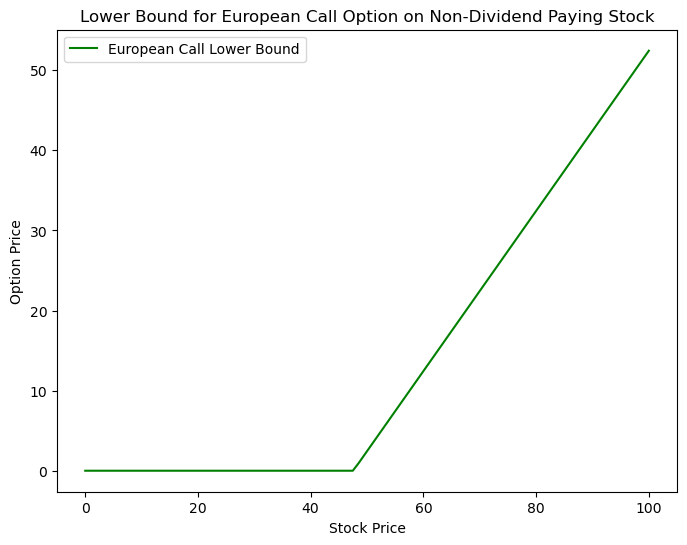

In [300]:
# Function to visualize the lower bounds for a European call option on a non-dividend paying stock
def plot_call_option_lower_bound(stock_price, strike_price, risk_free_rate, time_to_maturity):
    call_lower_bound = np.maximum(stock_price - strike_price * np.exp(-risk_free_rate * time_to_maturity), 0)  # Lower bound for a European call option

    # Plot the lower bounds for a European call option
    plt.figure(figsize=(8, 6))
    plt.plot(stock_price, call_lower_bound, label='European Call Lower Bound', color='green')
    plt.title('Lower Bound for European Call Option on Non-Dividend Paying Stock')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Price')
    plt.legend()
    plt.show()

# Generate a range of stock prices for visualization
stock_prices = np.linspace(0, 100, 100)
strike_price = 50  # Example strike price
risk_free_rate = 0.05  # Example risk-free rate
time_to_maturity = 1  # Example time to maturity

# Display the plot for the lower bound of a European call option on a non-dividend paying stock
plot_call_option_lower_bound(stock_prices, strike_price, risk_free_rate, time_to_maturity)

### Lower Bound for European Puts on Non-Dividend Paying Stocks 

For a European put option on a non-dividend paying stock, a lower bound for the price is the present value of the strike price today, minus the stock price:
Formula: Ke-rT- So

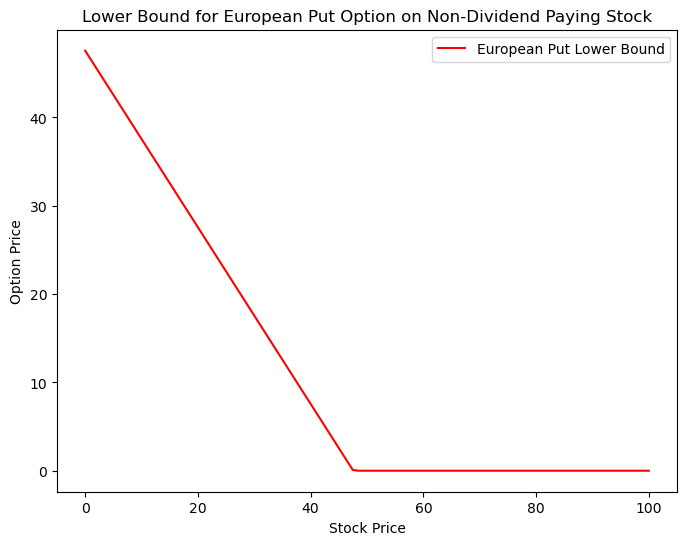

In [301]:
# Function to visualize the lower bounds for a European put option on a non-dividend paying stock
def plot_put_option_lower_bound(stock_price, strike_price, risk_free_rate, time_to_maturity):
    put_lower_bound = np.maximum(strike_price * np.exp(-risk_free_rate * time_to_maturity) - stock_price, 0)  # Lower bound for a European put option

    # Plot the lower bounds for a European put option
    plt.figure(figsize=(8, 6))
    plt.plot(stock_price, put_lower_bound, label='European Put Lower Bound', color='red')
    plt.title('Lower Bound for European Put Option on Non-Dividend Paying Stock')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Price')
    plt.legend()
    plt.show()

# Display the plot for the lower bound of a European put option on a non-dividend paying stock
plot_put_option_lower_bound(stock_prices, strike_price, risk_free_rate, time_to_maturity)

### Put-Call Parity 

The Put-Call parity theory argues that two portfolios consisting of European puts and calls of the same risk, strike price and time to maturity will both be of the same value, any difference in value would be exploited by an arbitrageur. 
Formula: c + Ke-rT = p + So

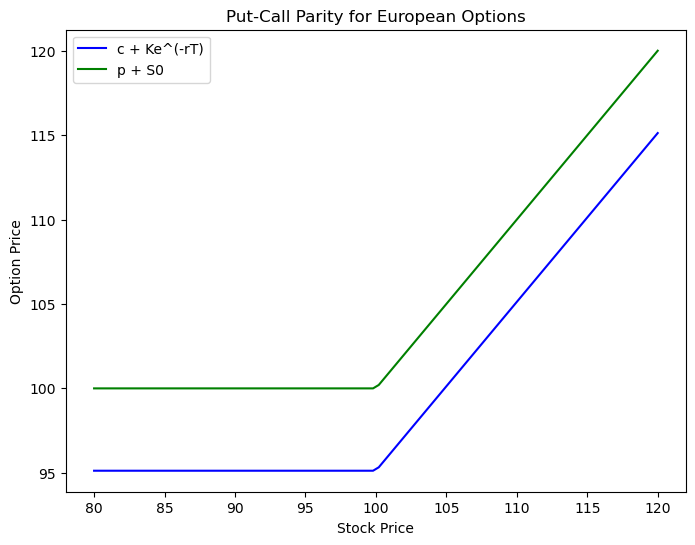

In [302]:
# Define the variables
stock_prices = np.linspace(80, 120, 100)
strike_price = 100
risk_free_rate = 0.05
time_to_maturity = 1
call_option_prices = np.maximum(stock_prices - strike_price, 0)
put_option_prices = np.maximum(strike_price - stock_prices, 0)

# Function to visualize the Put-Call Parity relationship for European options
def plot_put_call_parity(stock_price, strike_price, risk_free_rate, time_to_maturity, call_option_price, put_option_price):
    # Calculate the left-hand side and right-hand side of the Put-Call Parity equation
    lhs = call_option_price + strike_price * np.exp(-risk_free_rate * time_to_maturity)
    rhs = put_option_price + stock_price

    # Plot the Put-Call Parity relationship
    plt.figure(figsize=(8, 6))
    plt.plot(stock_price, lhs, label='c + Ke^(-rT)', color='blue')
    plt.plot(stock_price, rhs, label='p + S0', color='green')
    plt.title('Put-Call Parity for European Options')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Price')
    plt.legend()
    plt.show()

# Display the plot for the Put-Call Parity relationship for European options
plot_put_call_parity(stock_prices, strike_price, risk_free_rate, time_to_maturity, call_option_prices, put_option_prices)

### American Options

Put Call parity only works for European options, however it can be shown that when there are no dividends, the stock price, minus the strike price is less than or equal to the value of an American call minus the value of an American put is less than or equal to the stock price minus the present value of the strike price today. This provides us with the upper and lower bounds for an American call and put option. 

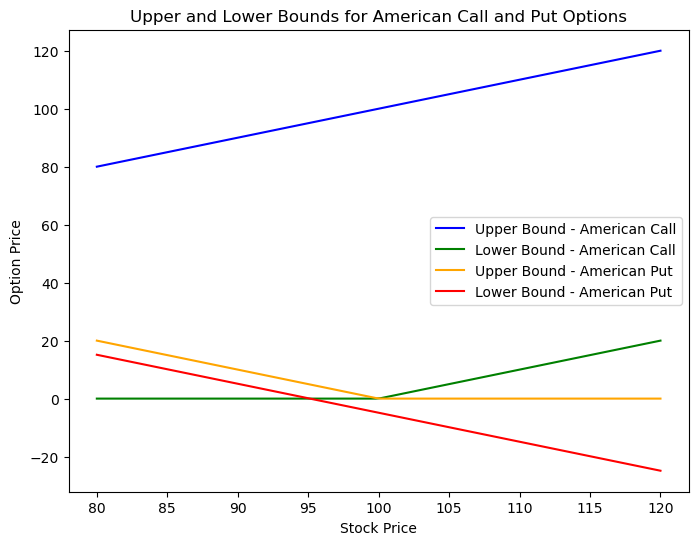

In [303]:
# Define the variables
stock_prices = np.linspace(80, 120, 100)
strike_price = 100
risk_free_rate = 0.05
time_to_maturity = 1

# Calculate the upper and lower bounds for American call and put options
upper_bound_call = stock_prices
lower_bound_call = np.maximum(stock_prices - strike_price, 0)

upper_bound_put = np.maximum(strike_price - stock_prices, 0)
lower_bound_put = strike_price * np.exp(-risk_free_rate * time_to_maturity) - stock_prices

# Plot the upper and lower bounds for American call and put options
plt.figure(figsize=(8, 6))
plt.plot(stock_prices, upper_bound_call, label='Upper Bound - American Call', color='blue')
plt.plot(stock_prices, lower_bound_call, label='Lower Bound - American Call', color='green')
plt.plot(stock_prices, upper_bound_put, label='Upper Bound - American Put', color='orange')
plt.plot(stock_prices, lower_bound_put, label='Lower Bound - American Put', color='red')

plt.title('Upper and Lower Bounds for American Call and Put Options')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.show()

### Calls on a Non Dividend Paying Stock 

It is never optimal to exercise an American call on a non-dividend paying stock prior to expiry for two reasons, one relates to the insurance the contract provides and the other concerns the time value of money. Because American call options are never exercised early when there are no dividends, they are equivalent to European call options.

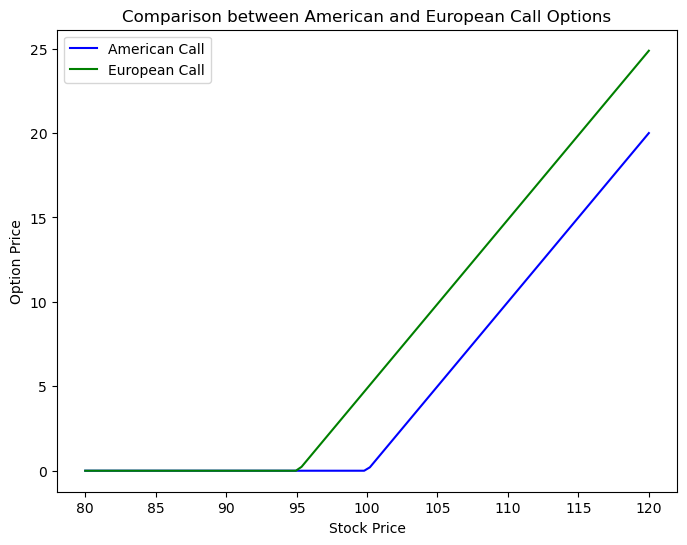

In [304]:
# Define the variables
stock_prices = np.linspace(80, 120, 100)
strike_price = 100
risk_free_rate = 0.05
time_to_maturity = 1

# Calculate the values for American and European call options
american_call = np.maximum(stock_prices - strike_price, 0)
european_call = np.maximum(stock_prices - strike_price * np.exp(-risk_free_rate * time_to_maturity), 0)

# Plot the values for American and European call options
plt.figure(figsize=(8, 6))
plt.plot(stock_prices, american_call, label='American Call', color='blue')
plt.plot(stock_prices, european_call, label='European Call', color='green')

plt.title('Comparison between American and European Call Options')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.show()

### Puts on a Non-Dividend Paying Stock 

At any given time during its life, an in the money put option on a non-dividend paying stock should always be exercised early. Like a call option, it can be used to provide insurance, however it differs in that it may be optimal to forgo insurance and exercise early due to the time value of money on the cash flow received. The exercise of a put option becomes more attractive as the stock price and volatility decreases and the risk free rate increases.

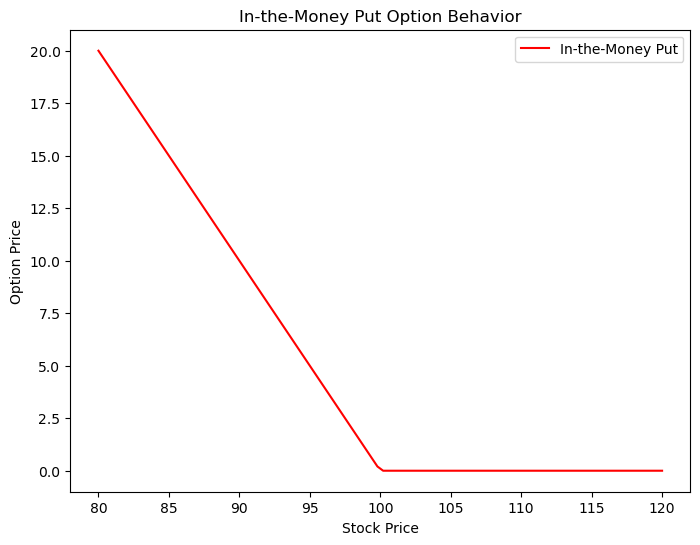

In [305]:
# Define the variables
stock_prices = np.linspace(80, 120, 100)
strike_price = 100
risk_free_rate = 0.05
time_to_maturity = 1

# Calculate the values for in-the-money put options
in_the_money_put = np.maximum(strike_price - stock_prices, 0)

# Plot the values for in-the-money put options
plt.figure(figsize=(8, 6))
plt.plot(stock_prices, in_the_money_put, label='In-the-Money Put', color='red')

plt.title('In-the-Money Put Option Behavior')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.show()

### Bounds 
Upper and Lower bounds for a European put option when there are no dividends are given by the maximum of the present value of the strike price today, minus the stock price and zero is less than or equal to the value of the European put option which is less than or equal to the present value of the strike price today. For an American put option on a non-dividend paying stock, the value of an American put option is greater than or equal to the maximum of the strike price minus the stock price and zero. Bounds for an American put option on a non-dividend paying stock are the maximum of the strike price minus the stock price and zero is less than or equal to the value of an American put option which is less than or equal to the strike price. Because there are instances where it is best to execute an American put option early, it follows that an American put option is always worth more than the corresponding European put option. 

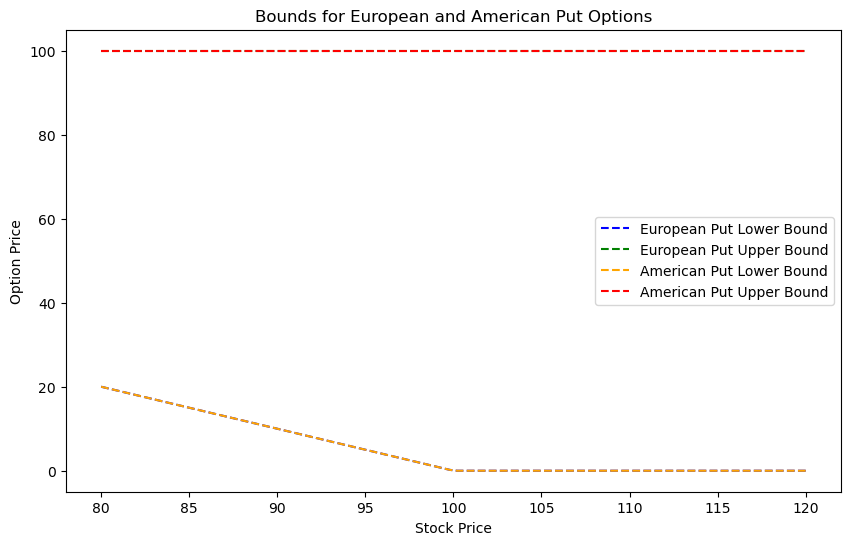

In [306]:
# Define the variables
stock_prices = np.linspace(80, 120, 100)
strike_price = 100
risk_free_rate = 0.05
time_to_maturity = 1

# Calculate the bounds for a European put option
european_put_lower_bound = np.maximum(strike_price - stock_prices, 0)
european_put_upper_bound = np.full_like(stock_prices, strike_price)

# Calculate the bounds for an American put option
american_put_lower_bound = np.maximum(strike_price - stock_prices, 0)
american_put_upper_bound = np.full_like(stock_prices, strike_price)

# Plot the bounds for European and American put options
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, european_put_lower_bound, label='European Put Lower Bound', linestyle='--', color='blue')
plt.plot(stock_prices, european_put_upper_bound, label='European Put Upper Bound', linestyle='--', color='green')
plt.plot(stock_prices, american_put_lower_bound, label='American Put Lower Bound', linestyle='--', color='orange')
plt.plot(stock_prices, american_put_upper_bound, label='American Put Upper Bound', linestyle='--', color='red')

plt.title('Bounds for European and American Put Options')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.show()

### Effect of Dividends 

With known dividends, the bound for European calls can be redefined as the value of the option is greater than or equal to the stock price, minus the present value of dividends, minus the present value of the strike price or zero. It follows that with known dividends, the bound for European puts can be redefined as the value of the option is greater than or equal to the present value of dividends, plus the present value of the strike price minus the stock price, or zero. When dividends are present, we can no longer assert that an American call option will not be exercised early. Sometimes it is optimal to exercise an American call immediately prior to an ex-dividend date. With dividends, the put call parity result can be amended to the value of a European call, plus dividends, plus the present value of the strike price is equal to the value of the European put plus the stock price.

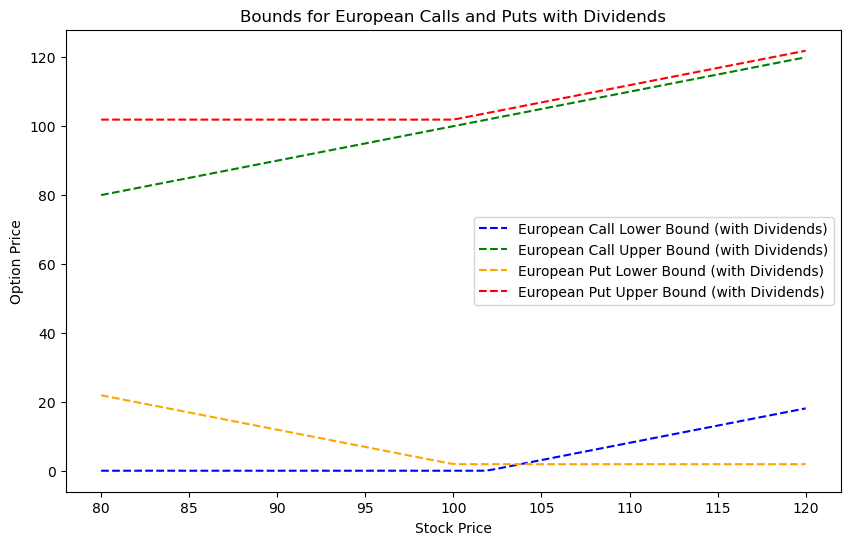

In [307]:
# Define the variables
stock_prices = np.linspace(80, 120, 100)
strike_price = 100
dividends = 2
risk_free_rate = 0.05
time_to_maturity = 1

# Calculate the bounds for a European call option with dividends
european_call_lower_bound = np.maximum(stock_prices - np.exp(-risk_free_rate * time_to_maturity) * dividends - strike_price, 0)
european_call_upper_bound = stock_prices

# Calculate the bounds for a European put option with dividends
european_put_lower_bound = np.maximum(np.exp(-risk_free_rate * time_to_maturity) * dividends + np.maximum(strike_price - stock_prices, 0), 0)
european_put_upper_bound = np.exp(-risk_free_rate * time_to_maturity) * dividends + np.maximum(strike_price - stock_prices, 0) + stock_prices

# Plot the bounds for European calls and puts with dividends
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, european_call_lower_bound, label='European Call Lower Bound (with Dividends)', linestyle='--', color='blue')
plt.plot(stock_prices, european_call_upper_bound, label='European Call Upper Bound (with Dividends)', linestyle='--', color='green')
plt.plot(stock_prices, european_put_lower_bound, label='European Put Lower Bound (with Dividends)', linestyle='--', color='orange')
plt.plot(stock_prices, european_put_upper_bound, label='European Put Upper Bound (with Dividends)', linestyle='--', color='red')

plt.title('Bounds for European Calls and Puts with Dividends')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.show()

# Options Strategies

### Principal Protected Notes 

Principal protected notes consist of a zero coupon bond and a European Call/Put on an underlying asset. The present value of the funds invested are used invested at the risk free rate to recuperate the face value at maturity. The difference is invested in the option; this way principal is almost never at risk. 

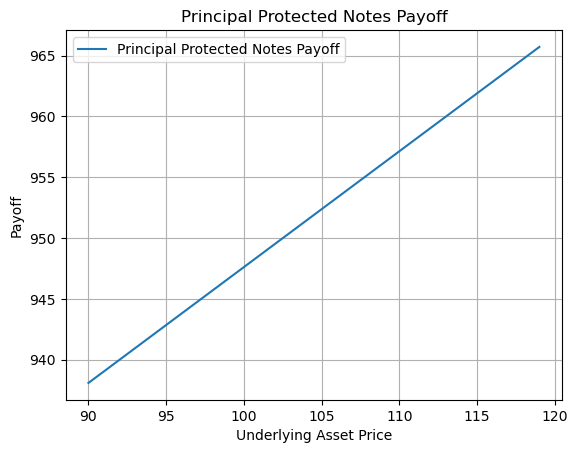

In [308]:
# Function to calculate the payoff of Principal Protected Notes
def principal_protected_notes(option_strike, maturity, risk_free_rate, asset_price_range):
    bond_face_value = 1000  # Face value of the zero coupon bond
    bond_price = bond_face_value / (1 + risk_free_rate) ** maturity

    call_payoff = np.maximum(asset_price_range - option_strike, 0)
    put_payoff = np.maximum(option_strike - asset_price_range, 0)

    option_price = (call_payoff - put_payoff) / (1 + risk_free_rate) ** maturity

    return bond_price + option_price

# Parameters
option_strike = 105  # Strike price of the European Call/Put
maturity = 1  # Maturity in years
risk_free_rate = 0.05  # Risk-free rate
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = principal_protected_notes(option_strike, maturity, risk_free_rate, asset_price_range)

# Plotting
plt.plot(asset_price_range, payoff, label='Principal Protected Notes Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Principal Protected Notes Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Writing Covered Calls

A covered call consists of a short position in a call option whilst holding a long position in the underlying asset. The long position covers the investor from the payoff on the short call if there is a sharp rise in stock price. 

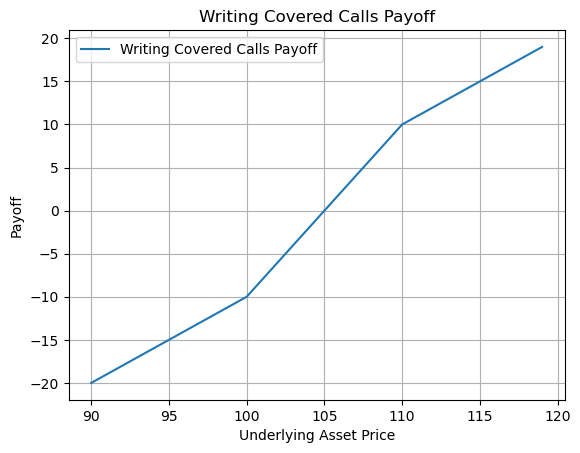

In [309]:
# Function to calculate the payoff of Writing Covered Calls
def writing_covered_calls(asset_price_range, call_strike, stock_purchase_price):
    call_payoff = np.minimum(asset_price_range - call_strike, 0)  # Short position in call option
    stock_payoff = np.maximum(asset_price_range - stock_purchase_price, 0)  # Long position in underlying asset

    return call_payoff + stock_payoff

# Parameters
call_strike = 110  # Strike price of the call option
stock_purchase_price = 100  # Purchase price of the underlying asset
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = writing_covered_calls(asset_price_range, call_strike, stock_purchase_price)

# Plotting
plt.plot(asset_price_range, payoff, label='Writing Covered Calls Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Writing Covered Calls Payoff')
plt.legend()
plt.grid(True)
plt.show()


### Reverse Covered Calls

A reverse covered call is a long position in the call option combined with a short position in the underlying asset. 

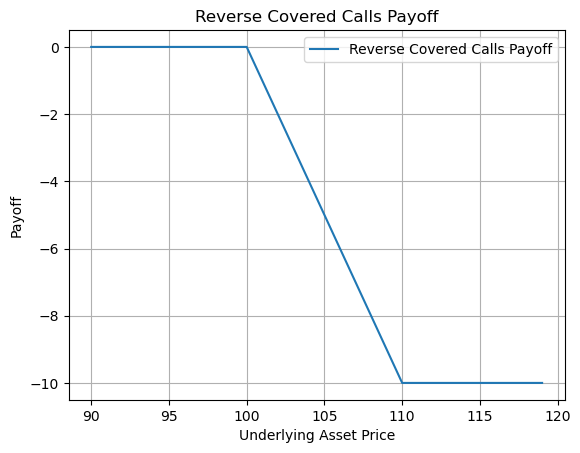

In [310]:
# Function to calculate the payoff of Reverse Covered Calls
def reverse_covered_calls(asset_price_range, call_strike, stock_purchase_price):
    call_payoff = np.maximum(asset_price_range - call_strike, 0)  # Long position in the call option
    stock_payoff = np.minimum(stock_purchase_price - asset_price_range, 0)  # Short position in underlying asset

    return call_payoff + stock_payoff

# Parameters
call_strike = 110  # Strike price of the call option
stock_purchase_price = 100  # Purchase price of the underlying asset
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = reverse_covered_calls(asset_price_range, call_strike, stock_purchase_price)

# Plotting
plt.plot(asset_price_range, payoff, label='Reverse Covered Calls Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Reverse Covered Calls Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Protective Put

This investment strategy involves buying a European put on an asset and the asset itself. 

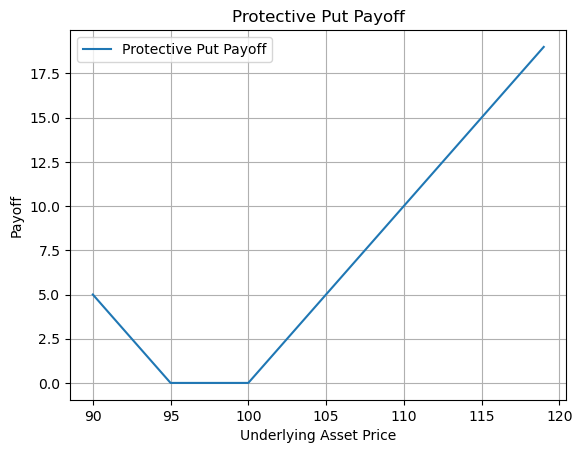

In [311]:
# Function to calculate the payoff of Protective Put
def protective_put(asset_price_range, put_strike, stock_purchase_price):
    put_payoff = np.maximum(put_strike - asset_price_range, 0)  # Long position in the put option
    stock_payoff = np.maximum(asset_price_range - stock_purchase_price, 0)  # Long position in underlying asset

    return put_payoff + stock_payoff

# Parameters
put_strike = 95  # Strike price of the put option
stock_purchase_price = 100  # Purchase price of the underlying asset
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = protective_put(asset_price_range, put_strike, stock_purchase_price)

# Plotting
plt.plot(asset_price_range, payoff, label='Protective Put Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Protective Put Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Reverse Protective Put
A short position in the put option is combined with a short position in the stock.

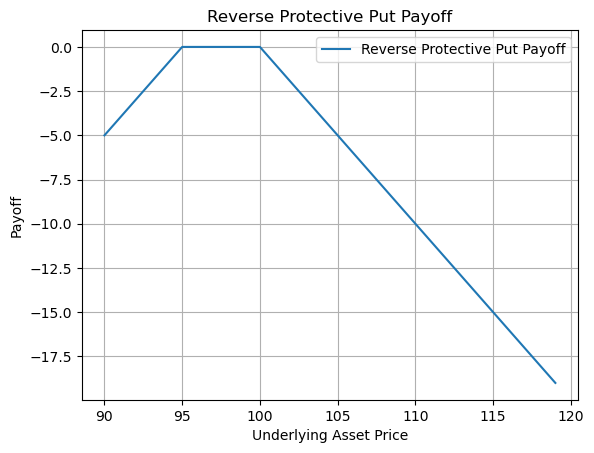

In [312]:
# Function to calculate the payoff of Reverse Protective Put
def reverse_protective_put(asset_price_range, put_strike, stock_purchase_price):
    put_payoff = np.minimum(asset_price_range - put_strike, 0)  # Short position in the put option
    stock_payoff = np.minimum(stock_purchase_price - asset_price_range, 0)  # Short position in underlying asset

    return put_payoff + stock_payoff

# Parameters
put_strike = 95  # Strike price of the put option
stock_purchase_price = 100  # Purchase price of the underlying asset
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = reverse_protective_put(asset_price_range, put_strike, stock_purchase_price)

# Plotting
plt.plot(asset_price_range, payoff, label='Reverse Protective Put Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Reverse Protective Put Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Bull Spreads

This strategy limits an investor’s upside as well as down side risk. The bull spread can be created by buying a European call option on an asset with a certain strike price and selling a European call option on the same asset with a higher strike price. Both options have the same maturity. When made of calls, this strategy requires an initial investment. Payoff from such an investment will be the difference between the two strike prices. If the asset price at expiry lies between the two strike prices, the payoff will be the difference between the asset price and the first strike price.

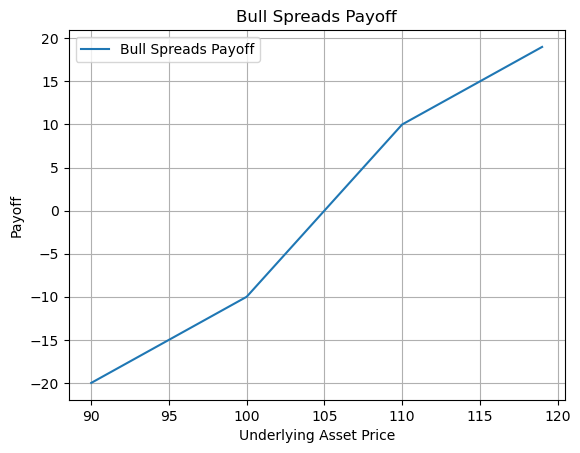

In [313]:
# Function to calculate the payoff of Bull Spreads
def bull_spreads(asset_price_range, call_strike_low, call_strike_high):
    call_low_payoff = np.maximum(asset_price_range - call_strike_low, 0)  # Long position in the lower strike call option
    call_high_payoff = np.maximum(call_strike_high - asset_price_range, 0)  # Short position in the higher strike call option

    return call_low_payoff - call_high_payoff

# Parameters
call_strike_low = 100  # Strike price of the lower call option
call_strike_high = 110  # Strike price of the higher call option
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = bull_spreads(asset_price_range, call_strike_low, call_strike_high)

# Plotting
plt.plot(asset_price_range, payoff, label='Bull Spreads Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Bull Spreads Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Bear Spreads

Whilst bull spreads speculate asset prices increasing, bear spreads speculate asset prices decreasing. The strategy can be created by buying a European put with one strike price and another with a lower strike price. This strategy also requires an initial investment.

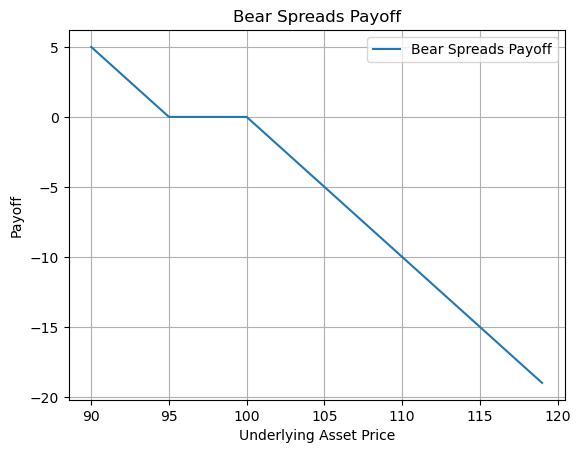

In [314]:
# Function to calculate the payoff of Bear Spreads
def bear_spreads(asset_price_range, put_strike_low, put_strike_high):
    put_low_payoff = np.maximum(put_strike_low - asset_price_range, 0)  # Long position in the lower strike put option
    put_high_payoff = np.maximum(asset_price_range - put_strike_high, 0)  # Short position in the higher strike put option

    return put_low_payoff - put_high_payoff

# Parameters
put_strike_low = 95  # Strike price of the lower put option
put_strike_high = 100  # Strike price of the higher put option
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = bear_spreads(asset_price_range, put_strike_low, put_strike_high)

# Plotting
plt.plot(asset_price_range, payoff, label='Bear Spreads Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Bear Spreads Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Box Spreads

A box spread is a combination of a bull call spread and a bear put spread with the same two strike prices. The value of a box spread is therefore always the present value of this payoff (or the second strike price minus the first strike price, multiplied by e to the power of negative the rate times the time). If there is a difference in value, there is an arbitrage opportunity. It is important to note; such a strategy only works with European options. 

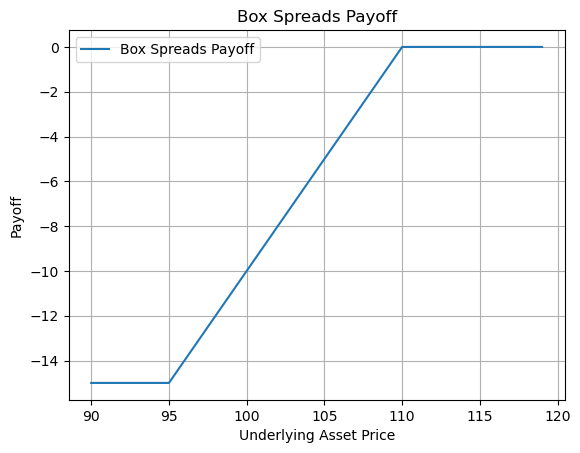

In [315]:
# Box Spreads Strategy

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the payoff of Box Spreads
def box_spreads(asset_price_range, call_strike_low, call_strike_high, put_strike_low, put_strike_high):
    call_low_payoff = np.maximum(asset_price_range - call_strike_low, 0)  # Long position in the lower strike call option
    call_high_payoff = np.maximum(call_strike_high - asset_price_range, 0)  # Short position in the higher strike call option
    put_low_payoff = np.maximum(put_strike_low - asset_price_range, 0)  # Long position in the lower strike put option
    put_high_payoff = np.maximum(asset_price_range - put_strike_high, 0)  # Short position in the higher strike put option

    return call_low_payoff - call_high_payoff + put_low_payoff - put_high_payoff

# Parameters
call_strike_low = 100  # Strike price of the lower call option
call_strike_high = 110  # Strike price of the higher call option
put_strike_low = 95  # Strike price of the lower put option
put_strike_high = 100  # Strike price of the higher put option
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = box_spreads(asset_price_range, call_strike_low, call_strike_high, put_strike_low, put_strike_high)

# Plotting
plt.plot(asset_price_range, payoff, label='Box Spreads Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Box Spreads Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Butterfly Spreads

A butterfly spread involves positions in options with three different strike prices, it can be created by going long the European call with a low strike price, going long the European call with a high strike price and going short 2 European calls with a strike price at the mid-point of the two long positions. the short call strike price is usually close to the asset price. This strategy works if there are no large movements in the underlying stock price, they payoff on such a strategy occurs when the asset does not exceed the long call strike prices. the butterfly spread can be sold or shorted with the reverse strategy if an investor speculates there will be large movements in the market. 

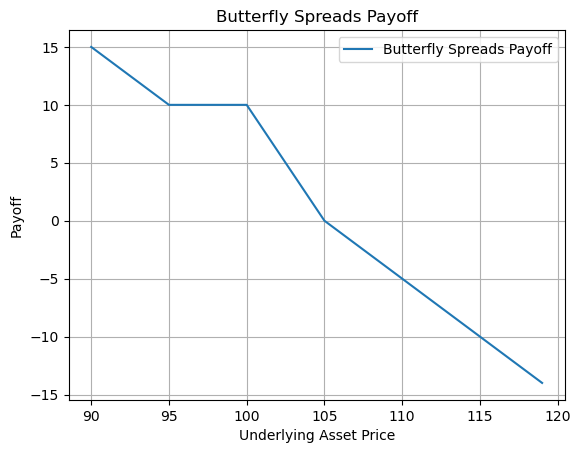

In [316]:
# Function to calculate the payoff of Butterfly Spreads
def butterfly_spreads(asset_price_range, call_strike_low, call_strike_high):
    call_low_payoff = np.maximum(asset_price_range - call_strike_low, 0)  # Long position in the lower strike call option
    call_high_payoff = np.maximum(call_strike_high - asset_price_range, 0)  # Long position in the higher strike call option
    short_call_payoff = -2 * np.maximum(asset_price_range - ((call_strike_low + call_strike_high) / 2), 0)  # Short position in mid-strike call options

    return call_low_payoff + call_high_payoff + short_call_payoff

# Parameters
call_strike_low = 95  # Strike price of the lower call option
call_strike_high = 105  # Strike price of the higher call option
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = butterfly_spreads(asset_price_range, call_strike_low, call_strike_high)

# Plotting
plt.plot(asset_price_range, payoff, label='Butterfly Spreads Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Butterfly Spreads Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Calendar Spreads
In a calendar spread strategy, an investor would short a short dated European call and Long a longer dated European call at the same strike price making a profit if the stock price at maturity is close to the strike price of the short dated call strike price. The same can be done with Put options. It follows that a reverse calendar spread is the reverse strategy with a payoff occurring when the stock price upon maturity of the short dated option is well above or below the strike price. 

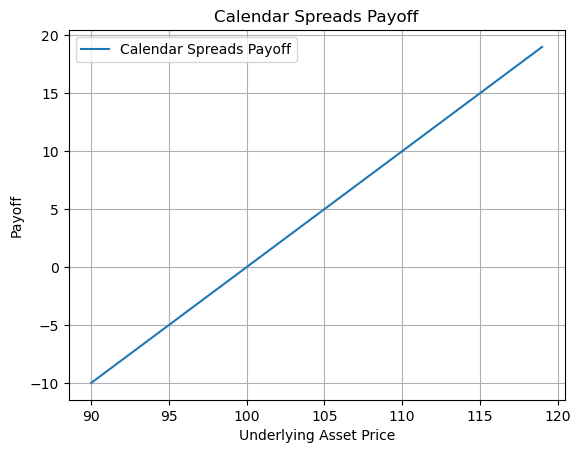

In [317]:
# Function to calculate the payoff of Calendar Spreads
def calendar_spreads(short_call_strike, long_call_strike, maturity_short, maturity_long, asset_price_range):
    short_call_payoff = np.maximum(asset_price_range - short_call_strike, 0)  # Short position in short-dated call option
    long_call_payoff = np.maximum(long_call_strike - asset_price_range, 0)  # Long position in longer-dated call option

    return short_call_payoff - long_call_payoff

# Parameters
short_call_strike = 100  # Strike price of the short-dated call option
long_call_strike = 100  # Strike price of the longer-dated call option
maturity_short = 1  # Maturity of the short-dated call option in years
maturity_long = 2  # Maturity of the longer-dated call option in years
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = calendar_spreads(short_call_strike, long_call_strike, maturity_short, maturity_long, asset_price_range)

# Plotting
plt.plot(asset_price_range, payoff, label='Calendar Spreads Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Calendar Spreads Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Diagonal Spreads 

In a diagonal spread, both the expiration date and the strike price of the calls are different, this increases the range of profit patterns that are possible. This is essentially bull/bear spreads with differing expiry dates and strike prices. 

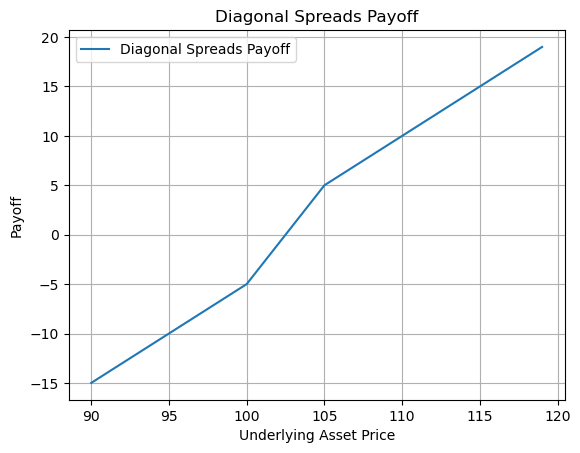

In [318]:
# Function to calculate the payoff of Diagonal Spreads
def diagonal_spreads(short_call_strike, long_call_strike, maturity_short, maturity_long, asset_price_range):
    short_call_payoff = np.maximum(asset_price_range - short_call_strike, 0)  # Short position in shorter-dated call option
    long_call_payoff = np.maximum(long_call_strike - asset_price_range, 0)  # Long position in longer-dated call option

    return short_call_payoff - long_call_payoff

# Parameters
short_call_strike = 100  # Strike price of the shorter-dated call option
long_call_strike = 105  # Strike price of the longer-dated call option
maturity_short = 1  # Maturity of the shorter-dated call option in years
maturity_long = 2  # Maturity of the longer-dated call option in years
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = diagonal_spreads(short_call_strike, long_call_strike, maturity_short, maturity_long, asset_price_range)

# Plotting
plt.plot(asset_price_range, payoff, label='Diagonal Spreads Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Diagonal Spreads Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Straddle

A straddle can be set up by taking a long position in a European call and put, with the same strike price and expiry date to profit from a large price swing in either direction. A straddle write is the reverse position of this, which can be created by selling a call and a put with the same expiry date and strike price to profit from no movement in the underlying asset price. 

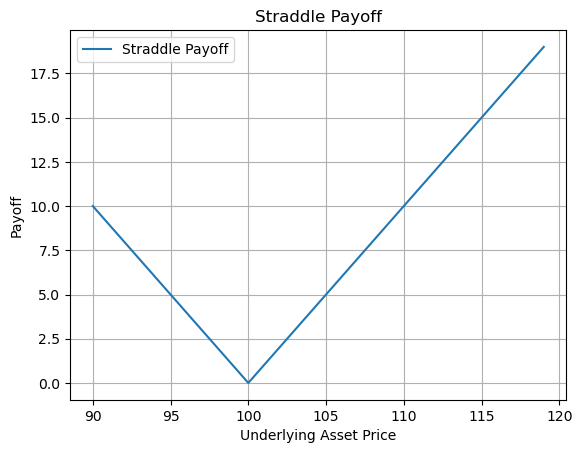

In [319]:
# Function to calculate the payoff of Straddle
def straddle(asset_price_range, call_put_strike, maturity):
    call_payoff = np.maximum(asset_price_range - call_put_strike, 0)  # Long position in the call option
    put_payoff = np.maximum(call_put_strike - asset_price_range, 0)  # Long position in the put option

    return call_payoff + put_payoff

# Parameters
call_put_strike = 100  # Strike price of the call and put options
maturity = 1  # Maturity of the options in years
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = straddle(asset_price_range, call_put_strike, maturity)

# Plotting
plt.plot(asset_price_range, payoff, label='Straddle Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Straddle Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Strips and Straps 

A strip consists of a long position in one European call and two European puts with the same strike price and expiry date, where the investor is betting there will be a large movement in the underlying asset price and considers a decrease to be more likely than an increase. A strap consists of a long position in two European calls and one European put with the same strike price and expiry date, where the investor is betting on the revers outcome of a strip.

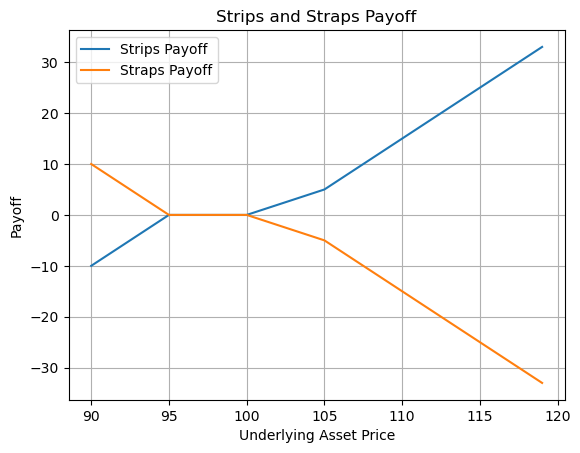

In [320]:
# Function to calculate the payoff of Strips
def strips(asset_price_range, call_strike, put_strike_low, put_strike_high):
    call_payoff = np.maximum(asset_price_range - call_strike, 0)  # Long position in the call option
    put_low_payoff = np.maximum(put_strike_low - asset_price_range, 0)  # Long position in the lower strike put option
    put_high_payoff = np.maximum(asset_price_range - put_strike_high, 0)  # Long position in the higher strike put option

    return call_payoff - 2 * put_low_payoff + put_high_payoff

# Function to calculate the payoff of Straps
def straps(asset_price_range, call_strike, put_strike_low, put_strike_high):
    call_payoff = np.maximum(asset_price_range - call_strike, 0)  # Long position in the call option
    put_low_payoff = np.maximum(put_strike_low - asset_price_range, 0)  # Long position in the lower strike put option
    put_high_payoff = np.maximum(asset_price_range - put_strike_high, 0)  # Long position in the higher strike put option

    return 2 * put_low_payoff - put_high_payoff - call_payoff

# Parameters
call_strike = 100  # Strike price of the call option
put_strike_low = 95  # Strike price of the lower put option
put_strike_high = 105  # Strike price of the higher put option
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff for Strips
payoff_strips = strips(asset_price_range, call_strike, put_strike_low, put_strike_high)

# Calculate payoff for Straps
payoff_straps = straps(asset_price_range, call_strike, put_strike_low, put_strike_high)

# Plotting
plt.plot(asset_price_range, payoff_strips, label='Strips Payoff')
plt.plot(asset_price_range, payoff_straps, label='Straps Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Strips and Straps Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Strangles 

In a strangle, an investor buys a European put and a European call with the same expiry date and different strike prices, with the call strike price higher than the put strike price. the investor in such a strategy is betting on a large underlying asset price move but is uncertain of the direction in which this might take place. 

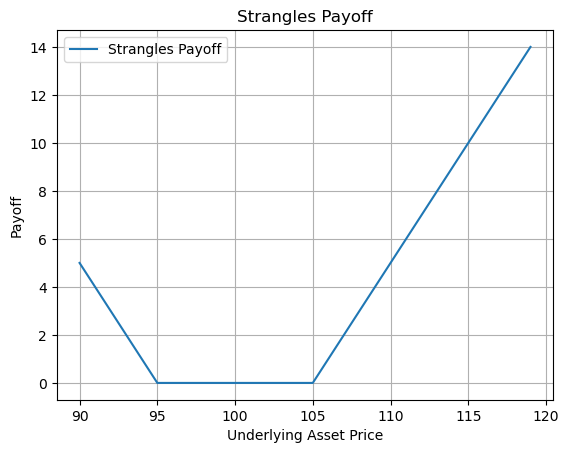

In [321]:
# Function to calculate the payoff of Strangles
def strangles(asset_price_range, call_strike_high, put_strike_low):
    call_payoff = np.maximum(asset_price_range - call_strike_high, 0)  # Long position in the higher strike call option
    put_payoff = np.maximum(put_strike_low - asset_price_range, 0)  # Long position in the lower strike put option

    return call_payoff + put_payoff

# Parameters
call_strike_high = 105  # Strike price of the higher call option
put_strike_low = 95  # Strike price of the lower put option
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = strangles(asset_price_range, call_strike_high, put_strike_low)

# Plotting
plt.plot(asset_price_range, payoff, label='Strangles Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Strangles Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Range Forwards 

Long put at a high strike price whilst taking a short position in calls at a low strike price with mid being the forward price of equivalent duration. The strike price of the call is greater than the put strike price and the strike prices are chosen so that the value of the call equals the value of the put. This strategy defers initial cost of set up by deferring payment until maturity. 

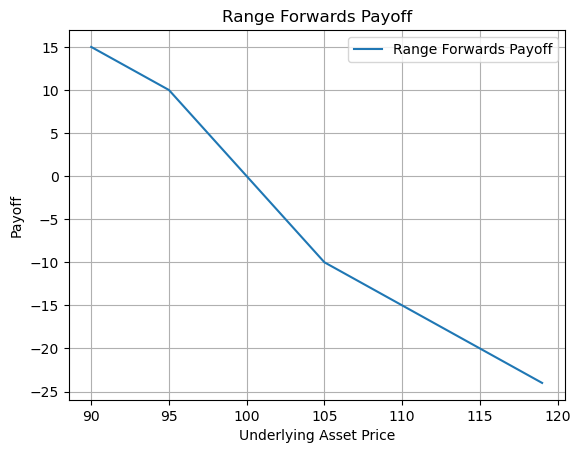

In [322]:
# Function to calculate the payoff of Range Forwards
def range_forwards(put_strike_high, call_strike_low, asset_price_range):
    put_payoff = np.maximum(put_strike_high - asset_price_range, 0)  # Long position in the higher strike put option
    call_payoff = np.maximum(asset_price_range - call_strike_low, 0)  # Short position in the lower strike call option

    return put_payoff - call_payoff

# Parameters
put_strike_high = 105  # Strike price of the higher put option
call_strike_low = 95  # Strike price of the lower call option
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = range_forwards(put_strike_high, call_strike_low, asset_price_range)

# Plotting
plt.plot(asset_price_range, payoff, label='Range Forwards Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Range Forwards Payoff')
plt.legend()
plt.grid(True)
plt.show()

# Exotic Options

### Packages

A package is a portfolio consisting of standard European calls, standard European calls, forward contracts, cash and the underlying asset itself. These are structured to have 0 startup cost; any derivative can be converted into a zero cost product by deferring payment until maturity. 


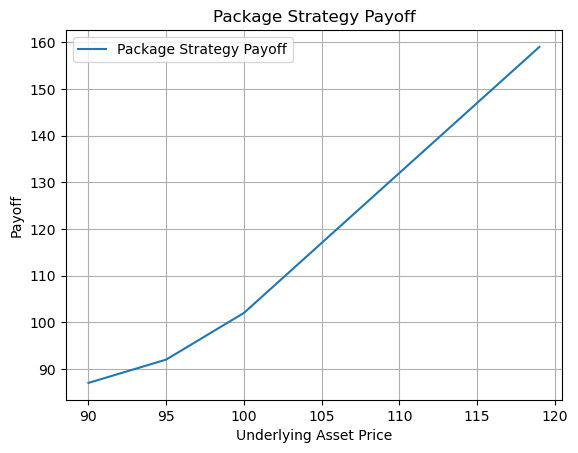

In [323]:
# Function to calculate the payoff of the Package Strategy
def package_strategy(call_strike, put_strike, forward_strike, asset_price_range):
    # Long position in the standard European call option
    call_payoff = np.maximum(asset_price_range - call_strike, 0)

    # Long position in the standard European put option
    put_payoff = np.maximum(put_strike - asset_price_range, 0)

    # Long position in the forward contract
    forward_payoff = asset_price_range - forward_strike

    # Long position in the underlying asset
    asset_payoff = asset_price_range

    return call_payoff + put_payoff + forward_payoff + asset_payoff

# Parameters
call_strike = 100  # Strike price of the standard European call option
put_strike = 95  # Strike price of the standard European put option
forward_strike = 98  # Strike price of the forward contract
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices

# Calculate payoff
payoff = package_strategy(call_strike, put_strike, forward_strike, asset_price_range)

# Plotting
plt.plot(asset_price_range, payoff, label='Package Strategy Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Package Strategy Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Perpetual American Call and Put Options 

Nonstandard American options trade OTC and can have some additional embedded features such as stated below:
- Early exercise restricted to specific dates (Bermudan)
- Early exercise may be allowed during only part of the life of the option
- The strike price may change during the life of the option 

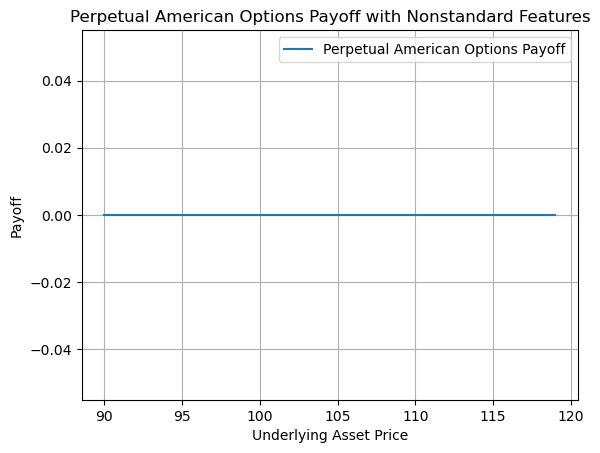

In [324]:
# Function to calculate the payoff of Perpetual American Call and Put Options
def perpetual_american_options(asset_price_range, early_exercise_dates, early_exercise_window, strike_price_function):
    payoff = np.zeros_like(asset_price_range)

    # Perpetual American Call Option
    call_payoff = np.maximum(asset_price_range - strike_price_function(asset_price_range), 0)

    # Perpetual American Put Option
    put_payoff = np.maximum(strike_price_function(asset_price_range) - asset_price_range, 0)

    # Combine Call and Put Payoffs
    combined_payoff = call_payoff - put_payoff

    # Apply early exercise restrictions
    for date in early_exercise_dates:
        payoff[date:] = combined_payoff[date:]

    # Apply early exercise window
    for window in early_exercise_window:
        payoff[window[0]:window[1]] = combined_payoff[window[0]:window[1]]

    return payoff

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
early_exercise_dates = [95, 100]  # Specific dates for early exercise (Bermudan)
early_exercise_window = [(105, 110)]  # Early exercise allowed during only part of the life of the option
strike_price_function = lambda x: 98 + 0.5 * x  # Example of a strike price changing during the life of the option

# Calculate payoff
payoff = perpetual_american_options(asset_price_range, early_exercise_dates, early_exercise_window, strike_price_function)

# Plotting
plt.plot(asset_price_range, payoff, label='Perpetual American Options Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Perpetual American Options Payoff with Nonstandard Features')
plt.legend()
plt.grid(True)
plt.show()

### GAP Options 

A gap is a European call option that pays off the stock price minus the strike price when the stock price is greater than the second strike price. The payoff is when the stock price is greater than the second strike price is increased by the second strike price minus the first strike price. For a gap put option, the payoff is the first strike price minus the stock price when the stock price is less than the second strike price.

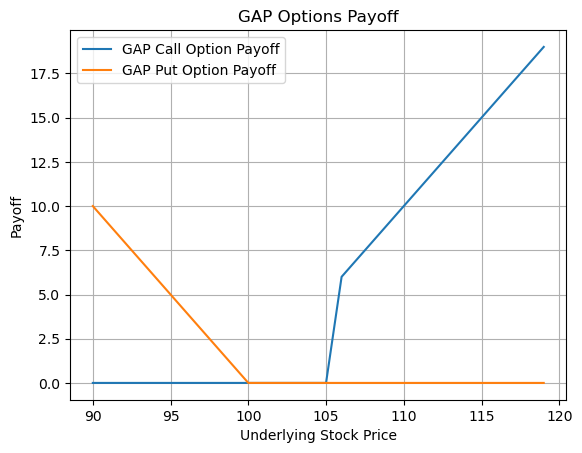

In [325]:
# Function to calculate the payoff of GAP Call Options
def gap_call_option(stock_price_range, first_strike, second_strike):
    payoff = np.maximum(stock_price_range - second_strike, 0)
    payoff[stock_price_range <= second_strike] = 0  # Payoff is zero when stock price is less than or equal to the second strike
    payoff[stock_price_range > second_strike] += second_strike - first_strike  # Increase payoff when stock price is greater than the second strike

    return payoff

# Function to calculate the payoff of GAP Put Options
def gap_put_option(stock_price_range, first_strike, second_strike):
    payoff = np.maximum(first_strike - stock_price_range, 0)
    payoff[stock_price_range >= second_strike] = 0  # Payoff is zero when stock price is greater than or equal to the second strike

    return payoff

# Parameters
stock_price_range = np.arange(90, 120, 1)  # Range of underlying stock prices
first_strike = 100  # First strike price
second_strike = 105  # Second strike price

# Calculate payoff for GAP Call Option
payoff_gap_call = gap_call_option(stock_price_range, first_strike, second_strike)

# Calculate payoff for GAP Put Option
payoff_gap_put = gap_put_option(stock_price_range, first_strike, second_strike)

# Plotting
plt.plot(stock_price_range, payoff_gap_call, label='GAP Call Option Payoff')
plt.plot(stock_price_range, payoff_gap_put, label='GAP Put Option Payoff')
plt.xlabel('Underlying Stock Price')
plt.ylabel('Payoff')
plt.title('GAP Options Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Forward Starting Options

Forward starting options are options that will start at some time in the future, consider a forward start at the money European call option starting at time T1 and maturing at time T2. Using risk neutral valuation, the value of the forward start option at time zero is the present value of an at the money call that lasts for T2-T1.

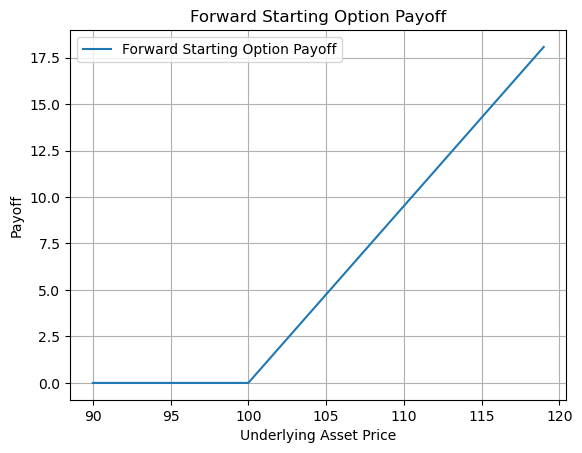

In [326]:
# Function to calculate the payoff of Forward Starting Options
def forward_starting_option(asset_price_range, strike_price, maturity_T1, maturity_T2):
    # Present value of an at-the-money call that lasts for T2 - T1
    present_value_call = np.maximum(asset_price_range - strike_price, 0)

    return present_value_call * np.exp(-r * (maturity_T2 - maturity_T1))

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
strike_price = 100  # Strike price
maturity_T1 = 1  # Starting time of the option
maturity_T2 = 2  # Maturity time of the option
r = 0.05  # Risk-free interest rate

# Calculate payoff for Forward Starting Option
payoff_forward_starting_option = forward_starting_option(asset_price_range, strike_price, maturity_T1, maturity_T2)

# Plotting
plt.plot(asset_price_range, payoff_forward_starting_option, label='Forward Starting Option Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Forward Starting Option Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Cliquet Options 

Cliquet options are a series of call or put options with rules for determining the strike price. This is a regular option, plus n-1 forward start options. 

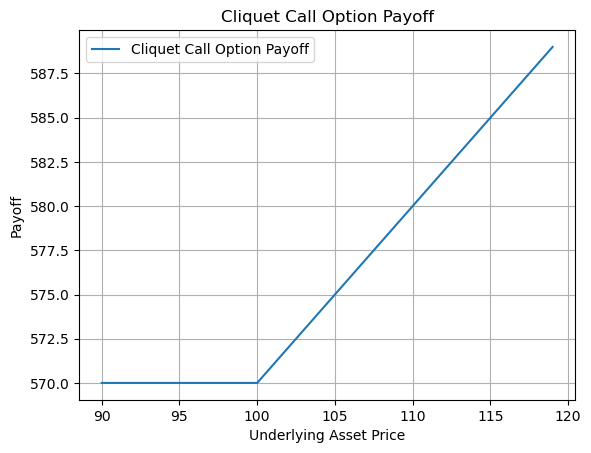

In [327]:
# Function to calculate the payoff of Cliquet Call Options
def cliquet_call_option(asset_price_range, strike_price, maturity, num_forward_start_options):
    # Regular call option payoff
    regular_call_payoff = np.maximum(asset_price_range - strike_price, 0)

    # Forward start call option payoffs
    forward_start_payoffs = [np.maximum(asset_price_range - strike_price, 0) for _ in range(num_forward_start_options)]

    return regular_call_payoff + np.sum(forward_start_payoffs)

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
strike_price = 100  # Strike price
maturity = 1  # Maturity time of the option
num_forward_start_options = 3  # Number of forward start call options

# Calculate payoff for Cliquet Call Option
payoff_cliquet_call_option = cliquet_call_option(asset_price_range, strike_price, maturity, num_forward_start_options)

# Plotting
plt.plot(asset_price_range, payoff_cliquet_call_option, label='Cliquet Call Option Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Cliquet Call Option Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Compound Options 

Compound options are options on options, there are 4 types, a call on a call, a put on a call, a call on a put and a put on a put. They have 2 strike prices and 2 exercise dates. 

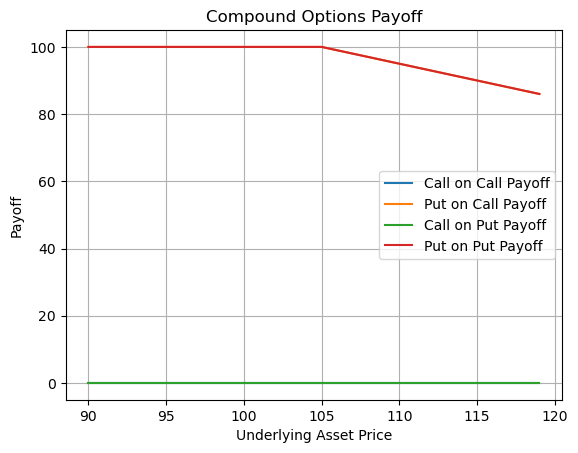

In [328]:
# Function to calculate the payoff of Compound Options
def compound_option(asset_price_range, strike_price_1, strike_price_2, maturity_1, maturity_2, option_type):
    if (
        option_type == 'call_on_call'
        or option_type != 'put_on_call'
        and option_type == 'call_on_put'
    ):
        payoff = np.maximum(np.maximum(asset_price_range - strike_price_1, 0) - strike_price_2, 0)
    elif option_type in ['put_on_call', 'put_on_put']:
        payoff = np.maximum(strike_price_1 - np.maximum(asset_price_range - strike_price_2, 0), 0)
    else:
        raise ValueError('Invalid option type')

    return payoff

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
strike_price_1 = 100  # First strike price
strike_price_2 = 105  # Second strike price
maturity_1 = 1  # First exercise date
maturity_2 = 2  # Second exercise date

# Calculate payoff for Compound Options
payoff_call_on_call = compound_option(asset_price_range, strike_price_1, strike_price_2, maturity_1, maturity_2, 'call_on_call')
payoff_put_on_call = compound_option(asset_price_range, strike_price_1, strike_price_2, maturity_1, maturity_2, 'put_on_call')
payoff_call_on_put = compound_option(asset_price_range, strike_price_1, strike_price_2, maturity_1, maturity_2, 'call_on_put')
payoff_put_on_put = compound_option(asset_price_range, strike_price_1, strike_price_2, maturity_1, maturity_2, 'put_on_put')

# Plotting
plt.plot(asset_price_range, payoff_call_on_call, label='Call on Call Payoff')
plt.plot(asset_price_range, payoff_put_on_call, label='Put on Call Payoff')
plt.plot(asset_price_range, payoff_call_on_put, label='Call on Put Payoff')
plt.plot(asset_price_range, payoff_put_on_put, label='Put on Put Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Compound Options Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Chooser Options 

A chooser option has the feature that after a specified period of time, the holder can choose whether the option is a call or a put. Put-call parity valuation shows that a chooser option is a package consisting of a call with a maturity at time T2 and e to the power of negative the present value of dividends multiplied by T2-T1 put options with a strike price of K multiplied by e to the power of negative the rate multiplied by the present value of dividends, multiplied by T2-T1.

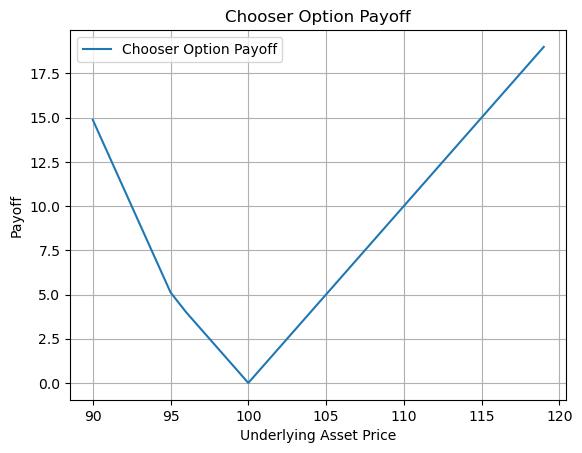

In [329]:
# Function to calculate the payoff of Chooser Options
def chooser_option(asset_price_range, strike_price, maturity_T1, maturity_T2, rate, dividends):
    # Call option payoff at maturity_T2
    call_payoff = np.maximum(asset_price_range - strike_price, 0)

    # Put option payoff at maturity_T2
    put_payoff = np.maximum(strike_price - asset_price_range, 0)

    # Chooser option payoff at maturity_T2
    chooser_payoff = np.maximum(call_payoff, put_payoff)

    # Calculate the present value of dividends
    present_value_dividends = dividends * np.exp(-rate * (maturity_T2 - maturity_T1))

    # Adjust the strike price for put option calculation
    adjusted_strike_price = strike_price * np.exp(-rate * (maturity_T2 - maturity_T1))

    # Put option payoff at maturity_T1 with adjusted strike price
    put_at_T1_payoff = np.maximum(adjusted_strike_price - asset_price_range, 0)

    # Calculate the total payoff of the chooser option
    total_payoff = chooser_payoff + np.exp(-rate * (maturity_T2 - maturity_T1)) * put_at_T1_payoff

    return total_payoff

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
strike_price = 100  # Strike price
maturity_T1 = 1  # Starting time of the chooser option
maturity_T2 = 2  # Maturity time of the chooser option
rate = 0.05  # Risk-free interest rate
dividends = 0.02  # Dividend yield

# Calculate payoff for Chooser Option
payoff_chooser_option = chooser_option(asset_price_range, strike_price, maturity_T1, maturity_T2, rate, dividends)

# Plotting
plt.plot(asset_price_range, payoff_chooser_option, label='Chooser Option Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Chooser Option Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Barrier Options 

Barrier options are options where the payoff depends on whether the underlying asset’s price reaches a certain level during a certain period of time. A down and out call is a call that ceases to exist if the asset price reaches a certain level. A down and in call is a regular call that comes into existence only if the asset price reaches the barrier level. The value of a regular call equals the value of a down and in call plus the value of a down and out call. An up and out call is a call that ceases to exist if the asset price reaches a barrier level higher than the current asset price, an up and in call is a call that only comes into existence when the barrier is reached. The reverse can also be used to describe barrier put options. One disadvantage of barrier options is that short term volatility can cause the options to be knocked in or out. 

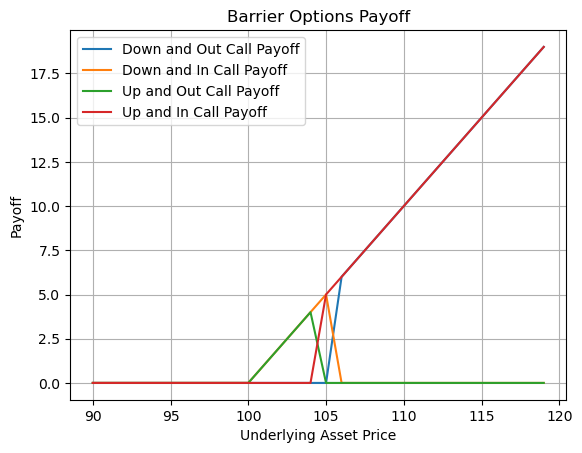

In [330]:
# Function to calculate the payoff of Barrier Options
def barrier_option(asset_price_range, strike_price, barrier_level, option_type):
    if option_type == 'down_and_out_call':
        payoff = np.maximum(asset_price_range - strike_price, 0)
        payoff[asset_price_range <= barrier_level] = 0  # Ceases to exist if asset price reaches the barrier level
    elif option_type == 'down_and_in_call':
        payoff = np.maximum(asset_price_range - strike_price, 0)
        payoff[asset_price_range > barrier_level] = 0  # Comes into existence only if asset price reaches the barrier level
    elif option_type == 'up_and_out_call':
        payoff = np.maximum(asset_price_range - strike_price, 0)
        payoff[asset_price_range >= barrier_level] = 0  # Ceases to exist if asset price reaches a barrier level higher than the current asset price
    elif option_type == 'up_and_in_call':
        payoff = np.maximum(asset_price_range - strike_price, 0)
        payoff[asset_price_range < barrier_level] = 0  # Comes into existence only if asset price reaches the barrier level
    else:
        raise ValueError('Invalid option type')

    return payoff

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
strike_price = 100  # Strike price
barrier_level = 105  # Barrier level
option_types = ['down_and_out_call', 'down_and_in_call', 'up_and_out_call', 'up_and_in_call']

# Calculate payoff for each type of Barrier Option
payoff_down_and_out_call = barrier_option(asset_price_range, strike_price, barrier_level, option_types[0])
payoff_down_and_in_call = barrier_option(asset_price_range, strike_price, barrier_level, option_types[1])
payoff_up_and_out_call = barrier_option(asset_price_range, strike_price, barrier_level, option_types[2])
payoff_up_and_in_call = barrier_option(asset_price_range, strike_price, barrier_level, option_types[3])

# Plotting
plt.plot(asset_price_range, payoff_down_and_out_call, label='Down and Out Call Payoff')
plt.plot(asset_price_range, payoff_down_and_in_call, label='Down and In Call Payoff')
plt.plot(asset_price_range, payoff_up_and_out_call, label='Up and Out Call Payoff')
plt.plot(asset_price_range, payoff_up_and_in_call, label='Up and In Call Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Barrier Options Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Binary Options

Binary options are options with discontinuous payoffs, such as cash or nothing calls and puts, paying a fixed rate if in the money and nothing if out of the money, or asset or nothing calls, paying nothing if out of the money and paying the asset price if in the money. 

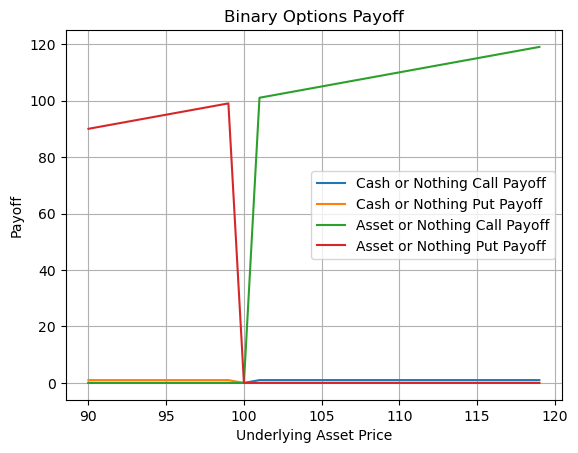

In [331]:
# Function to calculate the payoff of Binary Options
def binary_option(asset_price_range, strike_price, option_type):
    if option_type == 'cash_or_nothing_call':
        payoff = np.where(asset_price_range > strike_price, 1, 0)  # Pay fixed rate if in the money, else pay nothing
    elif option_type == 'cash_or_nothing_put':
        payoff = np.where(asset_price_range < strike_price, 1, 0)  # Pay fixed rate if in the money, else pay nothing
    elif option_type == 'asset_or_nothing_call':
        payoff = np.where(asset_price_range > strike_price, asset_price_range, 0)  # Pay asset price if in the money, else pay nothing
    elif option_type == 'asset_or_nothing_put':
        payoff = np.where(asset_price_range < strike_price, asset_price_range, 0)  # Pay asset price if in the money, else pay nothing
    else:
        raise ValueError('Invalid option type')

    return payoff

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
strike_price = 100  # Strike price
option_types = ['cash_or_nothing_call', 'cash_or_nothing_put', 'asset_or_nothing_call', 'asset_or_nothing_put']

# Calculate payoff for each type of Binary Option
payoff_cash_or_nothing_call = binary_option(asset_price_range, strike_price, option_types[0])
payoff_cash_or_nothing_put = binary_option(asset_price_range, strike_price, option_types[1])
payoff_asset_or_nothing_call = binary_option(asset_price_range, strike_price, option_types[2])
payoff_asset_or_nothing_put = binary_option(asset_price_range, strike_price, option_types[3])

# Plotting
plt.plot(asset_price_range, payoff_cash_or_nothing_call, label='Cash or Nothing Call Payoff')
plt.plot(asset_price_range, payoff_cash_or_nothing_put, label='Cash or Nothing Put Payoff')
plt.plot(asset_price_range, payoff_asset_or_nothing_call, label='Asset or Nothing Call Payoff')
plt.plot(asset_price_range, payoff_asset_or_nothing_put, label='Asset or Nothing Put Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Binary Options Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Lookback Options 

They payoffs from lookback options depend on the maximum or minimum asset price reached during the life of the option, in calls, this is a way that the holder can buy the underlying asset at the lowest price achieved during the life of the option, in puts, the holder can sell the underlying asset at the highest price achieved during the life of the option. In a floating lookback call, the payoff is the amount that the final asset price exceeds the minimum asset price during the life of the option. The payoff from a floating lookback put is the amount at which the maximum asset price during the life of the option, exceeds the final asset price. In a fixed lookback option, the strike price is specified, the final asset price is replaced by the maximum/minimum asset price achieved during the life of the option.

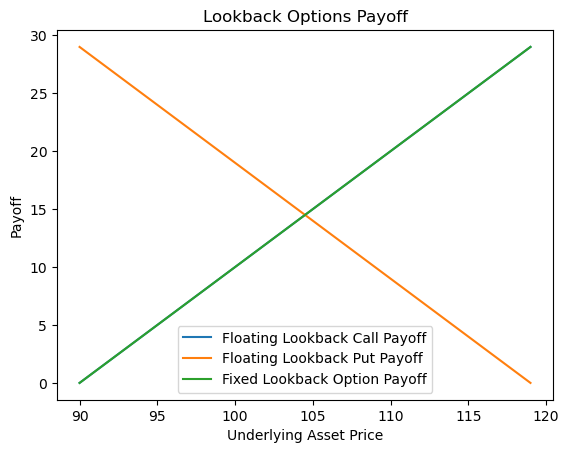

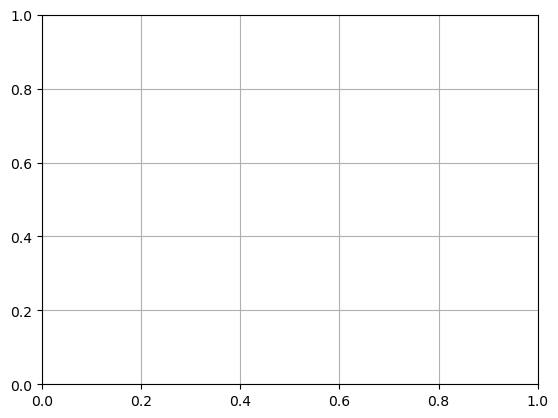

In [332]:
# Function to calculate the payoff of Lookback Options
def lookback_option(asset_price_range, option_type):
    if option_type == 'floating_lookback_call':
        payoff = np.maximum(asset_price_range - np.min(asset_price_range), 0)  # Payoff is the amount that the final asset price exceeds the minimum asset price
    elif option_type == 'floating_lookback_put':
        payoff = np.maximum(np.max(asset_price_range) - asset_price_range, 0)  # Payoff is the amount at which the maximum asset price exceeds the final asset price
    elif option_type == 'fixed_lookback_option':
        strike_price = np.min(asset_price_range)  # Strike price is specified as the minimum asset price achieved during the life of the option
        payoff = np.maximum(asset_price_range - strike_price, 0)  # Payoff is the amount that the final asset price exceeds the minimum asset price

    return payoff

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
option_types = ['floating_lookback_call', 'floating_lookback_put', 'fixed_lookback_option']

# Calculate payoff for each type of Lookback Option
payoff_floating_lookback_call = lookback_option(asset_price_range, option_types[0])
payoff_floating_lookback_put = lookback_option(asset_price_range, option_types[1])
payoff_fixed_lookback_option = lookback_option(asset_price_range, option_types[2])

# Plotting
plt.plot(asset_price_range, payoff_floating_lookback_call, label='Floating Lookback Call Payoff')
plt.plot(asset_price_range, payoff_floating_lookback_put, label='Floating Lookback Put Payoff')
plt.plot(asset_price_range, payoff_fixed_lookback_option, label='Fixed Lookback Option Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Lookback Options Payoff')
plt.legend()
plt.show()
plt.grid(True)

### Shout Options 

A shout option is a European option where the holder can shout to the writer at one time during its life, at the life of the option the holder receives the greater of either the usual payoff from the option or the intrinsic value at the time of the shout. 

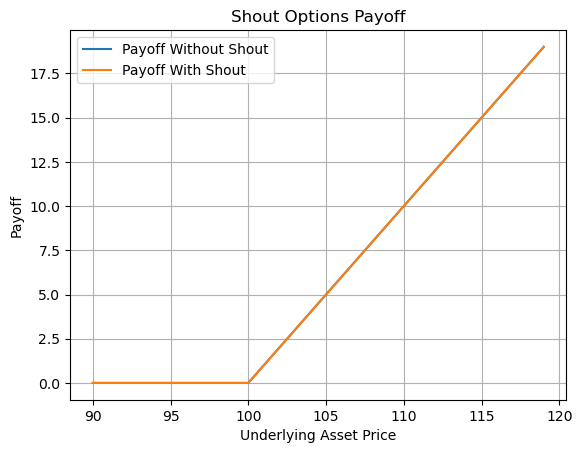

In [333]:
# Function to calculate the payoff of Shout Options
def shout_option(asset_price_range, strike_price, shout_time):
    # Payoff without shout
    payoff_no_shout = np.maximum(asset_price_range - strike_price, 0)

    # Payoff with shout
    payoff_with_shout = np.maximum(np.maximum(asset_price_range - strike_price, 0), np.max(asset_price_range[:shout_time]) - strike_price)

    return payoff_no_shout, payoff_with_shout

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
strike_price = 100  # Strike price
shout_time = 5  # Time of the shout during the life of the option

# Calculate payoff for Shout Options
payoff_no_shout, payoff_with_shout = shout_option(asset_price_range, strike_price, shout_time)

# Plotting
plt.plot(asset_price_range, payoff_no_shout, label='Payoff Without Shout')
plt.plot(asset_price_range, payoff_with_shout, label='Payoff With Shout')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Shout Options Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Asian Options 

Asian options are options where the payoff depends on the arithmetic average of the price of the underlying asset during the life of the option. Average price options are less expensive than regular options and arguably more appropriate than regular options for corporate treasurers. Another type of Asian option is an average strike option, which guarantee that the average price paid for an asset in frequent trading over a period of time is not greater than the final price. Alternatively, it can be guaranteed that the average price received for an asset in frequent trading over a period of time is not less than the final price.

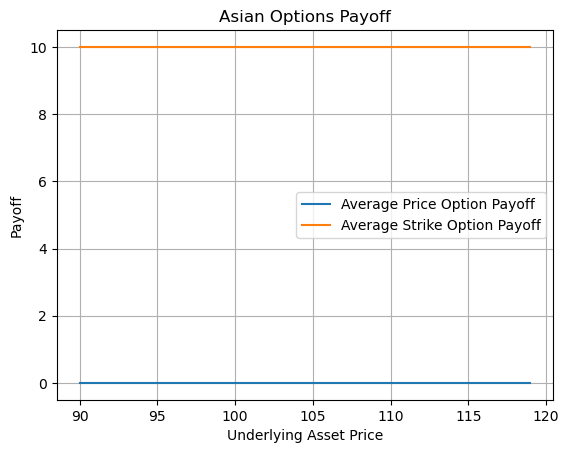

In [334]:
# Asian Options Strategy

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the payoff of Asian Options
def asian_option(asset_price_range, option_type, average_prices, final_price):
    if option_type == 'average_price_option':
        average_price = np.mean(average_prices)
        payoff = np.maximum(average_price - final_price, 0)
    elif option_type == 'average_strike_option':
        average_strike = np.mean(average_prices)
        payoff = np.maximum(final_price - average_strike, 0)
    else:
        raise ValueError('Invalid option type')

    return payoff

# Parameters
asset_price_range = np.arange(90, 120, 1)  # Range of underlying asset prices
option_types = ['average_price_option', 'average_strike_option']
average_prices = np.array([95, 100, 105, 110, 115])  # Example average prices for Asian options
final_price = 115  # Final price of the underlying asset

# Calculate payoff for each type of Asian Option
payoff_average_price_option = np.zeros_like(asset_price_range, dtype=float)
payoff_average_strike_option = np.zeros_like(asset_price_range, dtype=float)

for i, asset_price in enumerate(asset_price_range):
    payoff_average_price_option[i] = asian_option(asset_price, option_types[0], average_prices, final_price)
    payoff_average_strike_option[i] = asian_option(asset_price, option_types[1], average_prices, final_price)

# Plotting
plt.plot(asset_price_range, payoff_average_price_option, label='Average Price Option Payoff')
plt.plot(asset_price_range, payoff_average_strike_option, label='Average Strike Option Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Asian Options Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Options to Exchange One Assets 

Exchange options arise in various contexts, this is the option to exchange one asset for another at the time of contract maturity, e.g. currencies, stock tender offers etc. The payoff from exchange options is max(VT-UT,0) where UT is the asset held and VT is the asset to be received. 

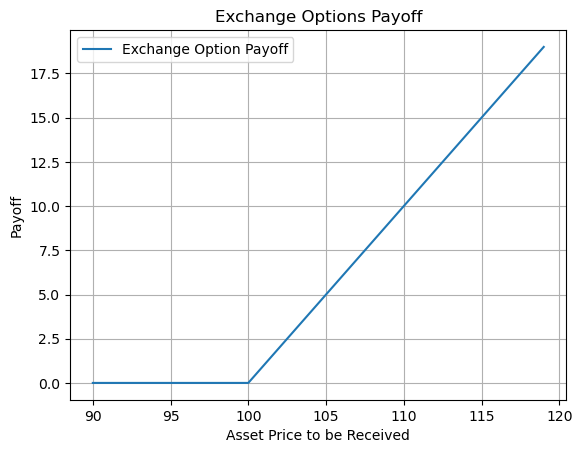

In [335]:
# Function to calculate the payoff of Exchange Options
def exchange_option(asset_to_be_received_range, asset_held):
    return np.maximum(asset_to_be_received_range - asset_held, 0)

# Parameters
asset_to_be_received_range = np.arange(90, 120, 1)  # Range of asset prices to be received
asset_held = 100  # Asset price held

# Calculate payoff for Exchange Options
payoff_exchange_option = exchange_option(asset_to_be_received_range, asset_held)

# Plotting
plt.plot(asset_to_be_received_range, payoff_exchange_option, label='Exchange Option Payoff')
plt.xlabel('Asset Price to be Received')
plt.ylabel('Payoff')
plt.title('Exchange Options Payoff')
plt.legend()
plt.grid(True)
plt.show()

### Options involving Several Assets 

Rainbow options such as bond futures contracts allow for the party making delivery to choose between a large number of different bonds. A European basket option is an option where the payoff is dependent on the value of a portfolio of assets. 

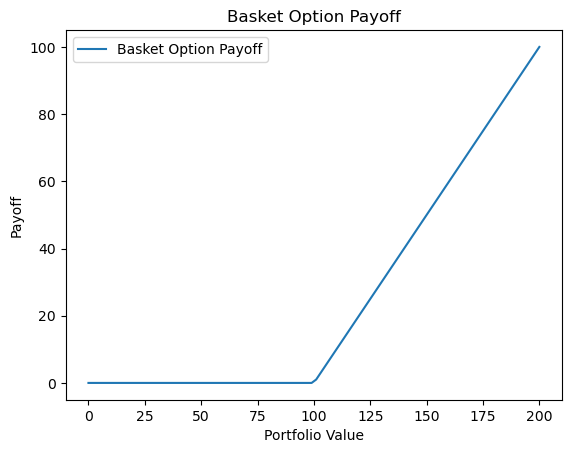

In [336]:
# Function to simulate basket option payoff
def basket_option(portfolio_value_range, strike_price):
    # Payoff is the maximum of the portfolio value and zero
    payoff = np.maximum(portfolio_value_range - strike_price, 0)
    return payoff

# Parameters
strike_price = 100  # Strike price of the basket option

# Simulate basket option payoff
portfolio_value_range = np.linspace(0, 200, 100)  # Adjust the range as needed
payoff_basket_option = basket_option(portfolio_value_range, strike_price)

# Plotting
plt.plot(portfolio_value_range, payoff_basket_option, label='Basket Option Payoff')
plt.xlabel('Portfolio Value')
plt.ylabel('Payoff')
plt.title('Basket Option Payoff')
plt.legend()
plt.show()

### Volatility and Variance Swaps 

A vol swap is an agreement to exchange the realized volatility of an asset between time 0 and time T for a pre-specified fixed rate of volatility, where payoff is realized volatility, minus fixed volatility multiplied by the notional principle. A variance swap is an agreement to exchange the realized variance rate between rate 0 and time T for a pre-specified variance rate. The variance is the square of the volatility (variance = volitility2) where payoff is realized variance minus fixed variance multiplied by notional principle.

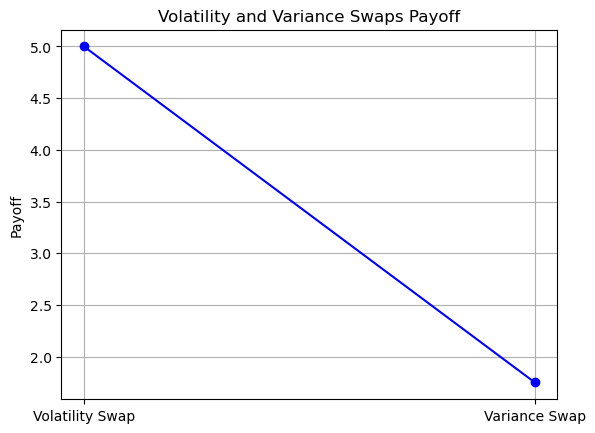

In [337]:
# Function to calculate the payoff of Volatility and Variance Swaps
def vol_variance_swap(realized_volatility, fixed_volatility, notional_principal):
    payoff_vol_swap = realized_volatility - fixed_volatility
    payoff_variance_swap = (realized_volatility**2) - (fixed_volatility**2)
    return payoff_vol_swap * notional_principal, payoff_variance_swap * notional_principal

# Parameters
realized_volatility = 0.2  # Example realized volatility
fixed_volatility = 0.15  # Fixed volatility rate
notional_principal = 100  # Notional principal

# Calculate payoff for Volatility and Variance Swaps
payoff_vol_swap, payoff_variance_swap = vol_variance_swap(realized_volatility, fixed_volatility, notional_principal)

# Plotting
plt.plot([1, 2], [payoff_vol_swap, payoff_variance_swap], marker='o', linestyle='-', color='b')
plt.xticks([1, 2], ['Volatility Swap', 'Variance Swap'])
plt.ylabel('Payoff')
plt.title('Volatility and Variance Swaps Payoff')
plt.grid(True)
plt.show()

# Commodity Forwards and Futures

The forward price on a financial asset is given by the spot price of the underlying asset, multiplied by e, to the power of the continuously compounded rate minus the continuous dividend yield on the asset, multiplied by the time to maturity on the contract. This equation also holds for commodities.

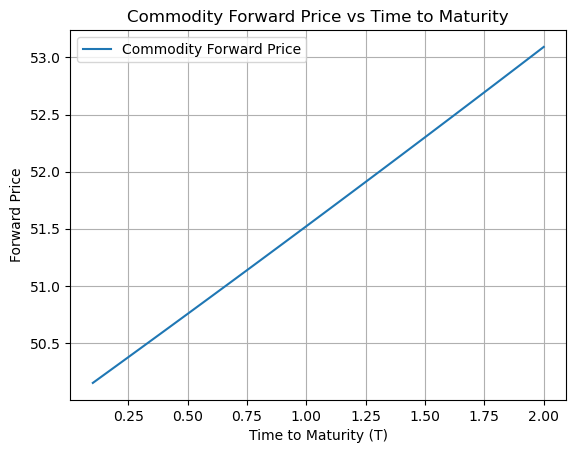

In [338]:
# Function to calculate commodity forward price
def commodity_forward_price(spot_price, risk_free_rate, dividend_yield, time_to_maturity):
    forward_price = spot_price * np.exp((risk_free_rate - dividend_yield) * time_to_maturity)
    return forward_price

# Parameters
spot_price = 50  # Current spot price of the commodity
risk_free_rate = 0.05  # Risk-free rate
dividend_yield = 0.02  # Continuous dividend yield on the commodity
time_to_maturity_range = np.arange(0.1, 2.1, 0.1)  # Range of time to maturity

# Calculate commodity forward prices
forward_prices = [commodity_forward_price(spot_price, risk_free_rate, dividend_yield, T) for T in time_to_maturity_range]

# Plotting
plt.plot(time_to_maturity_range, forward_prices, label='Commodity Forward Price')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Forward Price')
plt.title('Commodity Forward Price vs Time to Maturity')
plt.legend()
plt.grid(True)
plt.show()

Differences between Commodities and Financial Assets 
1. Storage costs – the cost of holding a commodity
2. Carry markets – the adjusted forward price inclusive of compensation for storage costs 
3. Lease rate – compensation for lending commodities to short sellers
4. Convenience yield – the nonmonetary benefits of holding a commodity

Commodity Terminology 
- Contango – normal market conditions, an upward sloping curve.
- Backwardation – not normal market conditions – a downward sloping curve.
- Extractive – commodities that occur naturally in the ground 
- Renewable – commodities obtained through agriculture
- Primary – unprocessed commodities 
- Secondary – commodities that have been processed 
- A Barrel of oil – 42 gallons
- A bushel – dry measure of 2150 cubic inches 
- Troy ounce – the unit of measurement for precious metals 

### Equilibrium Pricing of Commodity Forwards 

Equilibrium Pricing of Commodity Forwards 
The prepaid forward price for a commodity is the price today to receive a unit of the commodity on a future date. By definition, this is the present value of the commodity on the future date. The forward price is the future value of the prepaid forward price, with the future value computed using the risk free rate. This means that the commodity forward price is the expected spot price, discounted at the risk premium. 

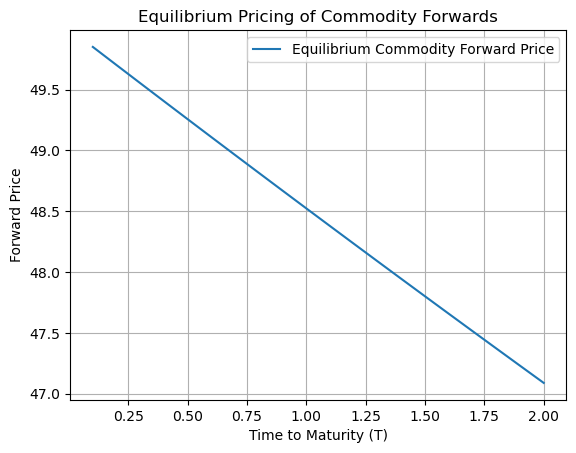

In [339]:
# Function to calculate equilibrium commodity forward price
def equilibrium_commodity_forward_price(prepaid_forward_price, risk_free_rate, time_to_maturity):
    forward_price = np.exp(-risk_free_rate * time_to_maturity) * prepaid_forward_price
    return forward_price

# Parameters
prepaid_forward_price = 50  # Prepaid forward price for the commodity
risk_free_rate = 0.03  # Risk-free rate
time_to_maturity_range = np.arange(0.1, 2.1, 0.1)  # Range of time to maturity

# Calculate equilibrium commodity forward prices
equilibrium_forward_prices = [equilibrium_commodity_forward_price(prepaid_forward_price, risk_free_rate, T) for T in time_to_maturity_range]

# Plotting
plt.plot(time_to_maturity_range, equilibrium_forward_prices, label='Equilibrium Commodity Forward Price')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Forward Price')
plt.title('Equilibrium Pricing of Commodity Forwards')
plt.legend()
plt.grid(True)
plt.show()

### Pricing Commodity Forwards by Arbitrage 

Commodity spot prices and their forwards counterparts can hold the same price as consumption assets do not require an anticipated return over time, however, the spot price of a commodity grossed up at the risk free rate over the life of the forward contract will show an apparent arbitrage opportunity. In theory the arbitrage exists, but in practice, nobody is willing to lend the commodity to a short seller without charging an additional fee. 

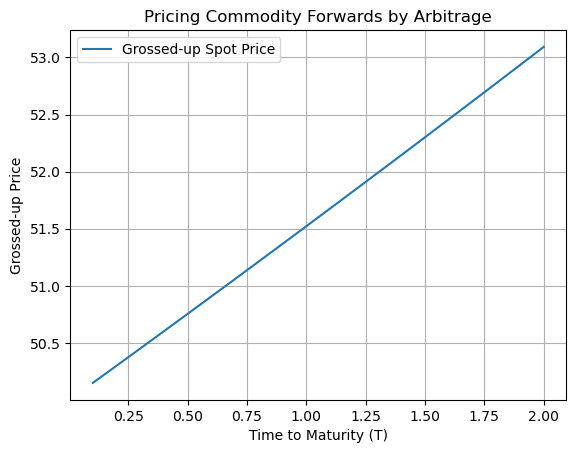

In [340]:
# Function to calculate spot price grossed up at the risk-free rate
def grossed_up_spot_price(spot_price, risk_free_rate, time_to_maturity):
    grossed_up_price = spot_price * np.exp(risk_free_rate * time_to_maturity)
    return grossed_up_price

# Parameters
spot_price = 50  # Current spot price of the commodity
risk_free_rate = 0.03  # Risk-free rate
time_to_maturity_range = np.arange(0.1, 2.1, 0.1)  # Range of time to maturity

# Calculate grossed-up spot prices
grossed_up_prices = [grossed_up_spot_price(spot_price, risk_free_rate, T) for T in time_to_maturity_range]

# Plotting
plt.plot(time_to_maturity_range, grossed_up_prices, label='Grossed-up Spot Price')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Grossed-up Price')
plt.title('Pricing Commodity Forwards by Arbitrage')
plt.legend()
plt.grid(True)
plt.show()

### Short Selling and the Lease Rate 

The lease rate is the difference between the discount rate for the commodity and the expected price appreciation. For most commodities, the current price is not the present value of the expected future price, so there is no presumption that the lease rate would be zero as it is in non-dividend paying financial assets. The NPV of buying the commodity and lending it is the present value of the commodity, multiplied by e, to the power of the continuous dividend yield, multiplied by the time, minus the price of the commodity. 

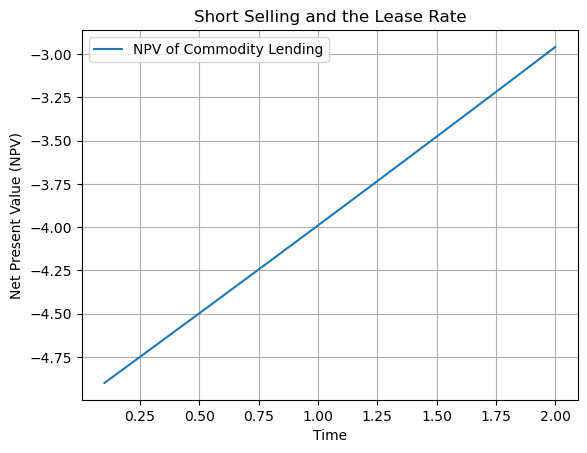

In [341]:
# Function to calculate NPV of buying commodity and lending it
def npv_commodity_lending(current_price, continuous_dividend_yield, time, commodity_price):
    npv = current_price * np.exp(continuous_dividend_yield * time) - commodity_price
    return npv

# Parameters
current_price = 50  # Current price of the commodity
continuous_dividend_yield = 0.02  # Continuous dividend yield on the commodity
time_range = np.arange(0.1, 2.1, 0.1)  # Range of time
commodity_price = 55  # Example future price of the commodity

# Calculate NPV for buying commodity and lending it
npvs = [npv_commodity_lending(current_price, continuous_dividend_yield, t, commodity_price) for t in time_range]

# Plotting
plt.plot(time_range, npvs, label='NPV of Commodity Lending')
plt.xlabel('Time')
plt.ylabel('Net Present Value (NPV)')
plt.title('Short Selling and the Lease Rate')
plt.legend()
plt.grid(True)
plt.show()

### No Arbitrage Pricing Incorporating Storage Costs 

Where storage is not optimal, the costs of storage are irrelevant, however when storage is optimal, the price of the forward contract must be high enough to compensate for the cash and carry strategy. A cash and carry strategy is not profitable if the forward price is less than what the commodity can be sold for today. 

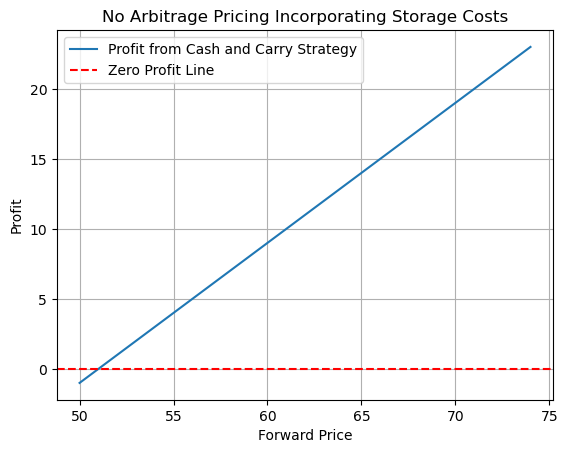

In [342]:
# Function to calculate the profit from cash and carry strategy
def cash_and_carry_profit(forward_price, spot_price, storage_cost):
    profit = forward_price - spot_price - storage_cost
    return profit

# Parameters
spot_price = 50  # Current spot price of the commodity
storage_cost = 1  # Storage cost
forward_price_range = np.arange(50, 75, 1)  # Range of forward prices

# Calculate profits from cash and carry strategy for different forward prices
profits = [cash_and_carry_profit(forward_price, spot_price, storage_cost) for forward_price in forward_price_range]

# Plotting
plt.plot(forward_price_range, profits, label='Profit from Cash and Carry Strategy')
plt.axhline(0, color='r', linestyle='--', label='Zero Profit Line')
plt.xlabel('Forward Price')
plt.ylabel('Profit')
plt.title('No Arbitrage Pricing Incorporating Storage Costs')
plt.legend()
plt.grid(True)
plt.show()

### Cash and Carry Arbitrage 

In the special case where continuous storage costs are paid continuously and are proportional to the value of the commodity, storage is like a continuous negative dividend. If storage occurs ad there is no arbitrage, the forward price will be the present value of the commodity inclusive of storage costs. 

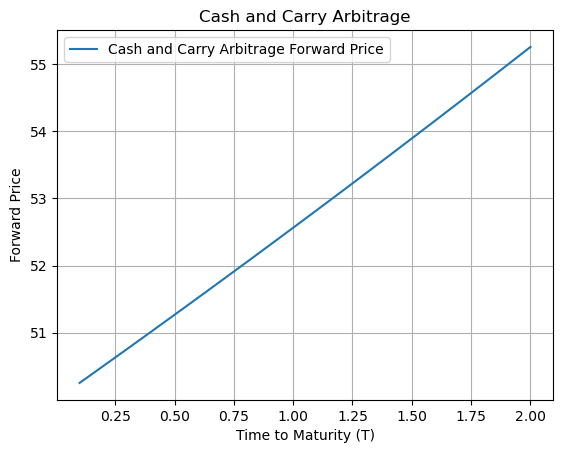

In [343]:
# Function to calculate the forward price in Cash and Carry Arbitrage
def cash_and_carry_forward_price(spot_price, risk_free_rate, storage_cost_rate, time_to_maturity):
    forward_price = spot_price * np.exp((risk_free_rate + storage_cost_rate) * time_to_maturity)
    return forward_price

# Parameters
spot_price = 50  # Current spot price of the commodity
risk_free_rate = 0.03  # Risk-free rate
storage_cost_rate = 0.02  # Continuous storage cost rate
time_to_maturity_range = np.arange(0.1, 2.1, 0.1)  # Range of time to maturity

# Calculate Cash and Carry Arbitrage forward prices
forward_prices = [cash_and_carry_forward_price(spot_price, risk_free_rate, storage_cost_rate, T) for T in time_to_maturity_range]

# Plotting
plt.plot(time_to_maturity_range, forward_prices, label='Cash and Carry Arbitrage Forward Price')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Forward Price')
plt.title('Cash and Carry Arbitrage')
plt.legend()
plt.grid(True)
plt.show()

### Reverse Cash and Carry Arbitrage

Reverse cash and carry is a market neutral strategy combining a short position in an asset and a long futures position in the same asset, the aim is to exploit pricing difference between the two markets. This is profitable only if the lender requires a lease payment below a certain amount. 

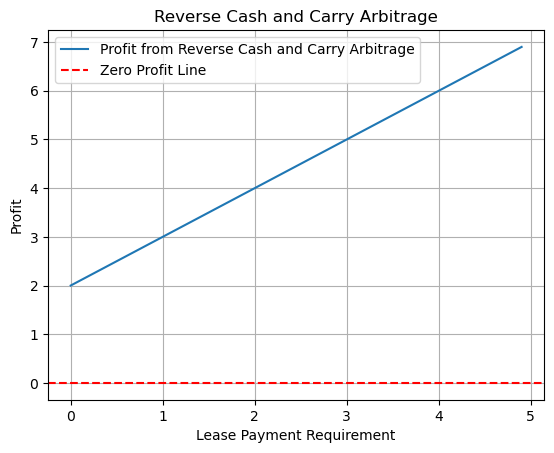

In [344]:
# Function to calculate the profit from reverse cash and carry arbitrage
def reverse_cash_and_carry_profit(lease_payment, spot_price, futures_price):
    profit = lease_payment - (futures_price - spot_price)
    return profit

# Parameters
spot_price = 50  # Current spot price of the asset
futures_price = 48  # Futures price of the asset
lease_payment_range = np.arange(0, 5, 0.1)  # Range of lease payments

# Calculate profits from reverse cash and carry arbitrage for different lease payments
profits = [reverse_cash_and_carry_profit(lease_payment, spot_price, futures_price) for lease_payment in lease_payment_range]

# Plotting
plt.plot(lease_payment_range, profits, label='Profit from Reverse Cash and Carry Arbitrage')
plt.axhline(0, color='r', linestyle='--', label='Zero Profit Line')
plt.xlabel('Lease Payment Requirement')
plt.ylabel('Profit')
plt.title('Reverse Cash and Carry Arbitrage')
plt.legend()
plt.grid(True)
plt.show()

### Convenience Yields 

Convenience yields are only relevant when the commodity is stored, this means the owner will require that the forward price compensate for the financial costs of storing, but the owner will accept a lower forward price if there is a convenience yield. If the continuously compounded convenience yield is proportional to the value of the commodity, the owner will earn an acceptable return if the forward price is as below:

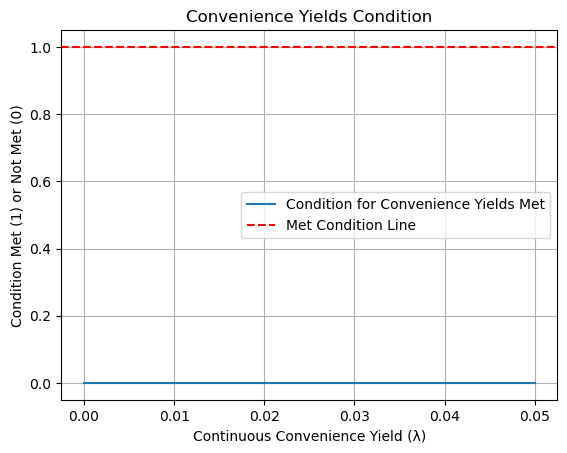

In [345]:
# Function to check if the inequality for convenience yields holds
def is_convenience_yield_condition_met(forward_price, spot_price, risk_free_rate, convenience_yield, time_to_maturity):
    condition = forward_price >= spot_price * np.exp((risk_free_rate + convenience_yield) * time_to_maturity)
    return condition

# Parameters
spot_price = 50  # Current spot price of the commodity
risk_free_rate = 0.03  # Risk-free rate
convenience_yield_range = np.arange(0, 0.06, 0.01)  # Range of convenience yields
time_to_maturity = 1  # Time to maturity

# Check if the condition for convenience yields holds for different values of convenience yields
conditions_met = [is_convenience_yield_condition_met(spot_price, spot_price, risk_free_rate, convenience_yield, time_to_maturity) for convenience_yield in convenience_yield_range]

# Plotting
plt.plot(convenience_yield_range, conditions_met, label='Condition for Convenience Yields Met')
plt.axhline(1, color='r', linestyle='--', label='Met Condition Line')
plt.xlabel('Continuous Convenience Yield (λ)')
plt.ylabel('Condition Met (1) or Not Met (0)')
plt.title('Convenience Yields Condition')
plt.legend()
plt.grid(True)
plt.show()

### Gold 

Gold is most like a financial asset amongst commodities, it is durable, nonreactive, noncorrosive, relatively inexpensive to store, widely held and actively produced. Gold often trades in certificate form. Short sales are common in the gold market, large holders put gold on deposit with brokers in order that it may be loaned to short sellers. The present value of a unit of commodity received in the future is the present value of the forward price, discounted at the risk free rate. We can use the forward curve for gold to compute the value of an operating gold mine. 

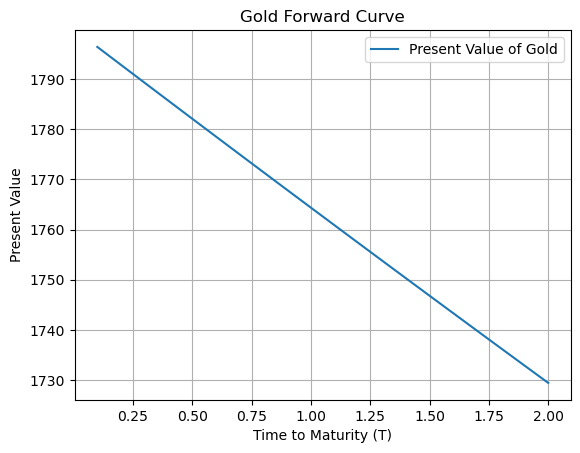

In [346]:
# Function to calculate the present value of a unit of gold received in the future
def present_value_gold_forward(forward_price, risk_free_rate, time_to_maturity):
    present_value = forward_price / np.exp(risk_free_rate * time_to_maturity)
    return present_value

# Parameters
forward_price = 1800  # Example forward price for gold
risk_free_rate = 0.02  # Risk-free rate
time_to_maturity_range = np.arange(0.1, 2.1, 0.1)  # Range of time to maturity

# Calculate present value for a unit of gold received in the future for different time to maturity values
present_values = [present_value_gold_forward(forward_price, risk_free_rate, T) for T in time_to_maturity_range]

# Plotting
plt.plot(time_to_maturity_range, present_values, label='Present Value of Gold')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Present Value')
plt.title('Gold Forward Curve')
plt.legend()
plt.grid(True)
plt.show()

### Corn

Corn is harvested primarily in the fall, from September through November. Given the seasonality in production and year round demand for corn, an equilibrium with some current selling and some storage, requires that corn prices be expected to rise at the interest rate, plus storage costs, which implies an upward sloping curve. Corn prices fall every year prior to harvest and rise again every year post harvest as new crop comes to market. The price during the rest of the year should equal harvest price plus storage costs, less convenience. 

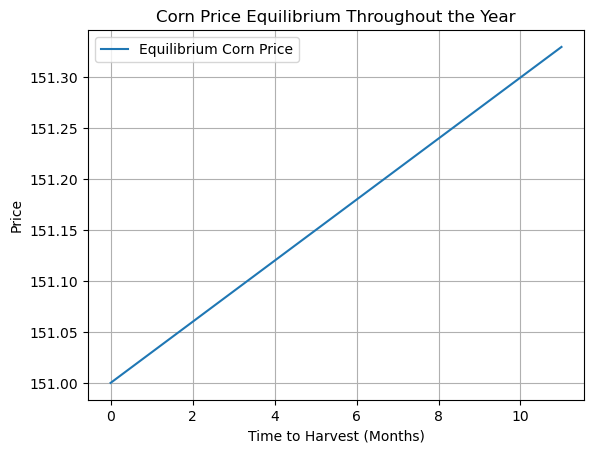

In [347]:
# Function to calculate the equilibrium corn price
def equilibrium_corn_price(interest_rate, storage_costs, convenience_yield, harvest_price, time_to_harvest):
    equilibrium_price = harvest_price + storage_costs - convenience_yield + interest_rate * time_to_harvest
    return equilibrium_price

# Parameters
interest_rate = 0.03  # Interest rate
storage_costs = 2  # Storage costs
convenience_yield = 1  # Convenience yield
harvest_price = 150  # Harvest price
time_to_harvest_range = np.arange(0, 12, 1)  # Range of time to harvest (months)

# Calculate equilibrium corn prices for different months
equilibrium_prices = [equilibrium_corn_price(interest_rate, storage_costs, convenience_yield, harvest_price, T) for T in time_to_harvest_range]

# Plotting
plt.plot(time_to_harvest_range, equilibrium_prices, label='Equilibrium Corn Price')
plt.xlabel('Time to Harvest (Months)')
plt.ylabel('Price')
plt.title('Corn Price Equilibrium Throughout the Year')
plt.legend()
plt.grid(True)
plt.show()

### Energy Markets 

The forward market for electricity illustrates forward pricing when storage is not possible, once produced, it is transmitted over the power grid to end users. There are several economic characteristics of electricity to understand, such as; it is difficult to store, the maximum supply I fixed and the demand varies substantially between irregular periods. 

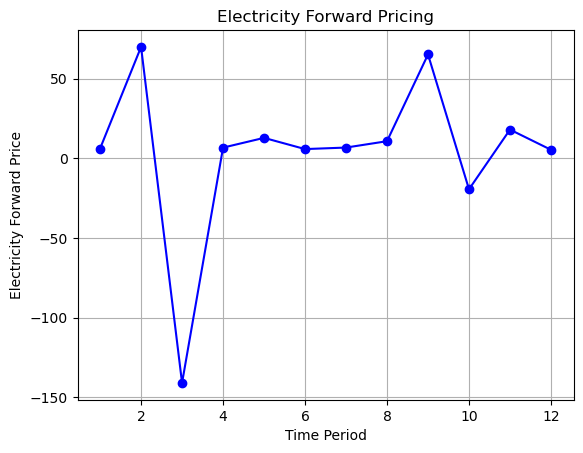

In [348]:
# Function to simulate electricity forward pricing
def simulate_electricity_forward_prices(max_supply, demand_variation, time_periods):
    # Generate random demand variations for each time period
    demand = np.random.normal(loc=demand_variation, scale=demand_variation, size=time_periods)
    
    # Calculate forward prices based on demand and fixed supply
    forward_prices = max_supply / demand
    
    return forward_prices

# Parameters
max_supply = 100  # Maximum fixed supply of electricity
demand_variation = 10  # Variability in demand
time_periods = 12  # Number of time periods (months)

# Simulate electricity forward prices
forward_prices = simulate_electricity_forward_prices(max_supply, demand_variation, time_periods)

# Plotting
plt.plot(range(1, time_periods+1), forward_prices, marker='o', linestyle='-', color='b')
plt.xlabel('Time Period')
plt.ylabel('Electricity Forward Price')
plt.title('Electricity Forward Pricing')
plt.grid(True)
plt.show()

### Natural Gas

Also in Natural Gas, the seasonality and storage costs are important. Natural Gas is costly to transport internationally so prices and forward curves vary regionally, it is also costly to store and the demand for Natural Gas is highly seasonal, with a relatively constant supply and seasonal demand, this leads to large and predictable price swings in the market. 

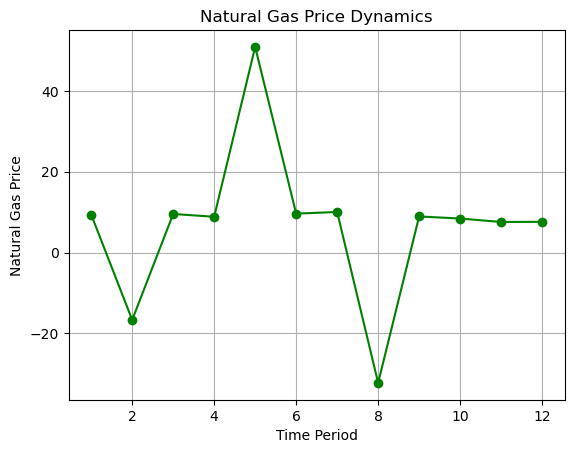

In [349]:
# Function to simulate natural gas prices with seasonality and storage costs
def simulate_natural_gas_prices(constant_supply, seasonal_demand_variation, storage_costs, time_periods):
    # Generate random seasonal demand variations for each time period
    seasonal_demand = np.random.normal(loc=seasonal_demand_variation, scale=seasonal_demand_variation, size=time_periods)
    
    # Calculate natural gas prices based on constant supply, seasonal demand, and storage costs
    natural_gas_prices = constant_supply / seasonal_demand + storage_costs
    
    return natural_gas_prices

# Parameters
constant_supply = 80  # Constant supply of natural gas
seasonal_demand_variation = 15  # Variability in seasonal demand
storage_costs = 5  # Storage costs
time_periods = 12  # Number of time periods (months)

# Simulate natural gas prices
natural_gas_prices = simulate_natural_gas_prices(constant_supply, seasonal_demand_variation, storage_costs, time_periods)

# Plotting
plt.plot(range(1, time_periods+1), natural_gas_prices, marker='o', linestyle='-', color='g')
plt.xlabel('Time Period')
plt.ylabel('Natural Gas Price')
plt.title('Natural Gas Price Dynamics')
plt.grid(True)
plt.show()

### Oil 

Oil is easier to transport and store than gas, as a result it trades on a global market, and seasonal trends are relatively unimportant. Two of the largest oil benchmarks are WTI (West Texas Intermediate) and Brent Crude Oil. The price discrepancy between the two illustrate the importance of transportation costs even in an integrated global market. 

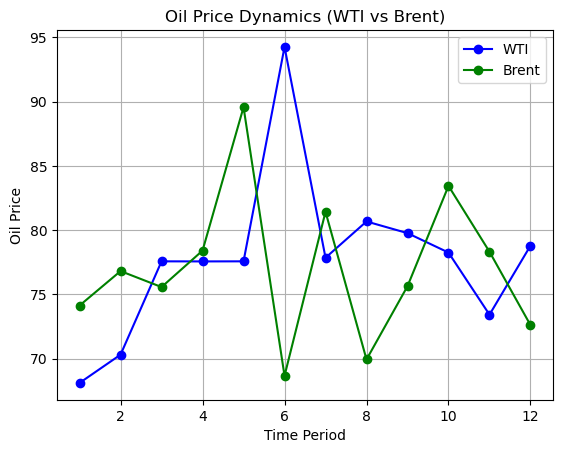

In [350]:
# Function to simulate oil prices with global market dynamics
def simulate_oil_prices(constant_supply, transportation_costs, time_periods):
    # Generate random fluctuations for each time period
    fluctuations = np.random.normal(loc=0, scale=5, size=time_periods)
    
    # Calculate oil prices based on constant supply and transportation costs
    oil_prices = constant_supply + transportation_costs + fluctuations
    
    return oil_prices

# Parameters
constant_supply = 70  # Constant supply of oil
transportation_costs_wti = 5  # Transportation costs for WTI
transportation_costs_brent = 8  # Transportation costs for Brent
time_periods = 12  # Number of time periods (months)

# Simulate oil prices for WTI and Brent
oil_prices_wti = simulate_oil_prices(constant_supply, transportation_costs_wti, time_periods)
oil_prices_brent = simulate_oil_prices(constant_supply, transportation_costs_brent, time_periods)

# Plotting
plt.plot(range(1, time_periods+1), oil_prices_wti, marker='o', linestyle='-', color='b', label='WTI')
plt.plot(range(1, time_periods+1), oil_prices_brent, marker='o', linestyle='-', color='g', label='Brent')
plt.xlabel('Time Period')
plt.ylabel('Oil Price')
plt.title('Oil Price Dynamics (WTI vs Brent)')
plt.legend()
plt.grid(True)
plt.show()

### Oil Distillate Spreads

Commodities used in the creation of other commodities, gives rise to commodity spreads. The split of these commodities into different components can be complemented by a process known as cracking, the price difference between the two products is called the crack spread. There are crack spread swaps and options, most commonly these are based on heating and crude oil.

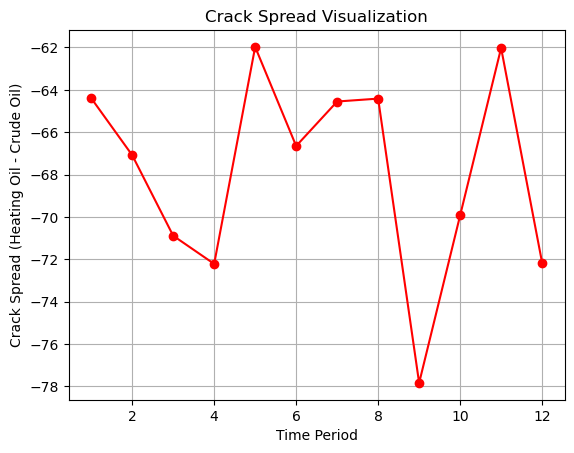

In [351]:
# Function to simulate crack spread between heating oil and crude oil
def simulate_crack_spread(heating_oil_prices, crude_oil_prices):
    crack_spread = heating_oil_prices - crude_oil_prices
    return crack_spread

# Parameters
time_periods = 12  # Number of time periods (months)

# Simulate prices for heating oil and crude oil
heating_oil_prices = np.random.normal(loc=2, scale=0.5, size=time_periods)  # Example heating oil prices
crude_oil_prices = np.random.normal(loc=70, scale=5, size=time_periods)  # Example crude oil prices

# Simulate crack spread
crack_spread = simulate_crack_spread(heating_oil_prices, crude_oil_prices)

# Plotting
plt.plot(range(1, time_periods+1), crack_spread, marker='o', linestyle='-', color='r')
plt.xlabel('Time Period')
plt.ylabel('Crack Spread (Heating Oil - Crude Oil)')
plt.title('Crack Spread Visualization')
plt.grid(True)
plt.show()

### Hedging Strategies 
Since commodities are heterogeneous, and costly to transport and store, it is common to hedge a risk with a commodity contract that is imperfectly with the risk being hedged. This gives rise to basis risk. 

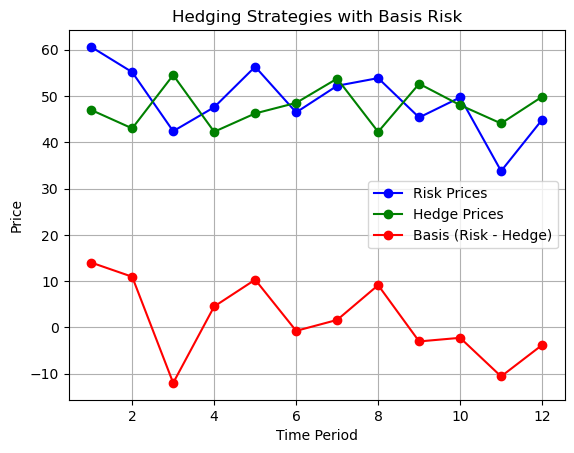

In [352]:
# Function to simulate hedging with basis risk
def simulate_hedging_strategy(risk_prices, hedge_prices, basis_variation):
    basis = risk_prices - hedge_prices + np.random.normal(loc=0, scale=basis_variation, size=len(risk_prices))
    return basis

# Parameters
time_periods = 12  # Number of time periods (months)

# Simulate prices for the risk being hedged
risk_prices = np.random.normal(loc=50, scale=5, size=time_periods)  # Example risk prices

# Simulate prices for the commodity contract used for hedging
hedge_prices = np.random.normal(loc=48, scale=4, size=time_periods)  # Example hedge prices

# Simulate basis risk
basis_variation = 2  # Basis risk variability
basis = simulate_hedging_strategy(risk_prices, hedge_prices, basis_variation)

# Plotting
plt.plot(range(1, time_periods+1), risk_prices, marker='o', linestyle='-', color='b', label='Risk Prices')
plt.plot(range(1, time_periods+1), hedge_prices, marker='o', linestyle='-', color='g', label='Hedge Prices')
plt.plot(range(1, time_periods+1), basis, marker='o', linestyle='-', color='r', label='Basis (Risk - Hedge)')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Hedging Strategies with Basis Risk')
plt.legend()
plt.grid(True)
plt.show()

### Basis Risk 

Exchange traded commodity futures contracts call for delivery of the underlying commodity at specific locations/dates. The actual commodity for delivery may reside at a different location, the desired delivery date and the grade may vary from that specified in the contract. Commodities traded as hedges for other commodities can be regressed at price point against each other to obtain the hedge ratio to minimize the variance between the two. Another method of hedging occurs when hedging distant obligations with near term futures in a strip hedge strategy. Alternatively, a hedger could use a stack hedge, entering into futures contracts with a single maturity, with the number of contracts selected so that changes in the PV of future obligations are offset by changes in the value of the futures positions. Rolling this strategy can be profitable if the near term future price is below the expiring near term price (backwardation).  

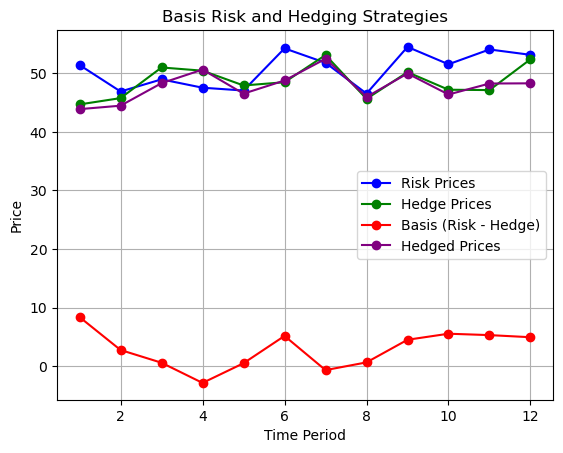

In [353]:
# Function to simulate basis risk and hedging strategies
def simulate_basis_risk_and_hedging(risk_prices, hedge_prices, basis_variation, hedge_ratio_variation):
    # Simulate basis risk
    basis = risk_prices - hedge_prices + np.random.normal(loc=0, scale=basis_variation, size=len(risk_prices))
    
    # Simulate hedge ratio variation
    hedge_ratio = 1 + np.random.normal(loc=0, scale=hedge_ratio_variation, size=len(risk_prices))
    
    # Calculate hedged prices using hedge ratio
    hedged_prices = risk_prices - (hedge_ratio * basis)
    
    return basis, hedge_ratio, hedged_prices

# Parameters
time_periods = 12  # Number of time periods (months)

# Simulate prices for the risk being hedged
risk_prices = np.random.normal(loc=50, scale=5, size=time_periods)  # Example risk prices

# Simulate prices for the commodity contract used for hedging
hedge_prices = np.random.normal(loc=48, scale=4, size=time_periods)  # Example hedge prices

# Simulate basis risk and hedge ratio variation
basis_variation = 2  # Basis risk variability
hedge_ratio_variation = 0.1  # Hedge ratio variability

basis, hedge_ratio, hedged_prices = simulate_basis_risk_and_hedging(risk_prices, hedge_prices, basis_variation, hedge_ratio_variation)

# Plotting
plt.plot(range(1, time_periods+1), risk_prices, marker='o', linestyle='-', color='b', label='Risk Prices')
plt.plot(range(1, time_periods+1), hedge_prices, marker='o', linestyle='-', color='g', label='Hedge Prices')
plt.plot(range(1, time_periods+1), basis, marker='o', linestyle='-', color='r', label='Basis (Risk - Hedge)')
plt.plot(range(1, time_periods+1), hedged_prices, marker='o', linestyle='-', color='purple', label='Hedged Prices')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title('Basis Risk and Hedging Strategies')
plt.legend()
plt.grid(True)
plt.show()

### Hedging Jet Fuel with Crude Oil 

If we own a quantity of jet fuel and hedge by holding crude oil futures contracts, our mark to market profit depends on the change in the jet fuel price and the change in the futures price. This is (Pt-Pt-1)+H(Ft-Ft-1), we can estimate H by regressing the change in the jet fuel price on the change in crude oil futures price. The coefficient on the futures price change tells us that, on average, when the crude futures price increases by $0.01, a gallon of jet fuel increases by X amount. Because jet fuel is but one product produced from crude oil, there is considerable variation in the price of jet fuel not accounted for.

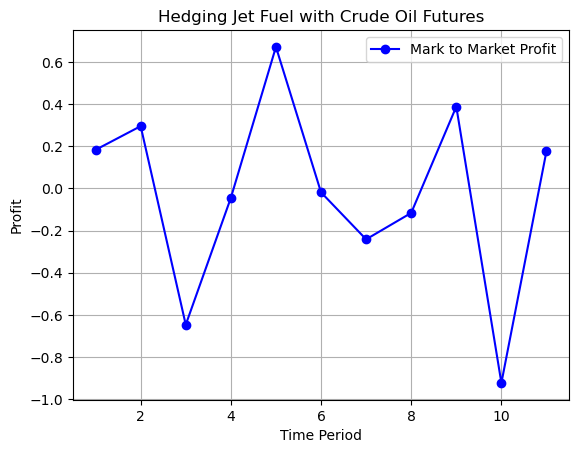

In [354]:
# Function to simulate hedging jet fuel with crude oil futures
def simulate_jet_fuel_hedging(jet_fuel_prices, crude_oil_futures_prices):
    # Calculate the changes in prices
    jet_fuel_changes = np.diff(jet_fuel_prices)
    crude_oil_futures_changes = np.diff(crude_oil_futures_prices)
    
    # Reshape the arrays for regression
    jet_fuel_changes = jet_fuel_changes.reshape(-1, 1)
    crude_oil_futures_changes = crude_oil_futures_changes.reshape(-1, 1)
    
    # Fit linear regression to estimate hedge ratio
    model = LinearRegression().fit(crude_oil_futures_changes, jet_fuel_changes)
    hedge_ratio = model.coef_[0][0]
    
    # Calculate mark to market profit
    mark_to_market_profit = jet_fuel_changes + hedge_ratio * crude_oil_futures_changes
    
    return hedge_ratio, mark_to_market_profit

# Parameters
time_periods = 12  # Number of time periods (months)

# Simulate prices for jet fuel and crude oil futures
jet_fuel_prices = np.random.normal(loc=2, scale=0.5, size=time_periods)  # Example jet fuel prices
crude_oil_futures_prices = np.random.normal(loc=70, scale=5, size=time_periods)  # Example crude oil futures prices

# Simulate jet fuel hedging
hedge_ratio, mark_to_market_profit = simulate_jet_fuel_hedging(jet_fuel_prices, crude_oil_futures_prices)

# Plotting
plt.plot(range(1, time_periods), mark_to_market_profit, marker='o', linestyle='-', color='b', label='Mark to Market Profit')
plt.xlabel('Time Period')
plt.ylabel('Profit')
plt.title('Hedging Jet Fuel with Crude Oil Futures')
plt.legend()
plt.grid(True)
plt.show()

### Weather Derivatives 

Weather derivatives can provide an additional contract with a payoff correlated with the quantity of energy used. the degree day futures contract traded at the CME Group is based on that premise that heating is used when temperatures are below 65 degrees, and cooling is used when temperatures are above 65 degrees, thus a heating degree day is the difference between 65 degrees and the average daily temperature if positive or zero otherwise. A cooling degree day is the difference between the average daily temperature and 65 degrees if positive and zero otherwise. The contract then settles based on the cumulative heating or cooling degree days over the course of a month. Contract size is $100 times the degree day index. 

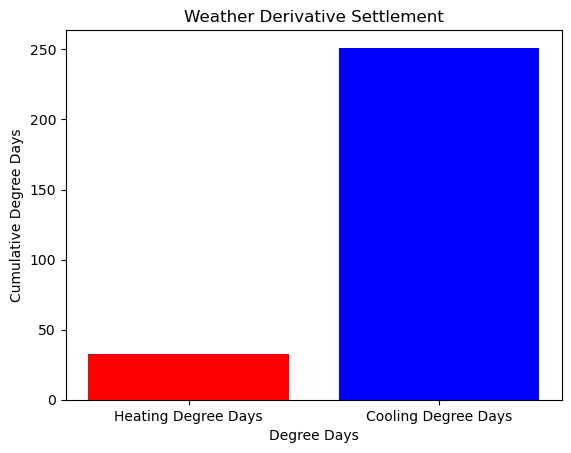

Settlement Amount: $28392.09405701049


In [355]:
# Function to simulate weather derivative settlement
def simulate_weather_derivative(num_days, temperature_data, degree_day_threshold):
    # Calculate daily degree days
    heating_degree_days = np.maximum(degree_day_threshold - temperature_data, 0)
    cooling_degree_days = np.maximum(temperature_data - degree_day_threshold, 0)
    
    # Calculate cumulative degree days over the month
    cumulative_heating_degree_days = np.sum(heating_degree_days)
    cumulative_cooling_degree_days = np.sum(cooling_degree_days)
    
    # Calculate settlement amount
    settlement_amount = 100 * (cumulative_heating_degree_days + cumulative_cooling_degree_days)
    
    return cumulative_heating_degree_days, cumulative_cooling_degree_days, settlement_amount

# Parameters
num_days = 30  # Number of days in the month
degree_day_threshold = 65  # Threshold temperature for heating and cooling degree days

# Simulate daily temperature data
temperature_data = np.random.normal(loc=70, scale=10, size=num_days)

# Simulate weather derivative settlement
cumulative_heating_dd, cumulative_cooling_dd, settlement_amount = simulate_weather_derivative(num_days, temperature_data, degree_day_threshold)

# Plotting
plt.bar(['Heating Degree Days', 'Cooling Degree Days'], [cumulative_heating_dd, cumulative_cooling_dd], color=['red', 'blue'])
plt.xlabel('Degree Days')
plt.ylabel('Cumulative Degree Days')
plt.title('Weather Derivative Settlement')
plt.show()

print(f"Settlement Amount: ${settlement_amount}")

### Synthetic Commodities 

We can create a synthetic commodity by combining a commodity forward contract and a zero coupon bond. Entering into a long commodity forward contract at the price FO,T and a zero coupon bond that pays FO,T at time T. the cost of this investment strategy at time 0 us the cost of the bond which is the PV of FO,T. at maturity the strategy pays the forward contract payoff + the bond payoff which is the same value as a unit of the commodity at time T. Holding synthetic commodities can be more cost effective due to the circumvention of storage and delivery costs.

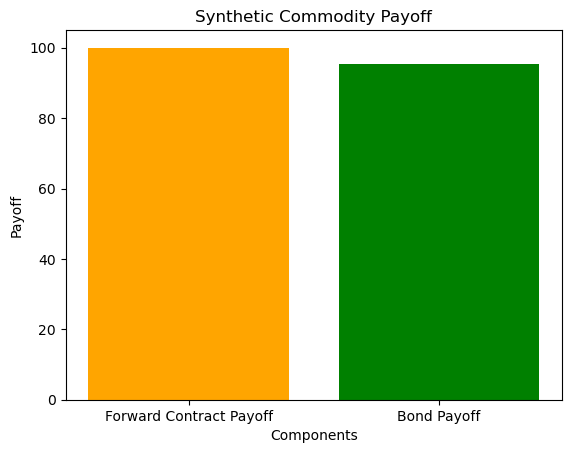

Synthetic Commodity Payoff at Maturity: $195.23809523809524


In [356]:
# Function to simulate synthetic commodity payoff
def simulate_synthetic_commodity(forward_price, maturity_time, risk_free_rate):
    # Calculate present value of the forward contract
    bond_price = forward_price / (1 + risk_free_rate)**maturity_time
    
    # Calculate synthetic commodity payoff at maturity
    synthetic_commodity_payoff = forward_price + bond_price
    
    return synthetic_commodity_payoff

# Parameters
forward_price = 100  # Forward contract price
maturity_time = 1  # Time to maturity (in years)
risk_free_rate = 0.05  # Risk-free interest rate

# Simulate synthetic commodity payoff
synthetic_commodity_payoff = simulate_synthetic_commodity(forward_price, maturity_time, risk_free_rate)

# Plotting
plt.bar(['Forward Contract Payoff', 'Bond Payoff'], [forward_price, synthetic_commodity_payoff - forward_price], color=['orange', 'green'])
plt.xlabel('Components')
plt.ylabel('Payoff')
plt.title('Synthetic Commodity Payoff')
plt.show()

print(f"Synthetic Commodity Payoff at Maturity: ${synthetic_commodity_payoff}")

# FX Risk

The appreciation of a countries currency, means that the country’s goods are more expensive for foreign buyers and that foreign goods are cheaper for foreign sellers. Conversely, that same country’s currency depreciation means that the country’s goods become cheaper for foreign buyers and foreign goods become more expensive for foreign sellers. 

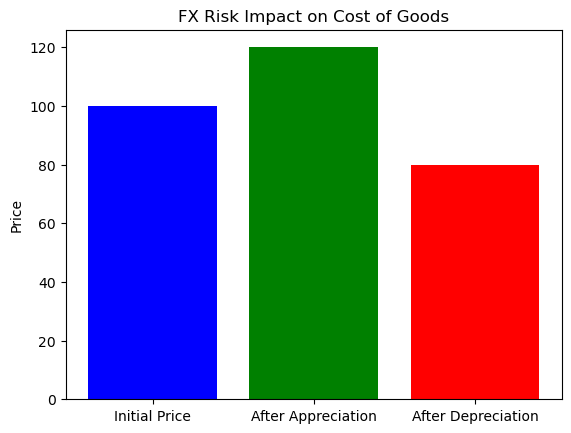

Initial Price: $100
Price After Appreciation: $120.0
Price After Depreciation: $80.0


In [357]:
# Function to simulate FX risk impact
def simulate_fx_risk(appreciation_factor, depreciation_factor):
    # Initial price of goods in the home currency
    initial_price = 100
    
    # Calculate prices after appreciation and depreciation
    price_after_appreciation = initial_price * appreciation_factor
    price_after_depreciation = initial_price * depreciation_factor
    
    return initial_price, price_after_appreciation, price_after_depreciation

# Parameters
appreciation_factor = 1.2  # Currency appreciation factor
depreciation_factor = 0.8  # Currency depreciation factor

# Simulate FX risk impact
initial_price, price_after_appreciation, price_after_depreciation = simulate_fx_risk(appreciation_factor, depreciation_factor)

# Plotting
labels = ['Initial Price', 'After Appreciation', 'After Depreciation']
prices = [initial_price, price_after_appreciation, price_after_depreciation]

plt.bar(labels, prices, color=['blue', 'green', 'red'])
plt.ylabel('Price')
plt.title('FX Risk Impact on Cost of Goods')
plt.show()

print(f"Initial Price: ${initial_price}")
print(f"Price After Appreciation: ${price_after_appreciation}")
print(f"Price After Depreciation: ${price_after_depreciation}")

Sources of Foreign Exchange Risk Exposure 
As a nation, a depreciating currency relative to the currency of your creditors, more units of your domestic currency will be required to pay off your debt, this is a way in which banks can experience losses due to FX risk. Banks look to match exposures in the trading book netting risk out to zero, holding companies can also spread this risk across their holdings. A positive net exposure implies that an institution is overall net long in a currency, whilst a negative net exposure implies that an institution is overall net short in a currency, these occur when there is failure to hedge or offset balance sheet positions. Non-bank corporations face the same risks on a smaller scale due to asset sizes, prudent person concerns and regulation. 

### Foreign Exchange Rate Volatility and FX Exposure

To measure the potential size of a financial institution’s FX exposure we use the following equation, and the larger the net exposure in a foreign currency, and or the larger the foreign currency’s exchange rate volatility, the greater the potential dollar loss/gain will be: 
Dollar loss/Gain in Currency i = (Net exposure in foreign currency i measured in dollars) X Volatility of the dollar / foreign currency i exchange rate. 

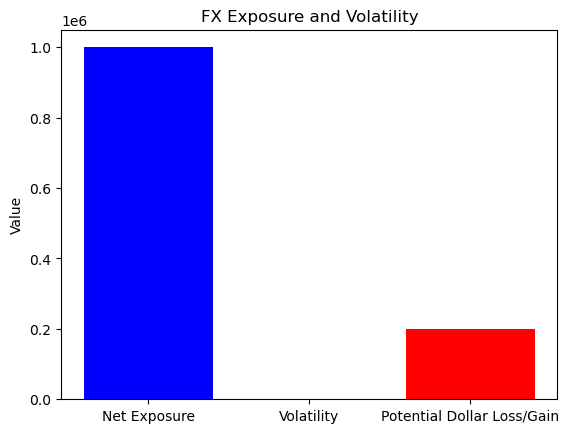

Net Exposure in Foreign Currency: $1000000
Volatility of Exchange Rate: 0.2
Potential Dollar Loss/Gain: $200000.0


In [364]:
# Function to simulate potential dollar loss/gain
def simulate_fx_exposure(net_exposure, volatility):
    # Simulate dollar loss/gain
    dollar_loss_gain = net_exposure * volatility
    
    return dollar_loss_gain

# Parameters
net_exposure = 1000000  # Net exposure in foreign currency measured in dollars
volatility = 0.02  # Volatility of the dollar/foreign currency exchange rate

# Simulate potential dollar loss/gain
dollar_loss_gain = simulate_fx_exposure(net_exposure, volatility)

# Plotting
labels = ['Net Exposure', 'Volatility', 'Potential Dollar Loss/Gain']
values = [net_exposure, volatility, dollar_loss_gain]

plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.ylabel('Value')
plt.title('FX Exposure and Volatility')
plt.show()

print(f"Net Exposure in Foreign Currency: ${net_exposure}")
print(f"Volatility of Exchange Rate: {volatility}")
print(f"Potential Dollar Loss/Gain: ${dollar_loss_gain}")

### Risk and Hedging 

A financial institution can hedge the risk of losses on foreign investments by on balance sheet hedging (making adjustments to the balance sheet to protect profits from FX risk) and off balance sheet hedging (taking positions in forwards and/or other derivative transactions to hedge FX risk). On balance sheet, exposure to cross currency volatility can have a negative impact on net returns after accounting for the cost of funds – return of assets. 

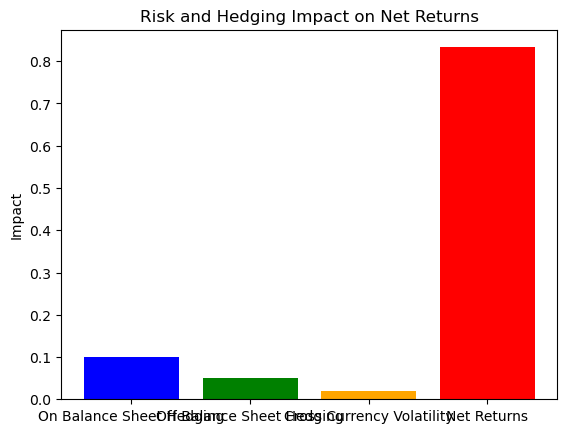

On Balance Sheet Hedging Impact: 10.0%
Off Balance Sheet Hedging Impact: 5.0%
Cross Currency Volatility Impact: 2.0%
Net Returns After Hedging: -16.700000000000003%


In [359]:
# Function to simulate impact of on and off balance sheet hedging
def simulate_hedging(on_balance_sheet_hedging, off_balance_sheet_hedging, cross_currency_volatility):
    # Simulate net returns after accounting for the cost of funds
    net_returns = (1 - on_balance_sheet_hedging - off_balance_sheet_hedging) * (1 - cross_currency_volatility)
    
    return net_returns

# Parameters
on_balance_sheet_hedging = 0.1  # On balance sheet hedging impact
off_balance_sheet_hedging = 0.05  # Off balance sheet hedging impact
cross_currency_volatility = 0.02  # Cross currency volatility impact

# Simulate impact of on and off balance sheet hedging
net_returns = simulate_hedging(on_balance_sheet_hedging, off_balance_sheet_hedging, cross_currency_volatility)

# Plotting
labels = ['On Balance Sheet Hedging', 'Off Balance Sheet Hedging', 'Cross Currency Volatility', 'Net Returns']
values = [on_balance_sheet_hedging, off_balance_sheet_hedging, cross_currency_volatility, net_returns]

plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Impact')
plt.title('Risk and Hedging Impact on Net Returns')
plt.show()

print(f"On Balance Sheet Hedging Impact: {on_balance_sheet_hedging * 100}%")
print(f"Off Balance Sheet Hedging Impact: {off_balance_sheet_hedging * 100}%")
print(f"Cross Currency Volatility Impact: {cross_currency_volatility * 100}%")
print(f"Net Returns After Hedging: {(net_returns - 1) * 100}%")

### Hedging with Forwards 

As a lower cost alternative to matching foreign assets with foreign liabilities on the balance sheet, a firm occult hedge by taking a position in the forward market for foreign currencies. Any forward position would appear as a contingent off balance sheet claim. On balance sheet transactions result in immediate cash flows, whereas off balance sheet transactions result in contingent future cash flows. 

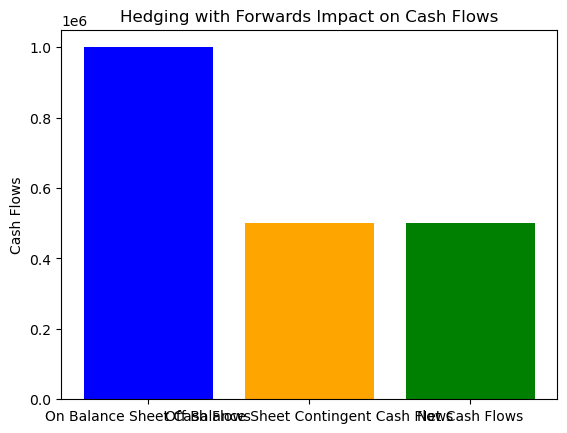

On Balance Sheet Cash Flows: $1000000
Off Balance Sheet Contingent Cash Flows: $500000
Net Cash Flows After Hedging: $500000


In [360]:
# Function to simulate impact of hedging with forwards
def simulate_forward_hedging(on_balance_sheet_cash_flows, off_balance_sheet_contingent_cash_flows):
    # Simulate net cash flows after hedging with forwards
    net_cash_flows = on_balance_sheet_cash_flows - off_balance_sheet_contingent_cash_flows
    
    return net_cash_flows

# Parameters
on_balance_sheet_cash_flows = 1000000  # Immediate cash flows from on balance sheet transactions
off_balance_sheet_contingent_cash_flows = 500000  # Contingent future cash flows from off balance sheet transactions

# Simulate impact of hedging with forwards
net_cash_flows = simulate_forward_hedging(on_balance_sheet_cash_flows, off_balance_sheet_contingent_cash_flows)

# Plotting
labels = ['On Balance Sheet Cash Flows', 'Off Balance Sheet Contingent Cash Flows', 'Net Cash Flows']
values = [on_balance_sheet_cash_flows, off_balance_sheet_contingent_cash_flows, net_cash_flows]

plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.ylabel('Cash Flows')
plt.title('Hedging with Forwards Impact on Cash Flows')
plt.show()

print(f"On Balance Sheet Cash Flows: ${on_balance_sheet_cash_flows}")
print(f"Off Balance Sheet Contingent Cash Flows: ${off_balance_sheet_contingent_cash_flows}")
print(f"Net Cash Flows After Hedging: ${net_cash_flows}")

### Multicurrency Foreign Asset-Liability Positions 

To the extent that domestic and foreign interest rates or stock returns for equities for not move closely together over time, potential gains from asset-liability portfolio diversification can offset the risk of mismatching individual currency asset-liability positions. 
Formula: Ri = rri + iei

Where Ri = Nominal interest rate in country I, rri = real interest rate in country I and iei = expected one-period inflation rate in country i.

If real savings and investment demand and supply pressures as well as inflationary pressures are closely linked, or economic integration across countries exist, we expect to find that nominal interest rates are highly correlated across financial markets. 

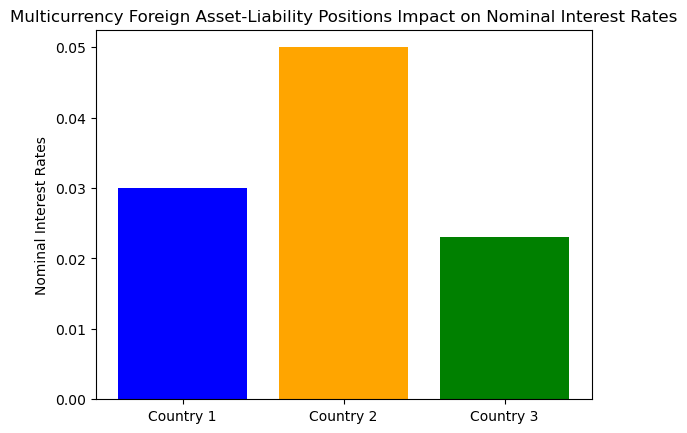

Real Interest Rates:
Country 1: 2.0%
Country 2: 3.0%
Country 3: 1.5%

Expected Inflation Rates:
Country 1: 1.0%
Country 2: 2.0%
Country 3: 0.8%

Nominal Interest Rates:
Country 1: 3.0%
Country 2: 5.0%
Country 3: 2.3%


In [361]:
# Function to simulate impact of multicurrency positions on nominal interest rates
def simulate_multicurrency_positions(real_interest_rates, expected_inflation_rates):
    # Simulate nominal interest rates using the provided formula
    nominal_interest_rates = real_interest_rates + expected_inflation_rates
    
    return nominal_interest_rates

# Parameters
real_interest_rates = np.array([0.02, 0.03, 0.015])  # Real interest rates in different countries
expected_inflation_rates = np.array([0.01, 0.02, 0.008])  # Expected one-period inflation rates in different countries

# Simulate impact of multicurrency positions on nominal interest rates
nominal_interest_rates = simulate_multicurrency_positions(real_interest_rates, expected_inflation_rates)

# Plotting
countries = ['Country 1', 'Country 2', 'Country 3']

plt.bar(countries, nominal_interest_rates, color=['blue', 'orange', 'green'])
plt.ylabel('Nominal Interest Rates')
plt.title('Multicurrency Foreign Asset-Liability Positions Impact on Nominal Interest Rates')
plt.show()

print("Real Interest Rates:")
for i, rate in enumerate(real_interest_rates):
    print(f"Country {i + 1}: {rate * 100}%")

print("\nExpected Inflation Rates:")
for i, rate in enumerate(expected_inflation_rates):
    print(f"Country {i + 1}: {rate * 100}%")

print("\nNominal Interest Rates:")
for i, rate in enumerate(nominal_interest_rates):
    print(f"Country {i + 1}: {rate * 100}%")

### Purchasing Power Parity 

One factor affecting one country’s foreign exchange rate relative to another is the relative inflation rates in each country, where the real rate of interest in one country is the interest rate of that country plus the nominal rate of interest in that country. According to PPP, foreign currency exchange rates between two countries adjust to reflect changes in each country’s price levels as consumers and importers switch their demands for goods from country to country as a change in the exchange rate between two countries’ currencies is proportional to the difference in the inflation rates of the two countries. 

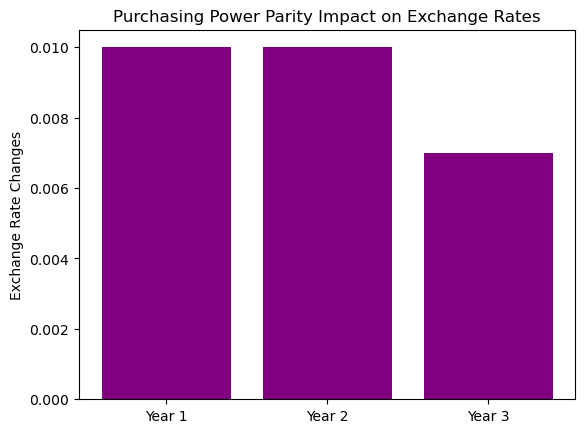

Inflation Rates:
Country 1: 2.166666666666667%
Country 2: 1.2666666666666666%

Exchange Rate Changes:
Year 1: 1.0%
Year 2: 0.9999999999999999%
Year 3: 0.7%


In [362]:
# Function to simulate impact of Purchasing Power Parity on exchange rates
def simulate_purchasing_power_parity(inflation_rate_country_1, inflation_rate_country_2):
    # Simulate exchange rate changes based on Purchasing Power Parity
    exchange_rate_changes = inflation_rate_country_1 - inflation_rate_country_2
    
    return exchange_rate_changes

# Parameters
inflation_rate_country_1 = np.array([0.02, 0.03, 0.015])  # Inflation rates in Country 1
inflation_rate_country_2 = np.array([0.01, 0.02, 0.008])  # Inflation rates in Country 2

# Simulate impact of Purchasing Power Parity on exchange rates
exchange_rate_changes = simulate_purchasing_power_parity(inflation_rate_country_1, inflation_rate_country_2)

# Plotting
years = ['Year 1', 'Year 2', 'Year 3']

plt.bar(years, exchange_rate_changes, color='purple')
plt.ylabel('Exchange Rate Changes')
plt.title('Purchasing Power Parity Impact on Exchange Rates')
plt.show()

print("Inflation Rates:")
print(f"Country 1: {np.mean(inflation_rate_country_1) * 100}%")
print(f"Country 2: {np.mean(inflation_rate_country_2) * 100}%")

print("\nExchange Rate Changes:")
for i, change in enumerate(exchange_rate_changes):
    print(f"Year {i + 1}: {change * 100}%")

### Interest Rate Parity Theorem 

IPRT implies that by hedging in the forward exchange rate market, an investor realizes the same returns whether investing domestically or in a foreign country, this is a no arbitrage relationship in the sense that you cannot make a risk free return by taking offsetting positions in the domestic and foreign markets. 

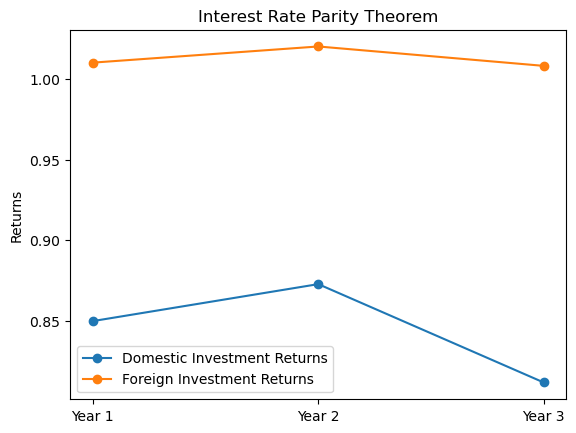

Interest Rates:
Domestic: 2.166666666666667%
Foreign: 1.2666666666666666%

Forward Exchange Rates:
Year 1: 1.2
Year 2: 1.18
Year 3: 1.25

Returns:
Year 1 - Domestic: 0.8500, Foreign: 1.0100
Year 2 - Domestic: 0.8729, Foreign: 1.0200
Year 3 - Domestic: 0.8120, Foreign: 1.0080


In [363]:
# Function to simulate returns based on Interest Rate Parity
def simulate_interest_rate_parity(interest_rate_domestic, interest_rate_foreign, forward_exchange_rate):
    returns_domestic = (1 + interest_rate_domestic) / forward_exchange_rate
    returns_foreign = 1 + interest_rate_foreign
    
    return returns_domestic, returns_foreign

# Parameters
interest_rate_domestic = np.array([0.02, 0.03, 0.015])  # Domestic interest rates
interest_rate_foreign = np.array([0.01, 0.02, 0.008])  # Foreign interest rates
forward_exchange_rate = np.array([1.2, 1.18, 1.25])  # Forward exchange rates

# Simulate returns based on Interest Rate Parity
returns_domestic, returns_foreign = simulate_interest_rate_parity(
    interest_rate_domestic, interest_rate_foreign, forward_exchange_rate
)

# Plotting
years = ['Year 1', 'Year 2', 'Year 3']

plt.plot(years, returns_domestic, label='Domestic Investment Returns', marker='o')
plt.plot(years, returns_foreign, label='Foreign Investment Returns', marker='o')
plt.ylabel('Returns')
plt.title('Interest Rate Parity Theorem')
plt.legend()
plt.show()

print("Interest Rates:")
print(f"Domestic: {np.mean(interest_rate_domestic) * 100}%")
print(f"Foreign: {np.mean(interest_rate_foreign) * 100}%")

print("\nForward Exchange Rates:")
for i, rate in enumerate(forward_exchange_rate):
    print(f"Year {i + 1}: {rate}")
    
print("\nReturns:")
for i, (return_domestic, return_foreign) in enumerate(zip(returns_domestic, returns_foreign)):
    print(f"Year {i + 1} - Domestic: {return_domestic:.4f}, Foreign: {return_foreign:.4f}")